**Universidad Internacional de La Rioja (UNIR) - Máster Universitario en Inteligencia Artificial - Aprendizaje Automático**

***
Datos del alumno (Nombre y Apellidos): Jose Manuel Pinillos Rubio

Fecha: 07 de enero de 2025
***

# <span style="font-size: 20pt; font-weight: bold; color: #0098cd;">Clasificación con máquinas de vectores de soporte y random forest</span>

## Objetivos

Mediante esta actividad se pretende que ponga en práctica la creación de modelos basados en máquinas de vector de soporte y random forest. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Comprender el tratamiento de datos que hay que realizar para los modelos de clasificación.
- Entender y aplicar el algoritmo de Random Forest a un problema de clasificación.
- Entender y aplicar el algoritmo de Support Vector Machine a un problema de clasificación.
- Evaluar y analizar los resultados de los clasificadores.
- Investigar la aplicación de los modelos de clasificación a problemas reales.

## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/31/covertype

Este dataset ha sido generado para predecir el tipo de cubierta forestal únicamente a partir de variables cartográficas (sin datos de sensores remotos). El tipo de cubierta forestal real para una observación determinada (celda de 30 x 30 metros) se determinó a partir de los datos del Sistema de información de recursos (RIS) de la Región 2 del Servicio Forestal de EE. UU. (USFS). Las variables independientes se derivaron de datos obtenidos originalmente del Servicio Geológico de EE. UU. (USGS) y de datos del USFS. Los datos están en forma original (no escalados) y contienen columnas binarias (0 o 1) de datos para variables cualitativas independientes (áreas silvestres y tipos de suelo).
Para ampliar información sobre el dataset y su origen, recomendamos leer la descripción completa del dataset en el enlace del repositorio.

El objetivo de la clasificación será detectar el tipo de suelo.

## Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Clasificación:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de clasificación empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la clasificación.
    - Cómo utilizan las técnicas de clasificación, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.

### 1. Análisis descriptivo de los datos

In [ ]:
!pip3 install -U ucimlrepo

from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.1 - Cargar el dataset

In [ ]:
# Descargamos el dataset covertype del repositorio UCI
covertype = fetch_ucirepo(id=31)

# Convertimos las características del dataset en un DataFrame de pandas
covertype_features = pd.DataFrame(data=covertype.data.features)

# Convertimos las variables objetivo (targets) en un DataFrame de pandas
covertype_targets = pd.DataFrame(data=covertype.data.targets)

# Unimos las características y las variables objetivo en un único DataFrame
covertype_df = pd.concat([covertype_features, covertype_targets], axis=1)

# Mostramos las 5 primeras filas del DataFrame combinado
covertype_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


El código comienza descargando el *dataset* **Covertype** desde el repositorio UCI mediante la función `fetch_ucirepo`. Las características del *dataset* se convierten en un *DataFrame* de pandas utilizando `pd.DataFrame`, creando una estructura organizada para los datos. De manera similar, las variables objetivo también se convierten en un *DataFrame* separado utilizando el mismo método.

Posteriormente, se utiliza `pd.concat` con `axis=1` para unir ambos *DataFrames*, combinando las características y las variables objetivo en un único *DataFrame*.

Por último, se visualizan las primeras cinco filas del *DataFrame* resultante con el método `.head()` para verificar que los datos se han cargado y unido correctamente.

In [ ]:
# Extraemos los metadatos del dataset y los guardamos en una estructura aparte
covertype_metadata = covertype.variables

# Mostramos los metadatos del dataset
covertype_metadata

,name,role,type,demographic,description,units,missing_values
0,Elevation,Feature,Integer,None,None,None,no
1,Aspect,Feature,Integer,None,None,None,no
2,Slope,Feature,Integer,None,None,None,no
3,Horizontal_Distance_To_Hydrology,Feature,Integer,None,None,None,no
4,Vertical_Distance_To_Hydrology,Feature,Integer,None,None,None,no
5,Horizontal_Distance_To_Roadways,Feature,Integer,None,None,None,no
6,Hillshade_9am,Feature,Integer,None,None,None,no
7,Hillshade_Noon,Feature,Integer,None,None,None,no
8,Hillshade_3pm,Feature,Integer,None,None,None,no
9,Horizontal_Distance_To_Fire_Points,Feature,Integer,None,None,None,no


En este fragmento, se extraen los metadatos del *dataset* utilizando el atributo `variables` del objeto `covertype`. Los metadatos contienen información clave sobre las columnas del *dataset*, como nombres, tipos, descripciones, unidades y valores faltantes. Estos se almacenan en `covertype_metadata` para tenerlos accesibles de manera separada.

Posteriormente, se visualiza el contenido de `covertype_metadata`, lo que facilita la comprensión del significado y las características de los datos, permitiendo realizar un análisis más adecuado.

#### 1.2 - ¿Cuántas instancias de datos tiene el dataset?

In [ ]:
print(f'El dataset contiene {covertype_df.shape[0]} instancias.')

El dataset contiene 581012 instancias.


El método `shape` aplicado al *dataset* devuelve la dimensión total, es decir, el número de filas y columnas. En este caso, se utiliza el índice `[0]` para acceder al número de filas, que representa la cantidad de instancias o ejemplos de datos en el *dataset*. Este valor es útil para entender el tamaño del conjunto de datos y planificar el análisis.

#### 1.3 - ¿Cuántas variables continuas hay en el dataset?

El número de variables continuas en el *dataset* se obtiene directamente de la descripción en la web del repositorio UCI. Según esta información, las variables continuas son aquellas clasificadas como *quantitative* y representan mediciones numéricas no binarias, como elevaciones, distancias e índices de sombra. Estas variables son:

1. Elevation
2. Aspect
3. Slope
4. Horizontal_Distance_To_Hydrology
5. Vertical_Distance_To_Hydrology
6. Horizontal_Distance_To_Roadways
7. Hillshade_9am
8. Hillshade_Noon
9. Hillshade_3pm
10. Horizontal_Distance_To_Fire_Points

En total, hay **10 variables continuas**.

Si no tuviéramos acceso a esta información, podría realizarse con tres enfoques distintos:

##### Enfoque 1: Sin información previa sobre las columnas

El primer enfoque parte de un escenario en el que no tenemos ningún tipo de información sobre las columnas del *dataset*. En este caso, procederíamos sistemáticamente a identificar las variables continuas basándonos únicamente en las propiedades de los datos. Esto implica filtrar primero las columnas numéricas, después identificar las variables binarias (aquellas con exactamente dos valores únicos) y, finalmente, clasificar las restantes como continuas, siempre verificando un umbral adecuado para el número de valores únicos.

In [ ]:
# Inicializamos una lista para almacenar las columnas numéricas
numeric_columns = []

for column in covertype_df.columns:
  # Filtramos el tipo de dato de la columna que sea numérico (int32, int64 o float64)
  if covertype_df[column].dtype in ['int32', 'int64', 'float64']:
    numeric_columns.append(column)

# Identificamos las variables binarias dentro de las columnas numéricas
binary_variables = []

for column in numeric_columns:
  # Si una columna tiene exactamente dos valores únicos (por ejemplo, 0 y 1), se considera binaria
  if covertype_df[column].nunique() == 2:
    binary_variables.append(column)

# Excluimos las variables categóricas basándonos en su rango de valores únicos
non_categorical_variables = []

for column in numeric_columns:
  # Verificamos si la columna no está en la lista de variables binarias
  if column not in binary_variables:
    unique_values = covertype_df[column].nunique()

    # Si el número de valores únicos es suficientemente alto, se considera no categórica
    if unique_values > 10:  # Este umbral se puede ajustar según el contexto
      non_categorical_variables.append(column)

# Clasificamos las variables continuas entre las no categóricas restantes
continuous_variables = []

for column in non_categorical_variables:
  # Todas las columnas no categóricas se consideran continuas
  continuous_variables.append(column)

# Imprimimos el número total de variables continuas y sus nombres
print(f'\nEl dataset contiene {len(continuous_variables)} variables continuas:')
for column in continuous_variables:
  print(f'- {column}')


El dataset contiene 10 variables continuas:
- Elevation
- Aspect
- Slope
- Horizontal_Distance_To_Hydrology
- Vertical_Distance_To_Hydrology
- Horizontal_Distance_To_Roadways
- Hillshade_9am
- Hillshade_Noon
- Hillshade_3pm
- Horizontal_Distance_To_Fire_Points


El código sigue un enfoque sistemático para identificar las variables continuas en un *dataset* partiendo de cero, es decir, sin información previa sobre las columnas.

Primero, se identifican las columnas numéricas del *dataset*. Esto se hace recorriendo todas las columnas y verificando su tipo de dato con `dtype`. Solo se consideran como numéricas aquellas que tienen un tipo entero (`int32` o `int64`) o flotante (`float64`). Estas columnas se almacenan en la lista `numeric_columns`.

Después, se filtran las variables binarias entre las columnas numéricas. Para ello, se recorre la lista de `numeric_columns` y se verifica el número de valores únicos en cada columna utilizando el método `.nunique()`. Si una columna tiene exactamente dos valores únicos (como 0 y 1), se clasifica como binaria y se almacena en la lista `binary_variables`.

Una vez identificadas las variables binarias, se excluyen para clasificar las restantes. Entre las columnas numéricas que no son binarias, se analiza el rango de valores únicos para determinar si son categóricas o no. Si una columna tiene un número suficientemente alto de valores únicos (en este caso, más de 10), se considera no categórica y se añade a la lista `non_categorical_variables`. Este umbral de 10 puede ajustarse dependiendo del *dataset*.

Finalmente, las columnas que no son categóricas ni binarias se clasifican como continuas. Estas columnas se añaden a la lista `continuous_variables`, que contiene todas las variables continuas del *dataset*. Como paso final, se imprime el número total de variables continuas encontradas y sus nombres para confirmar el resultado.

##### Enfoque 2: Análisis basado en metadatos predefinidos

El segundo enfoque se basa en utilizar los metadatos proporcionados con el *dataset*, en los que las columnas ya están clasificadas como características (`Feature`) o como objetivo (`Target`). Esto permite identificar de manera rápida y precisa las columnas relevantes para el análisis, sin necesidad de inspeccionar sus propiedades directamente.

En este enfoque, se seleccionan únicamente las columnas clasificadas como `Feature`, excluyendo automáticamente las de tipo `Target`. A partir de estas características, se realiza un análisis para distinguir entre variables continuas, categóricas y binarias según sea necesario. Este método resulta particularmente eficiente en *datasets* bien documentados, ya que elimina cualquier ambigüedad sobre la clasificación de las columnas.

In [ ]:
# Excluimos la columna objetivo del análisis
columns_to_analyze = []
for col in covertype_df.columns:
  if col != 'Cover_Type':  # Si la columna no es 'Cover_Type', la añadimos a la lista
    columns_to_analyze.append(col)

# Inicializamos una lista para almacenar las columnas numéricas
numeric_columns = []
for column in columns_to_analyze:
  # Verificamos si el tipo de dato es numérico (int32, int64 o float64)
  if covertype_df[column].dtype in ['int32', 'int64', 'float64']:
    numeric_columns.append(column)

# Creamos una lista para las variables binarias
binary_variables = []
for column in numeric_columns:
  # Si la columna tiene exactamente dos valores únicos, se clasifica como binaria
  if covertype_df[column].nunique() == 2:
    binary_variables.append(column)

# Creamos una lista para las variables continuas
continuous_variables = []
for column in numeric_columns:
  # Si la columna no está en las binarias, se clasifica como continua
  if column not in binary_variables:
    continuous_variables.append(column)

# Mostramos el número total de variables continuas y sus nombres
print(f'\nEl dataset contiene {len(continuous_variables)} variables continuas:')
for column in continuous_variables:
  print(f'- {column}')


El dataset contiene 10 variables continuas:
- Elevation
- Aspect
- Slope
- Horizontal_Distance_To_Hydrology
- Vertical_Distance_To_Hydrology
- Horizontal_Distance_To_Roadways
- Hillshade_9am
- Hillshade_Noon
- Hillshade_3pm
- Horizontal_Distance_To_Fire_Points


El código comienza identificando la columna objetivo `Cover_Type` a partir de los metadatos, seleccionando aquella fila donde el rol sea `Target`. Esto permite determinar el nombre de la columna objetivo que debe ser excluida del análisis. A continuación, se recorre el conjunto completo de columnas en el *DataFrame* y se filtran aquellas que no coincidan con el nombre de la columna objetivo, almacenándolas en una lista llamada `columns_to_analyze`.

Una vez identificadas las columnas a analizar, se evalúa el tipo de dato de cada una para determinar cuáles son numéricas. Las columnas que cumplen este criterio se almacenan en la lista `numeric_columns`. Posteriormente, dentro de las columnas numéricas, se identifican las variables binarias. Estas son aquellas que contienen exactamente dos valores únicos, como 0 y 1, y se almacenan en la lista `binary_variables`.

Finalmente, se clasifican como continuas las columnas numéricas que no están en la lista de variables binarias. Estas columnas se recorren y se añaden a la lista `continuous_variables`. Por último, se imprime el número total de variables continuas identificadas y sus nombres, proporcionando una visión clara del análisis realizado.

##### Enfoque 3: Con información mínima sobre el objetivo

El segundo enfoque parte del hecho de que la columna objetivo `Cover_Type` ha sido previamente identificada y añadida al *DataFrame* tras importar el *dataset*. Contar con esta información mínima permite excluir directamente la columna objetivo del análisis, simplificando el proceso y evitando clasificaciones erróneas.

Dado que `Cover_Type` representa la variable objetivo, no se considera ni como categórica, binaria o continua. Por ello, se excluye desde el principio. A partir de ahí, se identifican las columnas numéricas entre las restantes. Posteriormente, se filtran las variables binarias como aquellas que tienen exactamente dos valores únicos, y, finalmente, se clasifican como continuas las columnas que no son categóricas ni binarias. Este enfoque es más eficiente, ya que elimina cualquier interferencia de la variable objetivo y aprovecha la información mínima disponible para optimizar el análisis.

In [ ]:
# Excluimos la columna objetivo del análisis
columns_to_analyze = []
for col in covertype_df.columns:
  if col != 'Cover_Type':  # Si la columna no es 'Cover_Type', la añadimos a la lista
    columns_to_analyze.append(col)

# Inicializamos una lista para almacenar las columnas numéricas
numeric_columns = []
for column in columns_to_analyze:
  # Verificamos si el tipo de dato es numérico (int32, int64 o float64)
  if covertype_df[column].dtype in ['int32', 'int64', 'float64']:
    numeric_columns.append(column)

# Creamos una lista para las variables binarias
binary_variables = []
for column in numeric_columns:
  # Si la columna tiene exactamente dos valores únicos, se clasifica como binaria
  if covertype_df[column].nunique() == 2:
    binary_variables.append(column)

# Creamos una lista para las variables continuas
continuous_variables = []
for column in numeric_columns:
  # Si la columna no está en las binarias, se clasifica como continua
  if column not in binary_variables:
    continuous_variables.append(column)

# Mostramos el número total de variables continuas y sus nombres
print(f'\nEl dataset contiene {len(continuous_variables)} variables continuas:')
for column in continuous_variables:
  print(f'- {column}')


El dataset contiene 10 variables continuas:
- Elevation
- Aspect
- Slope
- Horizontal_Distance_To_Hydrology
- Vertical_Distance_To_Hydrology
- Horizontal_Distance_To_Roadways
- Hillshade_9am
- Hillshade_Noon
- Hillshade_3pm
- Horizontal_Distance_To_Fire_Points


El código comienza excluyendo la columna `Cover_Type` del análisis inicial, ya que se trata de la variable objetivo y no debe clasificarse como continua. Para ello, se crea una lista de columnas a analizar que incluye todas las columnas del *dataset*, excepto `Cover_Type`.

A continuación, se identifican las columnas numéricas restantes recorriendo todas las columnas de esta lista y verificando que su tipo de dato sea `int32`, `int64` o `float64`. Las columnas que cumplen con este criterio se almacenan en una lista denominada `numeric_columns`.

Posteriormente, se filtran las variables binarias dentro de las columnas numéricas. Para ello, se analiza el número de valores únicos de cada columna utilizando el método `.nunique()`. Las columnas que tienen exactamente dos valores únicos se clasifican como binarias y se añaden a la lista `binary_variables`.

Las variables continuas se determinan como aquellas que son numéricas pero no binarias. Para identificarlas, se comprueba que las columnas presentes en `numeric_columns` no se encuentren en `binary_variables`. Estas columnas se almacenan en la lista `continuous_variables`, que representa las variables continuas del *dataset*.

Finalmente, se imprime el número total de variables continuas identificadas junto con sus nombres, lo que permite verificar el resultado del análisis. Este enfoque garantiza que la columna objetivo `Cover_Type` no interfiera en el proceso de clasificación y que las variables continuas sean identificadas de manera precisa.

##### Enfoque 4: Con características y objetivos separados

El tercer enfoque se basa en analizar exclusivamente el *dataset* de características, partiendo de que las columnas objetivo ya se encuentran separadas en un *DataFrame* diferente. Esto permite trabajar únicamente con los datos de entrada del modelo, evitando desde el inicio cualquier interferencia de las columnas objetivo en el análisis.

En este enfoque, solo se procesan las características del *dataset*, lo que simplifica el análisis y asegura que las variables objetivo no sean incluidas por error. A partir de las características, se identifican las columnas numéricas, se filtran las variables binarias como aquellas que tienen exactamente dos valores únicos y, finalmente, se clasifican como continuas las columnas restantes. Este enfoque resulta ideal cuando las características y los objetivos ya están organizados de manera modular, permitiendo un análisis más claro y directo.

In [ ]:
# Inicializamos una lista para almacenar las columnas numéricas
numeric_columns = []

for column in covertype_features.columns:
  # Filtramos el tipo de dato de la columna que sea numérico
  if covertype_features[column].dtype in ['int32', 'int64', 'float64']:
    numeric_columns.append(column)

# Identificamos las variables binarias dentro de las columnas numéricas
binary_variables = []

for column in numeric_columns:
  # Si una columna tiene exactamente dos valores únicos (por ejemplo, 0 y 1), se considera binaria
  if covertype_features[column].nunique() == 2:
    binary_variables.append(column)

# Clasificamos las variables continuas entre las numéricas restantes
continuous_variables = [col for col in numeric_columns if col not in binary_variables]

# Mostramos el resultado
print(f'\nEl dataset contiene {len(continuous_variables)} variables continuas:')
for column in continuous_variables:
  print(f'- {column}')


El dataset contiene 10 variables continuas:
- Elevation
- Aspect
- Slope
- Horizontal_Distance_To_Hydrology
- Vertical_Distance_To_Hydrology
- Horizontal_Distance_To_Roadways
- Hillshade_9am
- Hillshade_Noon
- Hillshade_3pm
- Horizontal_Distance_To_Fire_Points


Se parte del *DataFrame* `covertype_features`, que contiene únicamente las características del *dataset*. En primer lugar, se crea una lista vacía `numeric_columns` para almacenar las columnas que sean numéricas. Recorriendo todas las columnas de `covertype_features`, se verifica que su tipo de dato sea `int32`, `int64` o `float64`, y aquellas que cumplan con este criterio se añaden a la lista.

A continuación, se identifican las variables binarias entre las columnas numéricas. Esto se realiza recorriendo las columnas de `numeric_columns` y verificando cuántos valores únicos tienen con el método `.nunique()`. Si una columna tiene exactamente dos valores únicos, se considera binaria y se almacena en la lista `binary_variables`.

Finalmente, se clasifican como continuas las columnas que están en `numeric_columns` pero no en `binary_variables`. Estas columnas se añaden a la lista `continuous_variables`, que contiene las variables continuas identificadas en el *dataset*. Por último, se imprime el número total de variables continuas encontradas y sus nombres para verificar el resultado del análisis. Este enfoque garantiza que se analicen únicamente las características, sin interferencia de las variables objetivo.

#### 1.4 - ¿Cuántas variables categóricas hay en el dataset? Indica las categorías.

Al igual que en la pregunta 1.3, podemos basarnos directamente en la descripción de la web del repositorio UCI para identificar las variables categóricas. Según la información proporcionada, las variables categóricas incluyen aquellas que no son continuas y representan datos cualitativos, como las relacionadas con `Wilderness Area` y `Soil Type`. Además, se incluye la variable objetivo (`Cover_Type`), que es categórica al representar diferentes tipos de cubierta forestal.

En total, hay 45 variables categóricas:

- `Wilderness_Area1` a `Wilderness_Area4` (4 variables binarias).  
- `Soil_Type1` a `Soil_Type40` (40 variables binarias).  
- `Cover_Type` (1 variable con 7 categorías).  

Se podrían aplicar los mismos enfoques descritos en la pregunta anterior para realizar este análisis de manera sistemática. Sin embargo, para no repetir los pasos ya explicados, se utilizara la información obtenida previamente en la respuesta a la pregunta 1.3. Filtraremos las variables continuas identificadas previamente y clasificaremos el resto como categóricas, asegurándonos de incluir la columna objetivo en el análisis.

In [ ]:
# Inicializamos una lista para almacenar las columnas categóricas
categorical_columns = []

# Recorremos todas las columnas del DataFrame
for column in covertype_df.columns:
  # Verificamos si la columna no está en la lista de variables continuas
  if column not in continuous_variables:
    categorical_columns.append(column)

# Mostramos el número total de variables categóricas, sus nombres y sus categorías.
print(f'\nEl dataset contiene {len(categorical_columns)} variables categóricas:')
for column in categorical_columns:
  # Obtenemos las categorias únicas de las columnas y las ordenamos
  categories = sorted(covertype_df[column].unique())
  if len(categories) == 2: # Si hay exactamente dos categorías, es binaria
    print(f'"{column}" es Binaria y tiene las siguientes categorías: {categories}')
  else: # Si tiene más de dos categorías, es multiclase
    print(f'"{column}" es Multiclase y tiene las siguientes categorías: {categories}')


El dataset contiene 45 variables categóricas:
"Wilderness_Area1" es Binaria y tiene las siguientes categorías: [0, 1]
"Soil_Type1" es Binaria y tiene las siguientes categorías: [0, 1]
"Soil_Type2" es Binaria y tiene las siguientes categorías: [0, 1]
"Soil_Type3" es Binaria y tiene las siguientes categorías: [0, 1]
"Soil_Type4" es Binaria y tiene las siguientes categorías: [0, 1]
"Soil_Type5" es Binaria y tiene las siguientes categorías: [0, 1]
"Soil_Type6" es Binaria y tiene las siguientes categorías: [0, 1]
"Soil_Type7" es Binaria y tiene las siguientes categorías: [0, 1]
"Soil_Type8" es Binaria y tiene las siguientes categorías: [0, 1]
"Soil_Type9" es Binaria y tiene las siguientes categorías: [0, 1]
"Soil_Type10" es Binaria y tiene las siguientes categorías: [0, 1]
"Soil_Type11" es Binaria y tiene las siguientes categorías: [0, 1]
"Soil_Type12" es Binaria y tiene las siguientes categorías: [0, 1]
"Soil_Type13" es Binaria y tiene las siguientes categorías: [0, 1]
"Soil_Type14" es Bi

Se inicializa una lista vacía llamada `categorical_columns` para almacenar las columnas categóricas identificadas en el *dataset*. A continuación, se recorre cada columna del *DataFrame* `covertype_df` y se verifica si no pertenece a la lista de variables continuas previamente identificadas. Si una columna no está en `continuous_variables`, se considera categórica y se añade a `categorical_columns`.

Después de identificar las columnas categóricas, se imprime el número total de variables categóricas encontradas. Para cada columna categórica, se obtienen las categorías únicas mediante el método `.unique()`, que devuelve todos los valores posibles presentes en esa columna. Estas categorías se ordenan con `sorted()` para mostrarlas en un orden ascendente.

Finalmente, se determina el tipo de cada columna categórica basándose en el número de categorías únicas:
- Si la columna tiene exactamente dos categorías, se clasifica como Binaria, y se imprimen su nombre y sus categorías.
- Si la columna tiene más de dos categorías, se clasifica como Multiclase, mostrando también su nombre y sus categorías.

#### 1.5 - ¿Cómo es la distribución de etiquetas de clase en el dataset? Con estos datos, ¿podríamos decir que el dataset está balanceado?

In [ ]:
# Contamos las etiquetas de clase y las ordenamos por índice
label_distribution = covertype_df['Cover_Type'].value_counts(normalize=False).sort_index()
label_percentage = covertype_df['Cover_Type'].value_counts(normalize=True).sort_index() * 100

# Combinamos los resultados en un DataFrame para mostrar conteo y porcentaje
label_summary = pd.DataFrame({
    'Count': label_distribution,
    'Percentage': label_percentage.round(2)
})

# Mostramos la distribución de etiquetas de clase con porcentaje
label_summary

,Count,Percentage
Cover_Type,,
1,211840,36.46
2,283301,48.76
3,35754,6.15
4,2747,0.47
5,9493,1.63
6,17367,2.99
7,20510,3.53


El código tiene como objetivo analizar la distribución de las clases en el dataset, mostrando tanto el número absoluto de instancias por clase como su porcentaje relativo respecto al total.

Primero, se utiliza el método `value_counts()` en la columna **`Cover_Type`** para calcular el número total de instancias en cada clase. El parámetro `normalize=False` asegura que los resultados se devuelvan como valores absolutos. Posteriormente, se ordenan por índice con el método `sort_index()` para garantizar que las clases aparezcan en orden numérico.

A continuación, se repite el cálculo de `value_counts()`, esta vez con el parámetro `normalize=True`, lo que devuelve los valores como proporciones relativas. Estas proporciones se multiplican por 100 para obtener el porcentaje de cada clase. Los resultados se redondean a dos decimales para facilitar su lectura.

Ambos resultados, el conteo absoluto (`Count`) y el porcentaje (`Percentage`), se combinan en un nuevo *DataFrame* llamado `label_summary`, que organiza la información de manera clara y estructurada. Finalmente, al mostrar el *DataFrame*, se obtiene una tabla que permite identificar fácilmente el desbalanceo entre las clases.

48.75992234239568


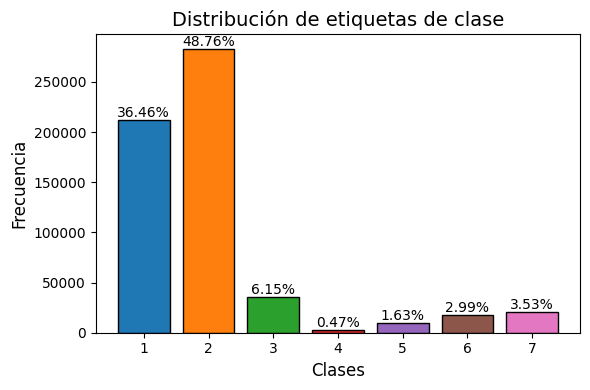

In [ ]:
# Definimos colores únicos para cada barra
colors = plt.cm.tab10(range(len(label_distribution)))

# Representamos gráficamente la distribución de etiquetas
plt.figure(figsize=(6, 4))
plt.bar(label_distribution.index, label_distribution.values, color=colors, edgecolor='black')

# Agregamos etiquetas con los porcentajes encima de cada barra
for index, value in enumerate(label_distribution.values):
    percentage = label_percentage.iloc[index]
    plt.text(label_distribution.index[index], value + max(label_distribution.values) * 0.01,
             f'{percentage:.2f}%', ha='center', fontsize=10, color='black')

# Configuramos el gráfico
plt.xlabel('Clases', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de etiquetas de clase', fontsize=14)
plt.xticks(label_distribution.index)
plt.tight_layout()

print(label_percentage.iloc[1])
# Mostramos el gráfico
plt.show()

Primero, se define una paleta de colores utilizando `plt.cm.tab10`, que asigna un color único a cada barra. La función `plt.bar()` se utiliza para crear el gráfico de barras, donde el eje x muestra las clases (`label_distribution.index`) y el eje y las frecuencias absolutas (`label_distribution.values`). Cada barra se colorea según el esquema de colores definido y se añade un borde negro para mejorar la legibilidad.

A continuación, se utiliza un bucle para agregar las etiquetas de porcentaje sobre cada barra. El método `enumerate()` recorre los valores de frecuencia de las clases, y para cada barra:
1. Calcula el porcentaje correspondiente (`label_percentage.iloc[index]`).
2. Posiciona el texto encima de la barra utilizando `plt.text()`. La posición vertical del texto se define dinámicamente sumando un pequeño margen al valor de la barra (`value + max(label_distribution.values) * 0.01`) para evitar superposición.

Finalmente, se configuran los elementos del gráfico, como las etiquetas de los ejes (`xlabel` y `ylabel`) y el título, ajustando las fuentes para mejorar la claridad. También se utiliza `plt.tight_layout()` para garantizar que todos los elementos del gráfico estén bien distribuidos dentro del área de visualización.

Con esta representación, es más fácil visualizar si las clases están balanceadas o si hay diferencias significativas en su frecuencia. En este caso, se percibe que el *dataset* no está balanceado, ya que algunas clases tienen muchas más instancias que otras. Esto podría influir en el rendimiento de los modelos de clasificación, que podrían estar sesgados hacia las clases con mayor frecuencia.

Antes de abordar el problema del desbalanceo, es fundamental garantizar que el dataset esté limpio y no contenga filas duplicadas, ya que estas podrían distorsionar los resultados al inflar artificialmente la representación de ciertas clases.

##### 1.5.1 - Detección de valores duplicados

In [ ]:
# Comprobamos si existen duplicados en el dataset
duplicated_rows = covertype_df.duplicated()

# Mostramos el número total de filas duplicadas
total_duplicates = duplicated_rows.sum()
print(f"El número total de filas duplicadas es: {total_duplicates}")

# Mostramos las filas duplicadas si las hay
if total_duplicates > 0:
    print("\nFilas duplicadas:")
    print(covertype_df[duplicated_rows])

El número total de filas duplicadas es: 0


El código tiene como objetivo identificar si existen filas duplicadas en el dataset y, en caso de encontrarlas, mostrarlas. Primero, se utiliza el método `duplicated()` de pandas para generar una serie booleana donde cada fila se marca como `True` si es idéntica a una fila anterior en todas sus columnas, incluida la variable objetivo. Esto asegura que las filas duplicadas sean completamente idénticas.

Luego, se calcula el número total de duplicados sumando los valores `True` de la serie generada. Esto permite saber cuántas filas duplicadas existen en el dataset. Si el total es mayor a cero, se imprimen las filas duplicadas para su revisión. Esto es útil para confirmar visualmente si las filas duplicadas tienen alguna característica relevante antes de proceder a eliminarlas.

En este caso, el número total de filas duplicadas es **0**, lo que indica que no hay duplicados en el dataset. Esto significa que no es necesario realizar una limpieza adicional en este aspecto.

##### 1.5.2 - Balanceo del *dataset*

Para balancear un dataset desbalanceado, se pueden utilizar dos técnicas principales: **sobremuestreo** y **submuestreo**.

- **Sobremuestreo**: consiste en aumentar la cantidad de datos de las clases minoritarias, ya sea duplicando datos existentes o generando nuevos datos sintéticos. Esto permite equilibrar la distribución sin perder información de las clases mayoritarias, aunque puede aumentar el riesgo de sobreajuste.

- **Submuestreo**: reduce el número de datos en las clases mayoritarias para igualarlo al de las clases minoritarias. Esto garantiza un balance en la distribución y evita inflar artificialmente los datos, pero puede implicar la pérdida de información relevante.

En nuestro caso, el dataset contiene **581,012 observaciones**, lo que proporciona una base suficientemente amplia para aplicar **submuestreo** sin comprometer significativamente la calidad de la información.

In [ ]:
from sklearn.utils import resample

# Identificamos la clase minoritaria y su tamaño
min_class_size = covertype_df['Cover_Type'].value_counts().min()

# Creamos un dataset vacío para almacenar las muestras balanceadas
balanced_data = []

# Aplicamos el submuestreo a cada clase
for cls in covertype_df['Cover_Type'].unique():
    class_subset = covertype_df[covertype_df['Cover_Type'] == cls]  # Filtramos la clase actual
    downsampled_subset = resample(class_subset, replace=False, n_samples=min_class_size, random_state=42)  # Submuestreamos
    balanced_data.append(downsampled_subset)  # Añadimos la muestra balanceada al dataset

# Concatenamos todas las clases balanceadas
balanced_dataset = pd.concat(balanced_data)

# Mostramos la distribución de clases en el dataset balanceado
print(f'El dataset balanceado ahora contiene {balanced_dataset["Cover_Type"].value_counts().sum()} instancias')

El dataset balanceado ahora contiene 19229 instancias


El codigo comienza calculando el tamaño de la clase minoritaria utilizando el método `value_counts().min()` en la columna **`Cover_Type`**. Este valor se almacena en `min_class_size` y será el número de observaciones al que se reducirá cada clase.

Luego, se inicializa una lista vacía llamada `balanced_data` para almacenar las muestras balanceadas. A continuación, se itera sobre cada clase presente en la variable objetivo **`Cover_Type`**. Durante cada iteración:
1. Se filtran las filas correspondientes a la clase actual (`class_subset`).
2. Se aplica el submuestreo con la función `resample()` de `sklearn.utils`. Este método selecciona aleatoriamente `min_class_size` filas de la clase sin reemplazo (`replace=False`), asegurando que las observaciones no se repitan. El parámetro `random_state=42` garantiza la reproducibilidad de los resultados.
3. La muestra balanceada para esa clase se añade a la lista `balanced_data`.

Una vez procesadas todas las clases, las muestras balanceadas almacenadas en la lista se combinan en un único *DataFrame* llamado `balanced_dataset` utilizando `pd.concat()`.

Por último, se imprime la distribución de clases en el nuevo dataset balanceado para confirmar que todas tienen el mismo número de observaciones. Esto también permite verificar el tamaño total del dataset balanceado, que será igual al tamaño de la clase minoritaria multiplicado por el número de clases.

El resultado es un dataset balanceado donde cada clase tiene exactamente el mismo número de instancias, eliminando el desbalanceo presente en el dataset original.

#### 1.6 - ¿Existen valores nulos o perdidos en el dataset?

Según la documentación del dataset, no contiene valores perdidos, por lo que no se espera la presencia de valores nulos. Sin embargo, esto puede verificarse directamente en el dataset con el siguiente código:

In [ ]:
# Calculamos el número de valores nulos por columna
null_values = covertype_df.isna().sum()

# Mostramos las columnas con sus respectivos valores nulos
print(null_values)

# Verificamos si existe al menos un valor nulo en todo el dataset
if covertype_df.isna().values.any():
  print("\nExisten valores nulos en el dataset.")
else:
  print("\nNo existen valores nulos en el dataset.")

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0
Soil_Type12                           0
Soil_Type13                           0
Soil_Type14                           0


El código comienza calculando el número de valores nulos por columna en el *dataset*. Para ello, se utiliza el método `.isna()`, que genera un *DataFrame* booleano donde cada posición contiene `True` si el valor correspondiente es nulo y `False` si no lo es. Luego, se aplica `.sum()` para contar los valores nulos en cada columna y se almacenan estos conteos en la variable `null_values`.

A continuación, se imprime `null_values`, lo que permite observar cuántos valores nulos tiene cada columna del *dataset*. Esto ayuda a identificar específicamente en qué columnas podrían faltar datos.

Por último, se verifica si existe al menos un valor nulo en todo el *dataset*. Para ello, se utiliza `.values.any()`, que convierte el *DataFrame* booleano generado por `.isna()` en un arreglo de NumPy y verifica si contiene al menos un `True`. Dependiendo del resultado, se imprime un mensaje indicando si hay valores nulos en el *dataset* o si todos los datos están completos.

#### 1.7 - ¿Existe alguna variable altamente correlacionada con la variable de clase?

Como en nuestro dataset tenemos tanto variables independientes continuas como categóricas, no es posible utilizar un solo método para medir la correlación con la variable de clase (*Cover_Type*). Métodos como Pearson o Spearman están diseñados para evaluar relaciones entre variables continuas, lo que los hace inapropiados para manejar variables categóricas o para evaluar una variable categórica como *Cover_Type*. Por lo tanto, la respuesta requiere dividir el análisis en dos partes.

Para medir la relación entre las variables continuas y la variable de clase, se pueden emplear pruebas como **ANOVA** o **Kruskal-Wallis**. Estas pruebas evalúan si existen diferencias significativas en los valores medios o en las distribuciones de las variables continuas entre las distintas clases de *Cover_Type*. **ANOVA** es más apropiado cuando los datos cumplen con los supuestos de normalidad y homogeneidad de varianzas entre los grupos. Por otro lado, **Kruskal-Wallis** es una alternativa más robusta que no requiere cumplir estos supuestos, siendo ideal en casos donde los datos tienen *outliers* o distribuciones no normales. La elección entre ambas pruebas dependerá de las características específicas de los datos.

La prueba de **Chi-cuadrado** es una herramienta estadística que permite evaluar si existe una relación significativa entre dos variables categóricas. Esta prueba compara las frecuencias observadas en los datos con las frecuencias esperadas bajo la hipótesis nula de independencia entre las variables. Es importante destacar que la precisión de esta prueba depende de que las frecuencias esperadas en las celdas de la tabla de contingencia sean de al menos 5, lo que garantiza la validez de los resultados. En el contexto de nuestro dataset, esta prueba resulta particularmente adecuada para analizar variables como *Wilderness_Area* o *Soil_Type*, permitiendo identificar si estas tienen una relación estadísticamente significativa con la variable de clase *Cover_Type*. Este análisis complementará la evaluación ya realizada sobre las variables continuas, asegurando que todas las variables sean consideradas de manera adecuada en función de su naturaleza.

##### 1.7.1 - Análisis estadístico y visual para evaluar la normalidad de las variables continuas

In [ ]:
# Mostramos los estadísticos de las variables continuas en el dataset balanceado
balanced_dataset[continuous_variables].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,19229.000000,19229.000000,19229.000000,19229.000000,19229.000000,19229.000000,19229.000000,19229.000000,19229.000000,19229.000000
mean,2747.851890,155.734308,16.561132,227.763482,51.268761,1720.461074,212.986479,218.800458,134.480160,1515.152582
std,418.151645,109.706774,8.500252,210.206112,61.347986,1329.502212,30.588766,22.927368,45.960966,1103.723061
min,1874.000000,0.000000,0.000000,0.000000,-153.000000,0.000000,46.000000,95.000000,0.000000,0.000000
25%,2374.000000,66.000000,10.000000,67.000000,5.000000,751.000000,196.000000,207.000000,106.000000,732.000000
50%,2750.000000,125.000000,15.000000,180.000000,32.000000,1320.000000,220.000000,222.000000,138.000000,1265.000000
75%,3105.000000,257.000000,22.000000,330.000000,79.000000,2312.000000,236.000000,235.000000,166.000000,1983.000000
max,3849.000000,360.000000,51.000000,1368.000000,543.000000,6935.000000,254.000000,254.000000,247.000000,7080.000000


Primero, se utiliza el método `describe()` para obtener los estadísticos descriptivos de las variables continuas del dataset balanceado. Estos estadísticos incluyen información como la media, la mediana (50%), los cuartiles (25% y 75%), los valores mínimo y máximo, y la desviación estándar. Este análisis permite evaluar la distribución y la dispersión de las variables, proporcionando una base para determinar si cumplen los supuestos de normalidad requeridos para ciertos análisis estadísticos, como ANOVA.

Los resultados muestran que variables como **`Elevation`** mantienen una distribución más cercana a la normalidad, con valores de media y mediana similares (2,747.85 y 2,750, respectivamente) y una desviación estándar moderada (418.15). Sin embargo, otras variables como **`Vertical_Distance_To_Hydrology`** presentan características que sugieren una falta de normalidad, como un valor mínimo extremadamente negativo (-153), mientras que la media (51.27) y la mediana (32) están alejadas, lo que indica una notable asimetría.

Variables como **`Horizontal_Distance_To_Roadways`** y **`Horizontal_Distance_To_Fire_Points`** presentan una gran dispersión, con desviaciones estándar altas (1,329.50 y 1,103.72, respectivamente) en comparación con sus medias. Por otro lado, las variables relacionadas con los índices de sombra (**`Hillshade_9am`**, **`Hillshade_Noon`**, **`Hillshade_3pm`**) tienen un rango restringido (0-254), lo que refleja distribuciones limitadas.

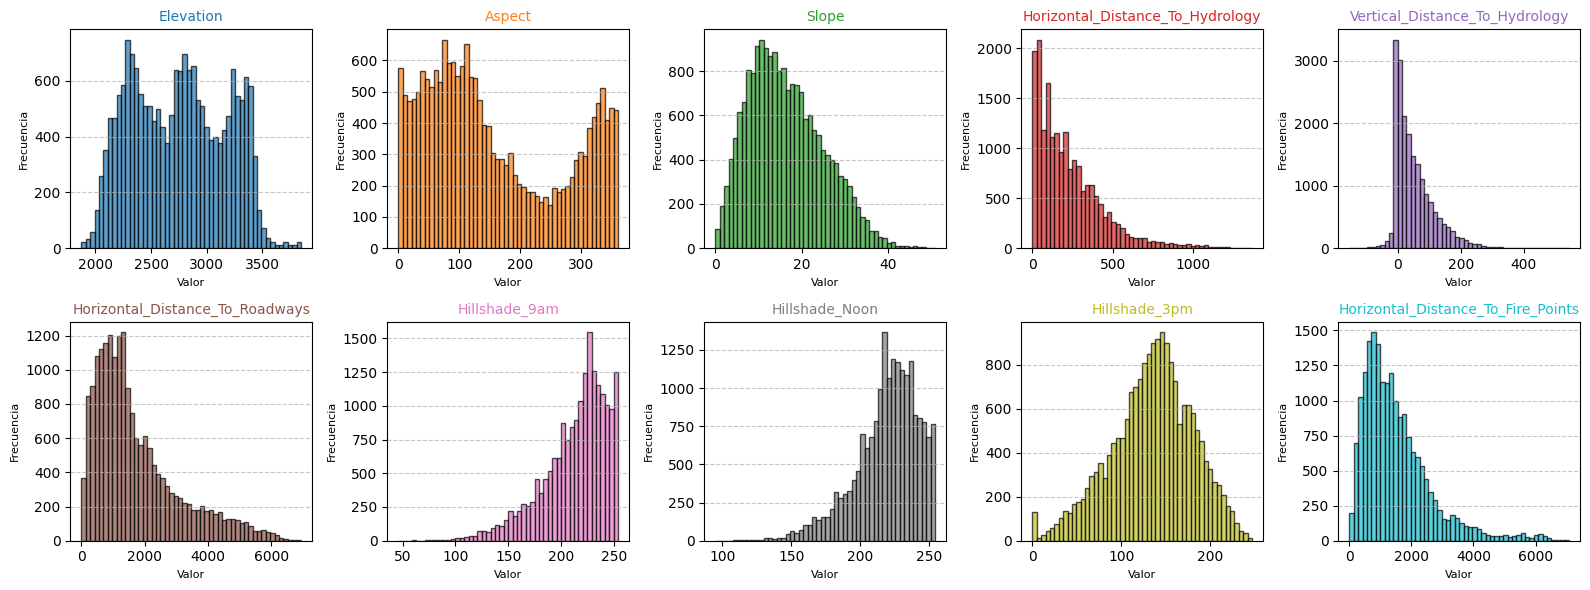

In [ ]:
# Configuración para mostrar múltiples histogramas en una matriz
rows, cols = 2, 5  # Número de filas y columnas de la matriz de gráficos
fig, axes = plt.subplots(rows, cols, figsize=(16, 6))
axes = axes.flatten()  # Aplanamos la matriz de ejes para iterar fácilmente

# Definimos colores únicos para cada gráfico
colors = plt.cm.tab10(range(len(continuous_variables)))

# Creamos un histograma para cada variable continua
for i, variable in enumerate(continuous_variables):
  axes[i].hist(balanced_dataset[variable], bins=50, color=colors[i], alpha=0.7, edgecolor='black')
  axes[i].set_title(variable, fontsize=10, color=colors[i])
  axes[i].set_xlabel('Valor', fontsize=8)
  axes[i].set_ylabel('Frecuencia', fontsize=8)
  axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Eliminamos ejes vacíos si hay más gráficos que variables
for j in range(len(continuous_variables), len(axes)):
  fig.delaxes(axes[j])

# Ajustamos automáticamente los márgenes entre los gráficos
plt.tight_layout()

# Mostramos el gráfico
plt.show()

El código configura una matriz de gráficos para mostrar los histogramas de las variables continuas del *dataset* balanceado, organizados en dos filas y cinco columnas mediante `plt.subplots(rows, cols)`. Esto permite agrupar todas las gráficas en una sola figura, facilitando la comparación visual de las distribuciones. La matriz de ejes (`axes`) se aplana con `axes.flatten()` para recorrerlos fácilmente en un bucle.

A cada variable continua se le asigna un color único utilizando `plt.cm.tab10`, mejorando la claridad y distinción de los gráficos. Dentro del bucle, se crea un histograma para cada variable con `axes[i].hist()`, utilizando 50 intervalos (`bins=50`) y un diseño semitransparente (`alpha=0.7`). El título de cada gráfico incluye el nombre de la variable, con el color correspondiente. Además, se añaden etiquetas a los ejes x e y para facilitar la interpretación de los valores y frecuencias, y se activa una cuadrícula en el eje y con `grid` para mejorar la legibilidad.

Si hay más subgráficos configurados que variables, se eliminan los ejes vacíos con `fig.delaxes()`. Al final, `plt.tight_layout()` ajusta los márgenes entre los gráficos, evitando superposiciones, y `plt.show()` muestra la figura completa con todos los histogramas.

Las gráficas permiten visualizar cómo se distribuyen las variables continuas tras el balanceo del *dataset*. Aunque se observa una mejor uniformidad en la distribución, muchas variables aún presentan asimetrías, valores atípicos y rangos truncados, como se puede apreciar en **`Horizontal_Distance_To_Roadways`**, **`Vertical_Distance_To_Hydrology`** y **`Hillshade_9am`**. Esto sugiere que no cumplen los supuestos de normalidad necesarios para aplicar ANOVA. Por lo tanto, es más adecuado emplear pruebas como Kruskal-Wallis, que son más robustas frente a distribuciones no normales, para analizar la relación entre estas variables y la variable de clase **`Cover_Type`**.

##### 1.7.2 - Análisis de correlación entre las variables continuas y la variable de clase mediante Kruskal-Wallis

In [ ]:
from scipy.stats import kruskal

# Lista para almacenar los resultados
kruskal_results = []

# Recorremos todas las variables continuas
for variable in continuous_variables:
  # Obtenemos las clases únicas de Cover_Type
  unique_classes = balanced_dataset['Cover_Type'].unique()

  # Inicializamos una lista para almacenar los valores de la variable por clase
  groups = []

  # Recorremos cada clase única para dividir los datos
  for cls in unique_classes:
    # Filtramos las filas donde Cover_Type coincide con la clase actual
    group = balanced_dataset[balanced_dataset['Cover_Type'] == cls][variable]
    # Añadimos los valores filtrados a la lista de grupos
    groups.append(group)

  # Aplicamos la prueba de Kruskal-Wallis
  stat, p_value = kruskal(*groups)

  # Guardamos los resultados en una lista
  kruskal_results.append({'Variable': variable, 'Stat': stat, 'p_value': p_value.round(2)})

# Convertimos los resultados a un DataFrame
kruskal_df = pd.DataFrame(kruskal_results)

# Ordenamos los resultados por el valor de Stat en orden descendente
kruskal_df = kruskal_df.sort_values(by='Stat', ascending=False)

kruskal_df

,Variable,Stat,p_value
0,Elevation,16706.434955,0.0
5,Horizontal_Distance_To_Roadways,6689.293890,0.0
9,Horizontal_Distance_To_Fire_Points,4856.346833,0.0
3,Horizontal_Distance_To_Hydrology,2605.552964,0.0
6,Hillshade_9am,2440.507001,0.0
2,Slope,2017.433411,0.0
8,Hillshade_3pm,1150.053841,0.0
7,Hillshade_Noon,785.184831,0.0
4,Vertical_Distance_To_Hydrology,640.846221,0.0
1,Aspect,195.587305,0.0


El código realiza la prueba de **Kruskal-Wallis** para evaluar la relación entre las variables continuas y la variable de clase `Cover_Type`.

Primero, se inicializa una lista llamada `kruskal_results` que almacenará los resultados de las pruebas de Kruskal-Wallis para cada variable continua. Esta lista se completará iterando sobre las variables continuas presentes en la lista `continuous_variables`.

Para cada variable, se extraen las clases únicas de la variable de clase `Cover_Type` utilizando el método `.unique()`. Esto permite identificar los diferentes grupos en los que se compararán las distribuciones de la variable continua actual.

Luego, se inicializa una lista vacía llamada `groups` para almacenar los valores de la variable continua divididos por cada clase de `Cover_Type`. Para ello, se recorre cada clase única y se filtran las filas del *dataset* donde `Cover_Type` coincide con la clase actual. Los valores filtrados de la variable continua se añaden a la lista `groups`, lo que genera una lista de subconjuntos, cada uno correspondiente a los valores de una clase específica.

Con los datos organizados en grupos, se aplica la prueba de Kruskal-Wallis utilizando la función `kruskal` de *SciPy*. Esta función toma como entrada los diferentes subconjuntos almacenados en `groups` y devuelve dos valores: `stat` y `p_value`.

- **`stat` (Estadística H)**: Es el valor de la estadística de Kruskal-Wallis que mide las diferencias entre las medianas de los grupos. Un valor alto indica mayores diferencias entre los grupos y, por lo tanto, una mayor correlación con la variable de clase.
- **`p_value` (Valor p)**: Representa la probabilidad de obtener un resultado igual o más extremo que el observado bajo la hipótesis nula (que no hay diferencias entre los grupos). Un valor pequeño (por ejemplo, menor a 0.05) indica que las diferencias son estadísticamente significativas.

Los resultados de la prueba para cada variable (el nombre de la variable, el valor de `stat` y el `p_value`) se almacenan como un diccionario en la lista `kruskal_results`.

Una vez que se han calculado las pruebas para todas las variables continuas, la lista `kruskal_results` se convierte en un *DataFrame* llamado `kruskal_df`.

Finalmente, el *DataFrame* se ordena en orden descendente según el valor de `Stat`. Esto permite identificar rápidamente las variables continuas más correlacionadas con la variable de clase, ya que aquellas con valores más altos de `Stat` indican mayores diferencias entre los grupos.

El resultado, `kruskal_df`, muestra una tabla donde cada fila representa una variable continua y las columnas indican el nombre de la variable, su estadística de Kruskal-Wallis (`Stat`) y el valor p (`p_value`).

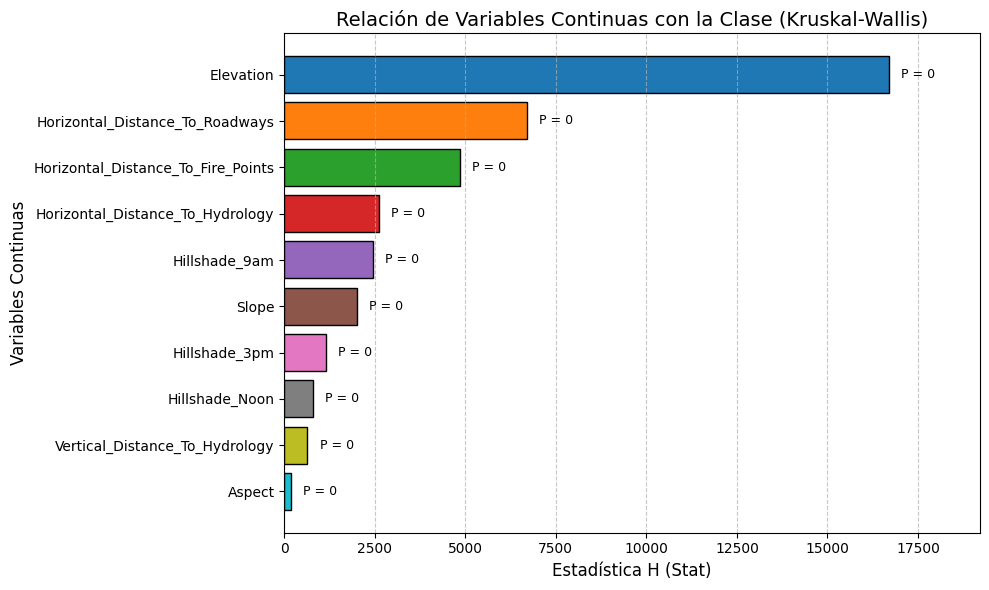

In [ ]:
# Definimos colores únicos para cada gráfico
colors = plt.cm.tab10(range(len(continuous_variables)))

# Representación gráfica de los resultados
plt.figure(figsize=(10, 6))
plt.barh(kruskal_df['Variable'], kruskal_df['Stat'], color=colors, edgecolor='black')

# Configuramos el límite del eje x para ajustar las barras y etiquetas
max_stat = kruskal_df['Stat'].max()  # Valor máximo de Stat
plt.xlim(0, max_stat + (0.15 * max_stat))  # Añadimos un 15% del valor máximo como margen

# Agregamos etiquetas de p-value fuera de las barras
for i in range(len(kruskal_df)):
  # Obtenemos la posición y el valor de la estadística H y el p-value
  stat = kruskal_df['Stat'].iloc[i]
  p_value = kruskal_df['p_value'].iloc[i]

  # Agregamos el texto del p-value fuera de la barra con un margen dinámico
  if p_value == 0:
    plt.text(stat + 0.02 * max_stat, i, f'P = 0', va='center', ha='left', fontsize=9, color='black')
  else:
    plt.text(stat + 0.02 * max_stat, i, f'P = {p_value:.4f}', va='center', ha='left', fontsize=9, color='black')

# Configuramos el gráfico
plt.xlabel('Estadística H (Stat)', fontsize=12)
plt.ylabel('Variables Continuas', fontsize=12)
plt.title('Relación de Variables Continuas con la Clase (Kruskal-Wallis)', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Invertimos el eje Y para que la barra más alta esté arriba
plt.tight_layout()

# Mostramos el gráfico
plt.show()

El código genera una representación gráfica de los resultados obtenidos mediante la prueba de Kruskal-Wallis para las variables continuas del dataset balanceado. Este gráfico tiene como objetivo visualizar las estadísticas *H* de cada variable junto con sus valores *p*, lo que permite identificar fácilmente las variables con mayor correlación con la variable de clase.

Primero, se definen colores únicos para cada barra utilizando el mapa de colores `tab10`, asegurando que cada variable se distinga visualmente. El gráfico de barras horizontal (`barh`) organiza las variables en el eje *y* y los valores de la estadística *H* en el eje *x*. Las barras se colorean según la lista de colores y se les agrega un borde negro para mejorar su contraste.

Para evitar que los valores de las barras se salgan del rango visual, se ajusta el límite del eje *x* sumando un margen dinámico del 15% al valor máximo de la estadística *H*. Además, se recorren todas las variables en el DataFrame `kruskal_df` para agregar etiquetas de los valores *p* en cada barra. Si el valor *p* es exactamente 0, se muestra como `P = 0`; en caso contrario, se presenta con cuatro decimales. Estas etiquetas se colocan fuera de las barras con un desplazamiento proporcional al valor máximo de *H*.

El gráfico incluye títulos y etiquetas descriptivas en los ejes, y el eje *y* se invierte para mostrar primero las variables con mayor valor de *H*. Los márgenes entre los elementos se ajustan automáticamente con `tight_layout()` para evitar superposiciones, y el gráfico se muestra con `plt.show()`.

El análisis de las barras revela que las variables con las estadísticas *H* más altas tienen una relación más fuerte con la variable de clase. Entre las variables analizadas, **`Elevation`** se destaca como la más correlacionada, con un valor de *H* significativamente mayor. Otras variables como **`Horizontal_Distance_To_Roadways`**, **`Horizontal_Distance_To_Fire_Points`**, y **`Slope`** también muestran valores altos de *H*, indicando una correlación significativa, aunque menor en comparación con `Elevation`.

Los valores *p* asociados a todas las variables son extremadamente bajos (`P < 0.05`), confirmando la significancia estadística de las diferencias observadas entre las clases. Esto demuestra que todas las variables continuas analizadas tienen una relación significativa con la variable de clase, aunque el grado de esta relación varía.

En conclusión, **`Elevation`** se identifica como la variable más relevante en términos de correlación con **`Cover_Type`**, seguida de **`Horizontal_Distance_To_Roadways`**, **`Horizontal_Distance_To_Fire_Points`**, y **`Slope`**. Estas variables podrían ser componentes clave en modelos predictivos, dado su impacto estadísticamente significativo en la clasificación.

##### 1.7.3 - Análisis de la relación entre las variables categóricas y la variable de clase mediante Chi-Cuadrado

In [ ]:
from scipy.stats import chi2_contingency

# Lista para almacenar los resultados
chi2_results = []

# Iteramos sobre las variables categóricas excluyendo Cover_Type
for column in categorical_columns:
  if column != 'Cover_Type':  # Excluir la variable objetivo
    # Crear una tabla de contingencia entre la variable categórica y Cover_Type
    contingency_table = pd.crosstab(balanced_dataset[column], balanced_dataset['Cover_Type'])

    # Aplicamos la prueba de Chi-cuadrado
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    # Guardamos los resultados en una lista
    chi2_results.append({'Variable': column, 'Chi2': chi2, 'p_value': p_value, 'dof': dof})

# Convertimos los resultados a un DataFrame
chi2_df = pd.DataFrame(chi2_results)

# Ordenamos los resultados por Chi2 en orden descendente
chi2_df = chi2_df.sort_values(by='Chi2', ascending=False)

# Filtramos las variables con un p-value significativo (p < 0.05)
filtered_chi2_df = chi2_df[chi2_df['p_value'] < 0.05]

# Filtrar las variables con un Chi2 superior a un umbral (Chi2 > 5000)
filtered_chi2_df = filtered_chi2_df[filtered_chi2_df['Chi2'] > 5000]

# Mostrar las variables más representativas
filtered_chi2_df

,Variable,Chi2,p_value,dof
43,Wilderness_Area4,12804.572873,0.0,6
10,Soil_Type10,5218.915292,0.0,6
3,Soil_Type3,5068.793460,0.0,6
0,Wilderness_Area1,5061.880506,0.0,6


El código analiza las variables categóricas del dataset balanceado, excluyendo la variable objetivo `Cover_Type`, con el propósito de determinar su asociación con esta última mediante la prueba de Chi-cuadrado. Para ello, comienza generando una lista vacía llamada `chi2_results`, donde se almacenarán los resultados del análisis de cada variable categórica.

Cada variable categórica es evaluada individualmente. Primero, se crea una tabla de contingencia con el método `pd.crosstab()`, que cruza las categorías de la variable con las clases de `Cover_Type`, mostrando las frecuencias observadas para cada combinación. Esta tabla sirve de base para aplicar la prueba de Chi-cuadrado utilizando `chi2_contingency()`. Esta función calcula varios valores relevantes: la estadística de Chi-cuadrado (`Chi2`), que mide las diferencias entre las frecuencias observadas y las esperadas bajo la hipótesis nula de independencia; el valor p (`p_value`), que indica si estas diferencias son estadísticamente significativas; los grados de libertad (`dof`), que reflejan la complejidad de la tabla; y las frecuencias esperadas (`expected`), que se generarían si las variables fueran independientes.

Los resultados obtenidos para cada variable se almacenan en la lista `chi2_results` como diccionarios. Al finalizar el análisis, esta lista se convierte en un *DataFrame* llamado `chi2_df`, que organiza los resultados en formato tabular para facilitar su interpretación. Las variables se ordenan en función de su valor de `Chi2`, permitiendo identificar cuáles tienen una relación más fuerte con la variable de clase.

Posteriormente, se aplican dos filtros sucesivos al *DataFrame* `chi2_df` para identificar las variables categóricas más relevantes. En primer lugar, se seleccionan únicamente las variables cuyo valor p es menor a 0.05, asegurando así que solo se incluyan aquellas con diferencias estadísticamente significativas respecto a la variable de clase. En segundo lugar, se filtran las variables cuyo valor de `Chi2` supera un umbral de 5000. Este paso adicional permite enfocar el análisis en las variables con una asociación más sólida con `Cover_Type`.

El resultado final, contenido en `filtered_chi2_df`, resalta las variables categóricas con mayor relevancia. En este caso, las variables más destacadas incluyen `Wilderness_Area4`, que presenta un valor de Chi2 de 12804.57, seguida por `Soil_Type10`, `Soil_Type3` y `Wilderness_Area1`, todas con valores de Chi2 superiores al umbral definido. Este análisis refuerza la selección de variables para su posterior uso en modelos predictivos, basándose tanto en la significancia estadística como en la magnitud de la asociación con la variable de clase.

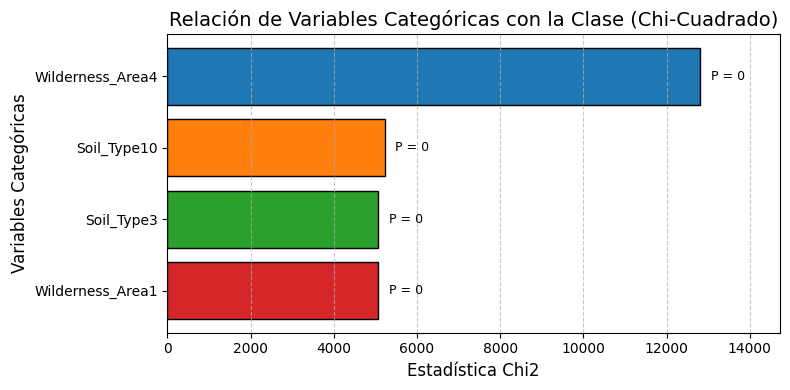

In [ ]:
# Definimos colores únicos para cada barra utilizando la paleta tab10
colors = plt.cm.tab10(range(len(filtered_chi2_df)))

# Representación gráfica de los resultados
plt.figure(figsize=(8, 4))
plt.barh(filtered_chi2_df['Variable'], filtered_chi2_df['Chi2'], color=colors, edgecolor='black')

# Configuramos el límite del eje x para ajustar las barras y etiquetas
max_chi2 = filtered_chi2_df['Chi2'].max()
plt.xlim(0, max_chi2 + (0.15 * max_chi2))  # Añadimos un margen dinámico

# Agregamos etiquetas de p-value fuera de las barras
for i in range(len(filtered_chi2_df)):
    chi2 = filtered_chi2_df['Chi2'].iloc[i]
    p_value = filtered_chi2_df['p_value'].iloc[i]

    # Agregamos el texto del p-value fuera de la barra con un margen dinámico
    if p_value == 0:
        plt.text(chi2 + 0.02 * max_chi2, i, f'P = 0', va='center', ha='left', fontsize=9, color='black')
    else:
        plt.text(chi2 + 0.02 * max_chi2, i, f'P = {p_value:.4f}', va='center', ha='left', fontsize=9, color='black')

# Configuramos el gráfico
plt.xlabel('Estadística Chi2', fontsize=12)
plt.ylabel('Variables Categóricas', fontsize=12)
plt.title('Relación de Variables Categóricas con la Clase (Chi-Cuadrado)', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Invertimos el eje Y para que la barra más alta esté arriba
plt.tight_layout()

# Mostramos el gráfico
plt.show()

Este código genera una representación gráfica para visualizar la relación entre las variables categóricas y la variable de clase mediante la estadística Chi-cuadrado (*Chi2*). En este caso, se utiliza la paleta de colores `tab10` de Matplotlib, asignando un color único a cada variable categórica. Esto facilita distinguir visualmente las variables y resaltar las diferencias en sus valores de Chi2.

Primero, se obtiene la paleta `tab10` con `plt.cm.tab10`, que contiene hasta diez colores diferentes, asignados a las barras del gráfico de forma secuencial. Esto permite que cada variable categórica tenga un color exclusivo, mejorando la claridad del gráfico y evitando ambigüedades visuales.

El gráfico se configura como un gráfico de barras horizontal mediante `plt.barh()`. Cada barra representa una variable categórica, con su longitud determinada por el valor de Chi2 correspondiente. Las barras se colorean según los colores de la paleta, y se les añade un borde negro (`edgecolor='black'`) para resaltarlas.

Para ajustar el gráfico y evitar que las barras más largas se salgan del espacio disponible, se calcula el valor máximo de Chi2 (`max_chi2`) y se añade un 15% de margen al eje *x*. Esto asegura que todas las etiquetas y elementos gráficos se visualicen correctamente.

Además, se añaden etiquetas fuera de las barras para mostrar los valores *p* asociados a cada variable categórica. Si el valor *p* es exactamente 0, se muestra como `P = 0`; de lo contrario, se presenta con cuatro decimales (`P = 0.0001`). Las etiquetas se colocan de forma dinámica utilizando un pequeño desplazamiento adicional basado en el valor máximo de Chi2.

Finalmente, se ajustan los elementos del gráfico, incluyendo las etiquetas de los ejes, el título y una cuadrícula en el eje *x* para facilitar la interpretación. El eje *y* se invierte para que las barras con los valores de Chi2 más altos se muestren en la parte superior, destacando las variables categóricas más relacionadas con la variable de clase.

El resultado es un gráfico claro, visualmente atractivo y fácil de interpretar, donde cada variable categórica se distingue con un color único, permitiendo identificar rápidamente cuáles tienen una mayor relación con la variable de clase según sus valores de Chi2.

##### 1.7.4 - Conclusiones

Tras realizar un análisis exhaustivo de las variables del dataset en relación con la variable de clase **`Cover_Type`**, considerando tanto las variables continuas como las categóricas, se obtuvieron las siguientes conclusiones:

En el caso de las **variables continuas**, el análisis estadístico mediante la prueba de Kruskal-Wallis demostró que varias variables tienen una correlación significativa con la variable de clase. Destaca **`Elevation`**, que obtuvo el valor *H* más alto, indicando una fuerte asociación con las clases de `Cover_Type`. Otras variables, como **`Horizontal_Distance_To_Roadways`**, **`Horizontal_Distance_To_Fire_Points`**, y **`Slope`**, también mostraron correlaciones relevantes, aunque menos pronunciadas. Estas variables reflejan la importancia de las características cartográficas en la clasificación de la cubierta forestal.

En cuanto a las **variables categóricas**, el análisis mediante la prueba de Chi-cuadrado identificó aquellas con mayor asociación con la variable de clase. Entre ellas, **`Wilderness_Area4`** destacó con el valor de *Chi2* más alto, indicando una fuerte relación con las clases de `Cover_Type`. Variables como **`Soil_Type10`**, **`Soil_Type3`**, y **`Wilderness_Area1`** también presentaron valores de Chi2 elevados, lo que refuerza su relevancia estadística (*p < 0.05*) para la clasificación. Estas variables categóricas destacan por capturar aspectos relacionados con la distribución geográfica y el tipo de terreno.

Cabe destacar que, aunque las pruebas estadísticas no dependen del balanceo, trabajar con un dataset balanceado garantiza que los resultados sean más representativos y menos sesgados hacia las clases mayoritarias. Esto resulta especialmente útil para interpretar y validar la relevancia de las variables en un contexto equilibrado, asegurando que tanto las clases mayoritarias como las minoritarias sean igualmente consideradas en el análisis.

Este análisis permitió identificar un conjunto de variables continuas y categóricas con una correlación significativa con la variable de clase. Estas variables no solo son útiles para la clasificación, sino que también ofrecen una combinación complementaria de características cuantitativas y cualitativas, lo que refuerza su importancia en la predicción de la cubierta forestal en el dataset balanceado.

In [ ]:
# Extraemos las variables categóricas seleccionadas
selected_categorical = filtered_chi2_df['Variable'].tolist()

# Definimos las variables continuas seleccionadas (puedes personalizar esta lista con las relevantes)
selected_continuous = ['Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Slope']

# Combinamos las variables categóricas y continuas
selected_variables = selected_continuous + selected_categorical

# Creamos el nuevo dataset con las variables seleccionadas
selected_dataset = balanced_dataset[selected_variables + ['Cover_Type']]  # Incluimos Cover_Type como la variable objetivo

# Mostramos las primeras filas del nuevo dataset
selected_dataset.head()

,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Slope,Wilderness_Area4,Soil_Type10,Soil_Type3,Wilderness_Area1,Cover_Type
5464,2883,2200,785,14,0,0,0,0,5
232212,2724,180,785,25,0,0,0,1,5
240811,2807,1856,1231,15,0,0,0,0,5
308134,2703,85,765,3,0,0,0,0,5
10066,2830,1722,1727,13,0,0,0,0,5


Este código tiene como objetivo crear un nuevo *dataset* que incluya únicamente las variables más relevantes para la clasificación, tanto categóricas como continuas, junto con la variable objetivo **`Cover_Type`**. Este paso es fundamental para reducir la complejidad del modelo al trabajar únicamente con las características que se consideran significativas tras los análisis realizados.

Primero, se extraen las variables categóricas seleccionadas. Estas variables fueron identificadas durante el análisis Chi-cuadrado y se encuentran almacenadas en el *DataFrame* `filtered_chi2_df`. Para obtenerlas, se utiliza la columna `Variable` y se convierte en una lista con el método `.tolist()`. Esto permite trabajar directamente con los nombres de las columnas categóricas relevantes.

A continuación, se definen las variables continuas seleccionadas. Estas fueron determinadas previamente durante el análisis de Kruskal-Wallis, donde se identificaron las variables continuas con mayor correlación con la variable de clase. La lista `selected_continuous` incluye manualmente estas variables, asegurando que reflejen los resultados del análisis.

Ambos tipos de variables (categóricas y continuas) se combinan en una única lista llamada `selected_variables`. Esta lista contiene todas las características que serán utilizadas para el modelo. Además, se incluye explícitamente la variable objetivo `Cover_Type` en la construcción del nuevo *dataset* para asegurarse de que el conjunto de datos esté completo para tareas de clasificación.

Finalmente, el *dataset* filtrado se crea seleccionando solo las columnas especificadas en `selected_variables` y añadiendo `Cover_Type`. Esto se realiza utilizando la notación de selección de columnas de pandas: `covertype_df[selected_variables + ['Cover_Type']]`. Por último, se visualizan las primeras filas del nuevo *dataset* con `.head()` para verificar su contenido.

#### 1.8 - ¿Qué tres variables del dataset consideras que pueden influenciar más en la clasificación de los datos?¿Qué pruebas harías para comprobar tus hipótesis?

Con base en los análisis realizados, las tres variables que probablemente tengan mayor influencia en la clasificación son **`Elevation`**, **`Wilderness_Area4`** y **`Soil_Type10`**. Estas variables fueron seleccionadas no solo por su relevancia teórica, sino también por los resultados obtenidos en los análisis estadísticos, como Kruskal-Wallis para las variables continuas y Chi-cuadrado para las categóricas. Ambas pruebas sugieren una relación significativa con la variable de clase **`Cover_Type`**.

Para validar esta hipótesis, se llevarán a cabo las siguientes pruebas:

1. **Correlación entre las variables continuas seleccionadas**: Se calculará la matriz de correlación para las variables continuas incluidas en el análisis. Esto permitirá evaluar la relación entre ellas y determinar si son independientes o si existe redundancia en la información que aportan. La independencia es esencial para evitar problemas de multicolinealidad que podrían afectar el rendimiento de los modelos predictivos.

2. **Tablas de contingencia para las variables categóricas seleccionadas**: Se generarán tablas de frecuencias cruzadas que muestren cómo se distribuyen las clases de **`Cover_Type`** dentro de las categorías de las variables categóricas seleccionadas. Este análisis permitirá visualizar la capacidad de cada variable para discriminar entre clases y validar su utilidad en el proceso de clasificación.

Estas pruebas son esenciales para confirmar si las variables seleccionadas tienen un impacto significativo en la clasificación y para justificar su inclusión en futuros modelos predictivos. Este enfoque asegura que las variables seleccionadas aporten información relevante y complementaria para la predicción de la cubierta forestal en el dataset.

##### 1.8.1 - Correlacion entre variables continuas

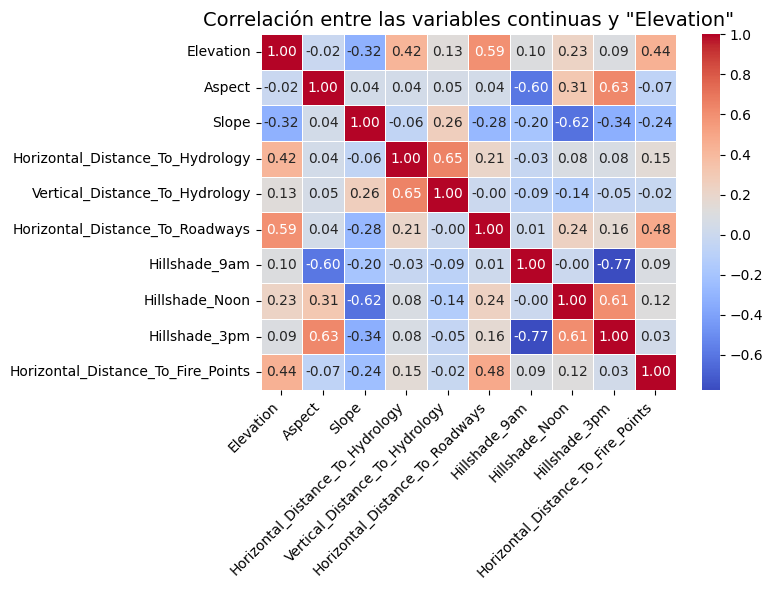

In [ ]:
# Filtramos las variables continuas seleccionadas del dataset balanceado
continuous_dataset = balanced_dataset[continuous_variables]

# Calculamos la matriz de correlación
correlation_matrix = continuous_dataset.corr()

# Representamos la matriz de correlación como un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Configuramos el título y las etiquetas del gráfico
plt.title('Correlación entre las variables continuas y "Elevation"', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Mostramos el gráfico
plt.show()

El código utiliza el método `corr()` para calcular la matriz de correlación de Pearson entre las variables continuas seleccionadas del dataset balanceado. Este análisis permite evaluar las relaciones lineales entre las variables, indicando qué pares tienen mayor redundancia o independencia en sus valores. Los coeficientes de correlación obtenidos oscilan entre -1 y 1, donde valores cercanos a 1 reflejan una correlación positiva fuerte, valores cercanos a -1 indican una correlación negativa fuerte, y valores cercanos a 0 sugieren una correlación débil o inexistente.

El resultado se visualiza como un *heatmap* generado con Seaborn, en el cual se utiliza la paleta de colores `coolwarm` para diferenciar las correlaciones. Los tonos cálidos (rojos) indican correlaciones positivas, mientras que los tonos fríos (azules) señalan correlaciones negativas. Los valores numéricos de las correlaciones se anotan directamente sobre el gráfico, lo que facilita su interpretación. Además, se ajustan las etiquetas de los ejes y el diseño general del gráfico para garantizar una visualización clara y legible.

La matriz de correlación revela que la variable **Elevation** muestra relaciones moderadas con otras variables continuas. En particular, destaca su correlación positiva con **Horizontal_Distance_To_Roadways** (0.59) y **Horizontal_Distance_To_Hydrology** (0.42), lo que sugiere que las áreas más elevadas tienden a estar más alejadas de las carreteras y fuentes de agua. Por otro lado, presenta una correlación negativa moderada con **Slope** (-0.32), indicando que las pendientes más pronunciadas se encuentran en zonas de menor elevación. Estas relaciones, aunque no son extremadamente altas, indican que **Elevation** tiene una interacción con otras variables que podría influir en el comportamiento del modelo.

Este análisis confirma que **Elevation** es una variable relevante para la clasificación, ya que muestra correlaciones significativas con varias características del terreno. Aunque algunas relaciones son moderadas, estas sugieren que **Elevation** aporta información única y complementaria al modelo predictivo, justificando su elección como una de las variables más influyentes en la clasificación de `Cover_Type`.

##### 1.8.2 - Correlacion entre variables categóricas

In [ ]:
# Seleccionamos las variables categóricas relevantes y la variable objetivo
categorical_variables = []

for col in categorical_columns:
  # obviamos la columna objetivo
  if col != 'Cover_Type':
    categorical_variables.append(col)

# Generamos tablas de contingencia para cada variable categórica seleccionada
tables = {}
for var in categorical_variables:
  # Creamos la tabla cruzada entre la variable categórica y Cover_Type
  contingency_table = pd.crosstab(balanced_dataset[var], balanced_dataset['Cover_Type'], normalize='index')

  # Guardamos la tabla en el diccionario
  tables[var] = contingency_table

# Inicializamos un DataFrame vacío para combinar todas las tablas
combined_table = pd.DataFrame()

# Iteramos sobre las tablas generadas para combinarlas
for var, table in tables.items():
  # Añadimos un índice adicional con el nombre de la variable categórica
  table.index = pd.MultiIndex.from_product([[var], table.index])

  # Concatenamos las tablas al DataFrame combinado
  combined_table = pd.concat([combined_table, table])

# Mostramos la tabla combinada con formato visual
print("Tabla de contingencias combinada:")
display(combined_table.style.background_gradient(cmap="Blues").format("{:.2%}"))

Tabla de contingencias combinada:


El código comienza seleccionando las variables categóricas relevantes a partir de la lista `categorical_columns`, excluyendo explícitamente la variable objetivo `Cover_Type`. Esto garantiza que las tablas de contingencia reflejen únicamente la relación de las variables categóricas con `Cover_Type`.

Posteriormente, se generan tablas de contingencia para cada variable categórica utilizando `pd.crosstab()`, que calcula las frecuencias relativas de `Cover_Type` dentro de cada categoría de las variables categóricas. La opción `normalize='index'` asegura que los valores de cada fila sumen 100%, lo que permite interpretar las distribuciones como porcentajes.

Las tablas generadas se almacenan en un diccionario llamado `tables`, donde las claves corresponden a los nombres de las variables categóricas y los valores son las tablas de contingencia asociadas. Esto organiza los datos de manera que puedan ser procesados o visualizados posteriormente.

A continuación, las tablas se combinan en un único `DataFrame` denominado `combined_table`. Para cada tabla, se añade un índice superior que identifica la variable categórica correspondiente utilizando `pd.MultiIndex.from_product`. Las tablas se concatenan utilizando `pd.concat()`, creando un formato compacto donde las categorías y sus distribuciones están agrupadas por variable.

Finalmente, se visualiza el resultado completo con `display()` aplicando un gradiente de color azul (`cmap="Blues"`) para resaltar las proporciones más altas, y se formatean los valores como porcentajes con dos decimales.

El análisis confirma que las variables **`Wilderness_Area4`** y **`Soil_Type10`** tienen distribuciones notablemente diferenciadas entre las clases de `Cover_Type`. En el caso de **`Wilderness_Area4`**, la clase 1 presenta una distribución muy distinta a la clase 0, con valores como `46.27%` frente a `0.00%`, lo que indica que esta variable tiene una capacidad discriminativa significativa para clasificar ciertas clases de `Cover_Type`.

Por su parte, **`Soil_Type10`** muestra una clara separación en las frecuencias relativas entre las categorías, con valores como `52.29%` y `31.41%` en diferentes clases. Este comportamiento refuerza su importancia como una variable categórica clave en la clasificación.

En contraste, algunas variables categóricas como **`Soil_Type8`** o **`Soil_Type9`** presentan distribuciones menos diferenciadas entre las clases, lo que sugiere una menor utilidad discriminativa en un modelo de clasificación.

Por otro lado, variables como **`Soil_Type37`** o **`Soil_Type36`** tienen un 100% de asociación con ciertas clases específicas, lo que las hace extremadamente útiles para identificar esas clases en particular. Sin embargo, estas variables no aportan discriminación entre las demás clases, lo que limita su aplicabilidad general en la clasificación global.

En conclusión, las variables **`Wilderness_Area4`** y **`Soil_Type10`** destacan por su capacidad para discriminar entre múltiples clases de `Cover_Type`, mientras que variables como **`Soil_Type37`** o **`Soil_Type36`** tienen una utilidad más específica. Ambas perspectivas deben ser consideradas al diseñar un modelo predictivo equilibrado y robusto, aprovechando tanto las variables con alta capacidad discriminativa general como aquellas que son útiles para identificar clases concretas.

##### 1.8.3 - Conclusiones

Tras realizar todas las pruebas planteadas, se concluye que las variables **`Elevation`**, **`Wilderness_Area4`** y **`Soil_Type10`** efectivamente destacan como las más representativas para influir en la clasificación de las clases de **`Cover_Type`**. Sin embargo, las evidencias muestran que esta afirmación no se cumple de manera uniforme en todos los aspectos analizados, lo que genera algunas consideraciones importantes.

En el caso de **`Elevation`**, los resultados del análisis de Kruskal-Wallis confirmaron su relación significativa con la variable de clase, con un valor de *$H$* marcadamente alto, lo que respalda la hipótesis inicial. Además, la correlación de **`Elevation`** con las demás variables continuas fue moderada o baja, lo que refuerza su independencia como una variable relevante y no redundante. Por lo tanto, **`Elevation`** cumple plenamente con las expectativas de ser una variable continua clave en el proceso de clasificación.

En cuanto a las variables categóricas, los resultados de las tablas de contingencia respaldan en gran medida la hipótesis sobre **`Wilderness_Area4`** y **`Soil_Type10`**. Ambas variables mostraron distribuciones notablemente diferenciadas entre las clases de `Cover_Type`, indicando su capacidad discriminativa. Sin embargo, otras variables categóricas como **`Soil_Type37`** o **`Soil_Type36`** también destacaron por su asociación del 100% con ciertas clases, lo que sugiere que, aunque útiles para identificar categorías específicas, no contribuyen de manera generalizada a la clasificación. Esto implica que las variables seleccionadas son relevantes, pero podrían complementarse con otras variables categóricas que aporten información adicional para clases específicas.

Como se menciona en el apartado **1.7.4**, no es necesario trabajar con un dataset balanceado para realizar pruebas estadísticas como Kruskal-Wallis o Chi-cuadrado. Sin embargo, al utilizar un dataset balanceado, se garantiza que los resultados sean más representativos y menos sesgados hacia las clases mayoritarias. Este enfoque asegura que las variables seleccionadas reflejen relaciones significativas tanto para las clases mayoritarias como para las minoritarias, lo que refuerza la robustez de las conclusiones obtenidas.

### 2. Clasificación

#### 2.1 - **Support Vector Machine**

In [ ]:
# Importamos las librerías para utilizar las máquinas de vector de soportes.
# Utilizaremos la librería svm:
from sklearn import svm

#Cargamos también las librerías para hacer la matriz de confusión y la cross validation:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

Para la implementación del modelo de clasificación de SVM usaremos la clase Support Vector Classifier de sklearn, https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

El algoritmo de SVM necesita ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- C
- kernel
- degree
- gamma

##### 2.1.1 - Indica qué son cada uno de estos hiperparámetros

###### `C`

El hiperparámetro **`C`** controla el equilibrio entre maximizar el margen y minimizar el error de clasificación en el modelo de Support Vector Machine (*SVM*). En otras palabras, **`C`** define cuánto peso se da a los errores de clasificación durante el entrenamiento del modelo.

Un valor alto para **`C`** penaliza fuertemente los errores, obligando al modelo a clasificar correctamente tantas muestras como sea posible. Esto puede llevar a un ajuste excesivo (*overfitting*), ya que el modelo intenta aprender incluso los detalles específicos o el ruido del dataset.

Un valor bajo para **`C`**, en cambio, permite un margen más amplio, lo que hace que el modelo sea más flexible y menos propenso a sobreajustarse. Sin embargo, esto también puede provocar un subajuste (*underfitting*), ya que el modelo no prestará tanta atención a las muestras mal clasificadas.

La elección de **`C`** debe realizarse cuidadosamente mediante validación cruzada, evaluando cuál proporciona el mejor equilibrio entre generalización y precisión.

###### `kernel`

El hiperparámetro **`kernel`** define la función que utiliza el SVM para transformar los datos originales en un espacio de mayor dimensión, donde sea más fácil encontrar un hiperplano que separe las clases. Los kernels permiten a SVM resolver problemas no lineales al proyectar los datos en un espacio donde las clases sean linealmente separables.

Los kernels más comunes disponibles en sklearn son:

- **`linear`**: utiliza un kernel lineal, adecuado para datasets donde las clases son separables en el espacio original. Es eficiente y rápido para datasets grandes.
- **`poly`**: aplica un kernel polinómico, que genera límites de decisión más complejos. Este kernel es útil para problemas con relaciones polinómicas entre las características.
- **`rbf`** (por defecto): utiliza un kernel de base radial (*Radial Basis Function*), también conocido como kernel gaussiano. Es el kernel más versátil y se adapta bien a problemas con fronteras no lineales.
- **`sigmoid`**: aplica un kernel sigmoidal, que en algunos casos puede imitar el comportamiento de una red neuronal. Es menos común en la práctica.

La elección del kernel depende de las características del dataset y debe validarse para determinar cuál proporciona el mejor rendimiento.

###### `degree`

El hiperparámetro **`degree`** se aplica únicamente al kernel polinómico (**`poly`**) y define el grado del polinomio utilizado para transformar los datos. Por ejemplo, un **`degree`** de 2 crea un modelo basado en funciones cuadráticas, mientras que un valor de 3 utiliza funciones cúbicas.

Un **`degree`** más alto permite modelar relaciones más complejas, pero también aumenta el riesgo de sobreajuste y puede incrementar significativamente el tiempo de entrenamiento. Este parámetro no tiene efecto si se utiliza un kernel diferente al polinómico.

###### `gamma`

El hiperparámetro **`gamma`** controla la influencia de un punto de datos individual en el modelo cuando se utiliza un kernel no lineal, como **`rbf`**, **`poly`** o **`sigmoid`**. En términos prácticos, **`gamma`** afecta cómo el modelo decide los límites de decisión en relación con los datos.

Un valor alto para **`gamma`** significa que cada punto tiene una influencia pequeña pero fuerte, lo que permite límites de decisión más detallados y complejos. Esto puede llevar a un ajuste excesivo del modelo. En contraste, un valor bajo para **`gamma`** implica que los puntos tienen una influencia más amplia, lo que produce límites de decisión más suaves pero menos precisos.

Al igual que **`C`**, **`gamma`** debe ajustarse cuidadosamente mediante validación cruzada para evitar problemas de sobreajuste o subajuste en el modelo.

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro decision_function_shape

##### 2.1.2 - ¿Qué indica ese parámetro? ¿Para qué puede ser útil?

###### `decision_function_shape`

El hiperparámetro **`decision_function_shape`** en `SVC` de sklearn controla cómo se estructura y representa la función de decisión en un modelo de clasificación multiclase. Este hiperparámetro es relevante cuando se utiliza SVM en problemas con más de dos clases, ya que el modelo de SVM está diseñado originalmente para problemas binarios.

El valor de este hiperparámetro define el enfoque que el modelo utilizará para manejar múltiples clases. Tiene dos opciones principales:

1. **`ovo` (por defecto)**: Significa "One-vs-One". En este enfoque, el modelo entrena un clasificador separado para cada par de clases. Para un problema con *n* clases, esto resulta en $\left ( \dfrac{n \cdot (n-1)}{2} \right )$ clasificadores. Durante la predicción, cada clasificador emite una votación, y la clase con más votos se selecciona como la predicción final.

2. **`ovr`**: Significa "One-vs-Rest". En este enfoque, el modelo entrena un clasificador por cada clase, donde cada clasificador separa una clase del resto. Para un problema con *n* clases, se entrenan *n* clasificadores. Durante la predicción, el clasificador con la puntuación más alta determina la clase final.

El hiperparámetro **`decision_function_shape`** permite adaptar el modelo al tamaño y la naturaleza del problema:

- **`ovo`** es útil para problemas multiclase con un número relativamente bajo de clases. Es computacionalmente más intensivo, pero puede ser más preciso en problemas donde las clases están fuertemente separadas en pares.
  
- **`ovr`** es más eficiente computacionalmente y funciona bien para problemas con muchas clases. Este enfoque puede ser más robusto cuando una clase tiene un comportamiento claramente distinto del resto.

##### 2.1.3 - Reducir el número de instancias

Tenemos un *dataset* de más de medio millón de instancias, y para el objetivo de la actividad no hacen falta tantas. Por eso, antes de aplicar SVM vamos a reducir el número de instancias. SVM requiere una gran carga computacional y con ese volumen de instancias el tiempo requerido sería demasiado elevado.

Inicialmente, se intentó trabajar con 100.000 instancias, como se planteaba en el código proporcionado en la actividad, pero el tiempo de ejecución resultó inviable. Posteriormente, se redujo el número de instancias a 10.000, logrando completar el proceso en 6 minutos. Al ampliar a 20.000 instancias, el tiempo de ejecución aumentó significativamente a 18 minutos, pero los resultados obtenidos entre usar 10.000 y 20.000 instancias fueron prácticamente idénticos.

Por este motivo, se ha decidido reducir tanto el *dataset* original desbalanceado como el *dataset* previamente balanceado a 10.000 instancias. Esto permitirá trabajar de forma más eficiente y comparar los resultados obtenidos en ambos enfoques. Esta comparación será clave para analizar el impacto del balanceo previo en el rendimiento del modelo y evaluar si el balanceo interno proporcionado por parámetros como `class_weight` es suficiente para abordar la desproporción entre clases.

In [ ]:
# Número de filas a seleccionar
lines_number = 10000

# Seleccionamos un subconjunto aleatorio de filas de los dataset 'covertype_df'.
sample_original = covertype_df.sample(n=lines_number, random_state=13)
sample_balanced = balanced_dataset.sample(n=lines_number, random_state=13)

# Mostramos las instancias del dataset
print(sample_original.shape, sample_balanced.shape)

(10000, 55) (10000, 55)


El código selecciona una muestra aleatoria de 10.000 filas de los *datasets* **`covertype_df`** y **`balanced_dataset`**, que contienen 581.012 y 19.229 filas respectivamente. Este procedimiento tiene como objetivo reducir el tamaño de ambos *datasets*, facilitando el análisis y la implementación de algoritmos que requieren una alta carga computacional, como las *Support Vector Machines* (SVM).

La función `sample()` se utiliza para realizar esta selección aleatoria. El argumento **`n=lines_number`** indica el tamaño de la muestra, que en este caso es de 10.000 filas. Para asegurar la reproducibilidad del proceso, se establece el parámetro **`random_state=13`**, que actúa como una semilla, garantizando que el mismo subconjunto de datos se genere si el código se ejecuta varias veces con el mismo *dataset* y la misma semilla.

Por último, el método `.shape` se emplea para mostrar las dimensiones de los *datasets* reducidos, confirmando que ambos contienen 10.000 filas y el número correcto de columnas. Este paso es esencial para verificar que la operación se realizó correctamente.

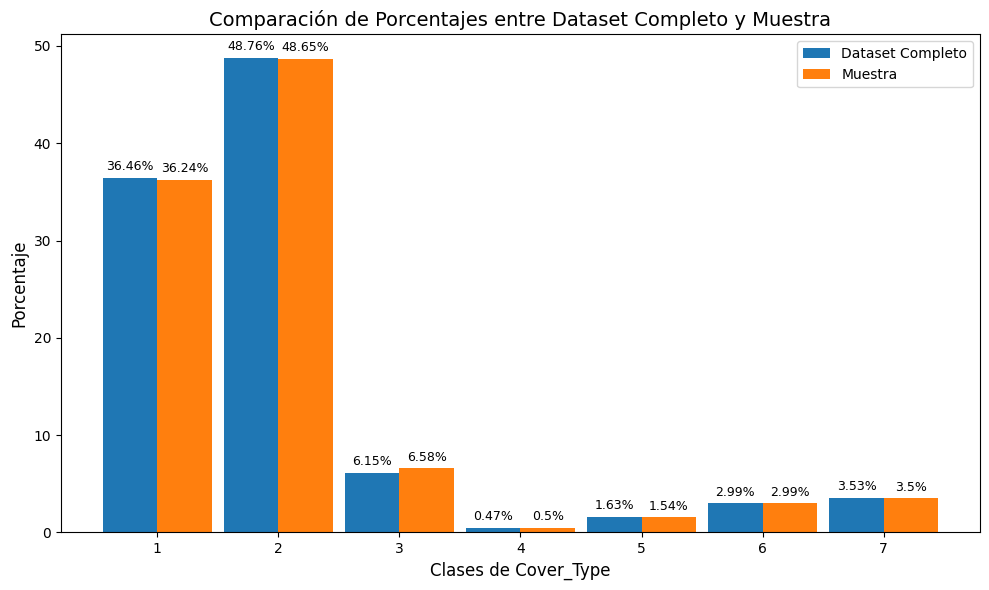

In [ ]:
# Contamos las etiquetas de clase y las ordenamos por índice
class_percentage_full = covertype_df['Cover_Type'].value_counts(normalize=True).sort_index() * 100
class_percentage_sample = sample_original['Cover_Type'].value_counts(normalize=True).sort_index() * 100

# Configuramos el tamaño de la figura
plt.figure(figsize=(10, 6))

# Índices para las barras
index = np.arange(len(class_percentage_full))  # Las categorías están basadas en los índices de Cover_Type

# Ancho de las barras
bar_width = 0.45

# Creamos las barras para el dataset completo
plt.bar(index, class_percentage_full.values, bar_width, label='Dataset Completo')

# Creamos las barras para la muestra
plt.bar(index + bar_width, class_percentage_sample.values, bar_width, label='Muestra')

# Añadimos el título y las etiquetas
plt.xlabel('Clases de Cover_Type', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)
plt.title('Comparación de Porcentajes entre Dataset Completo y Muestra', fontsize=14)
plt.xticks(index + bar_width / 2, class_percentage_full.index)  # Ajustamos las etiquetas en el eje x

# Añadimos la leyenda
plt.legend()

# Añadimos etiquetas sobre las barras del dataset completo
for i in range(len(index)):
    plt.text(index[i], class_percentage_full.values[i] + 0.5,
             f'{class_percentage_full.values[i].round(2)}%', ha='center', va='bottom', fontsize=9)

# Añadimos etiquetas sobre las barras de la muestra
for i in range(len(index)):
    plt.text(index[i] + bar_width, class_percentage_sample.values[i] + 0.5,
             f'{class_percentage_sample.values[i].round(2)}%', ha='center', va='bottom', fontsize=9)

# Ajustamos los márgenes del gráfico
plt.tight_layout()

# Mostramos el gráfico
plt.show()

El objetivo del código es verificar si la muestra seleccionada del *dataset* completo mantiene una distribución representativa de las clases presentes en el conjunto de datos original. Esto es fundamental para asegurar que cualquier análisis o modelo basado en la muestra refleje de manera precisa las características del *dataset* completo.

Primero, se calculan los porcentajes de cada clase de `Cover_Type` tanto en el *dataset* completo como en la muestra utilizando el método `value_counts(normalize=True)`. Estos porcentajes se multiplican por 100 para convertirlos en valores porcentuales y se redondean a dos decimales para facilitar su interpretación. Las clases se ordenan por su índice, asegurando una comparación directa entre ambos conjuntos.

Posteriormente, los resultados se visualizan en un gráfico de barras, donde cada barra representa una categoría en uno u otro conjunto. Las barras del *dataset* completo y de la muestra están coloreadas de manera distinta y se alinean lado a lado para permitir una comparación clara. Las etiquetas sobre las barras muestran los valores porcentuales, ayudando a identificar posibles discrepancias entre los dos conjuntos.

De la gráfica obtenida, se observa que las distribuciones porcentuales de las clases en el *dataset* completo y en la muestra son muy similares. Por ejemplo, la clase 1 representa el 36,46% en el *dataset* completo y el 36,24% en la muestra, mientras que la clase 2 corresponde al 48,76% en el *dataset* completo y al 48,65% en la muestra. La clase 3 también tiene distribuciones similares, con un 6,15% en el *dataset* completo y un 6,58% en la muestra. Aunque hay ligerísimas variaciones, estas están dentro de lo esperable para un muestreo aleatorio y no comprometen la representatividad.

En este análisis, no se incluye el *dataset* balanceado, ya que sus clases tienen una representación uniforme por definición. Esto significa que cualquier muestra seleccionada del *dataset* balanceado también reflejará una distribución equitativa entre las clases, eliminando la necesidad de validar su representatividad mediante esta comparación.

Podemos concluir que la muestra seleccionada del *dataset* completo refleja con precisión la distribución de las clases. Esto valida que la muestra es adecuada para llevar a cabo análisis representativos y que los resultados obtenidos serán generalizables al *dataset* completo. Por otro lado, en el caso del *dataset* balanceado, no se requiere este tipo de validación, ya que su distribución uniforme de clases se mantiene en cualquier subconjunto.

##### 2.1.4 - Separar datos de entrenamiento y test

Antes de separar los datos en conjuntos de entrenamiento y prueba para utilizar SVM, es necesario realizar dos pasos fundamentales: codificar las variables categóricas y escalar las variables continuas. En este caso, la codificación de las variables categóricas ya se encuentra realizada en el dataset, lo que nos permite centrarnos en la normalización de las variables continuas.

Para escalar las variables continuas, se puede emplear *Min-Max Scaling* o *Standard Scaling (z-score)*, dependiendo de las características de los datos:

- **`StandardScaler`**: Ideal si los datos tienen una distribución aproximadamente normal, ya que escala los valores para que tengan media 0 y desviación estándar 1.
- **`MinMaxScaler`**: Más adecuado si los datos tienen un rango amplio o distribuciones no normales, ya que comprime los valores dentro de un rango específico (generalmente entre 0 y 1).

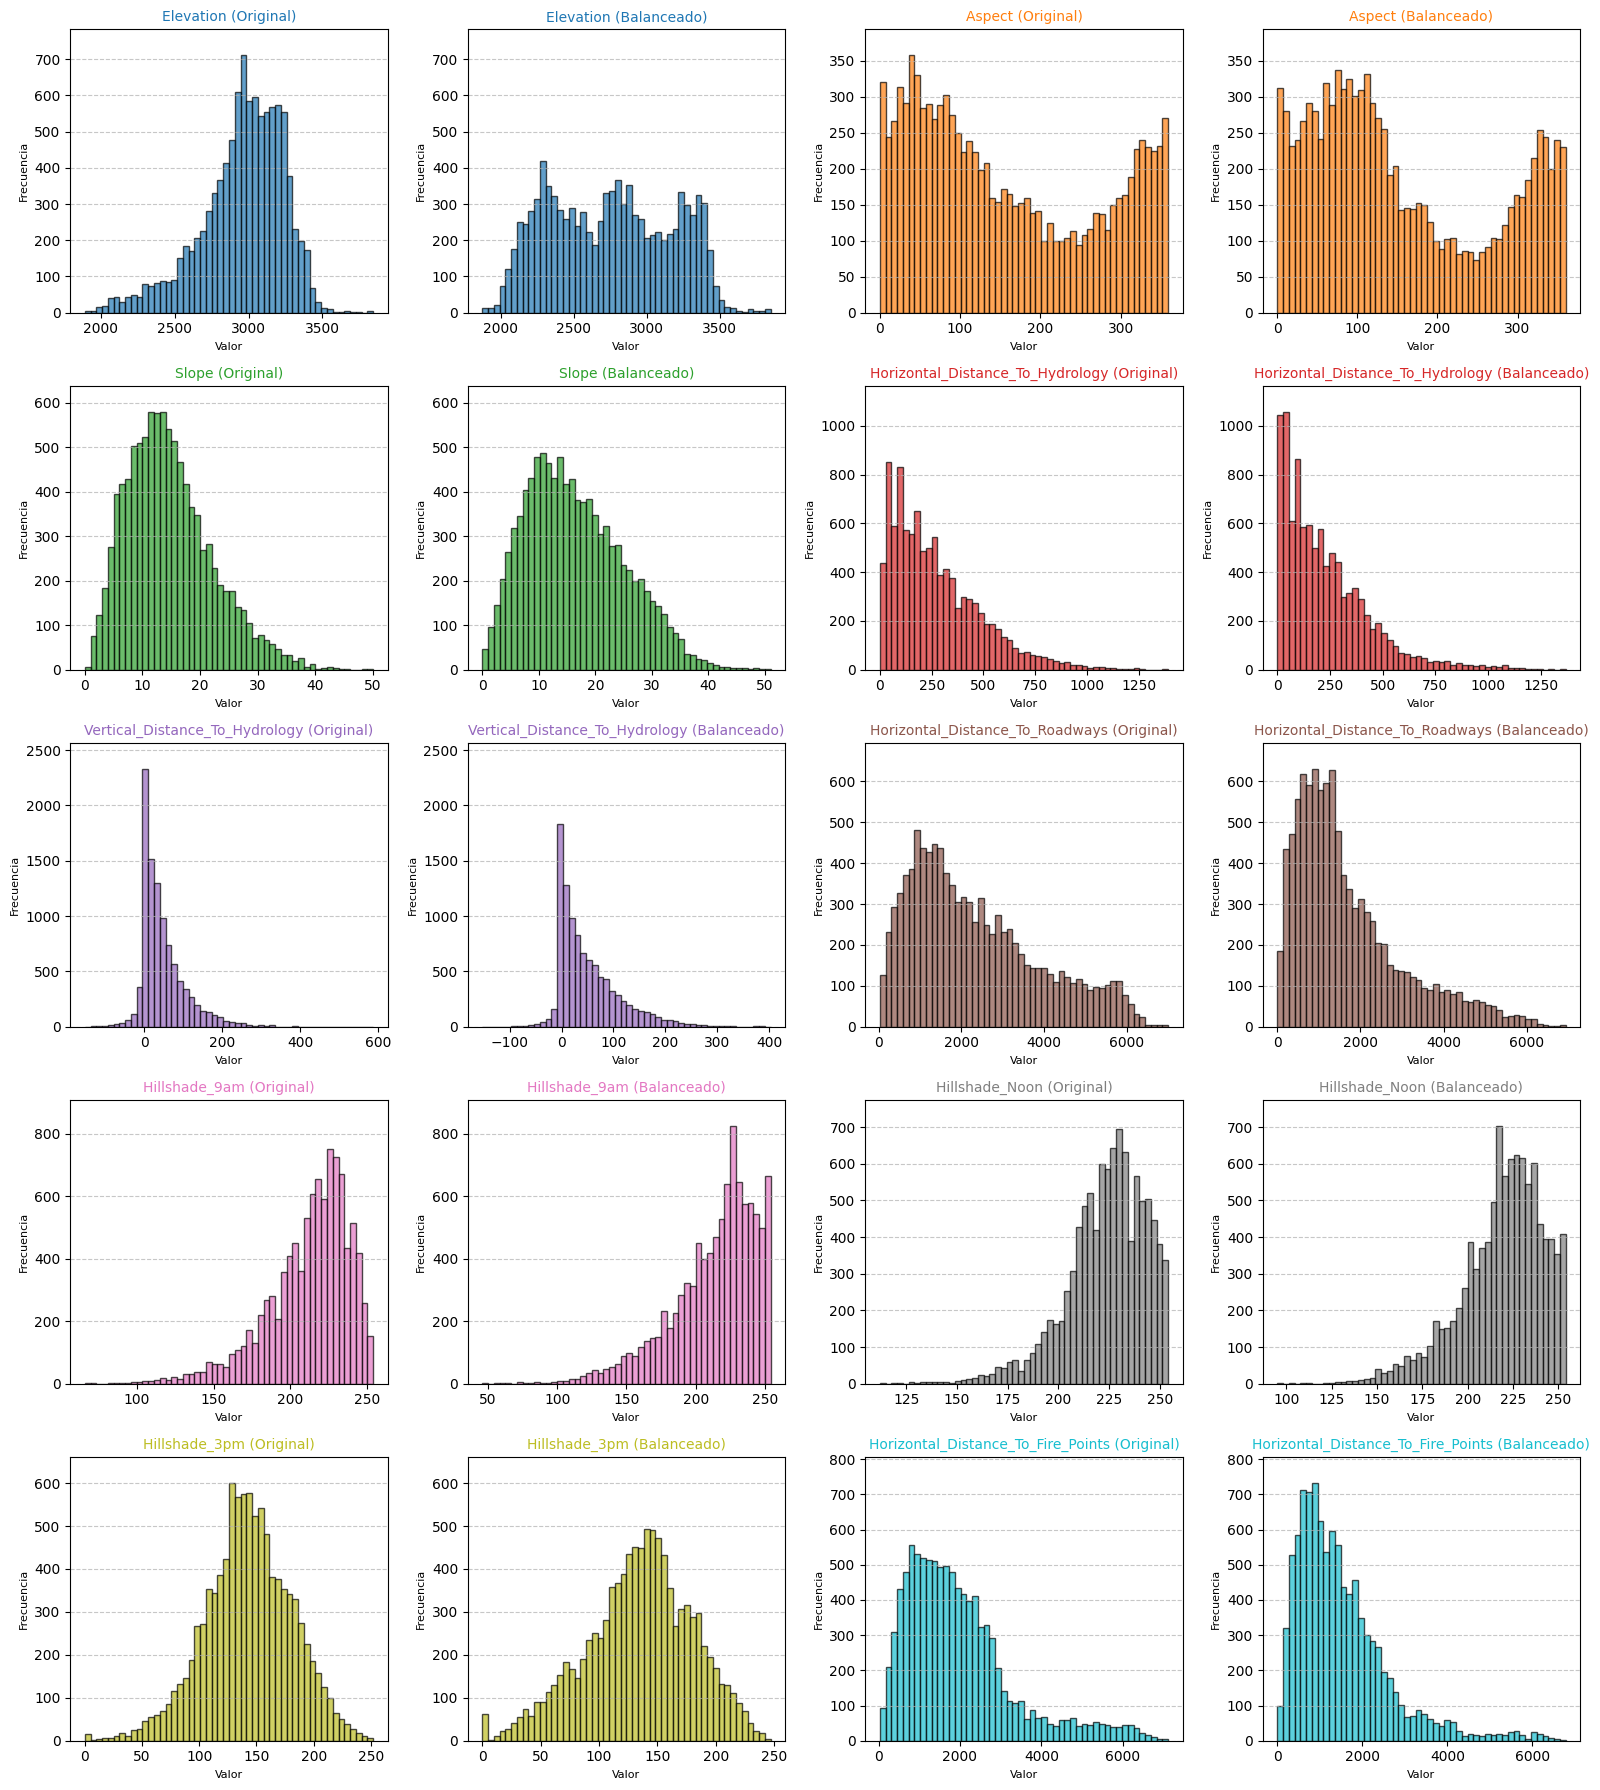

In [ ]:
rows, cols = 5, 4  # Número de filas y columnas de la matriz de gráficos
fig, axes = plt.subplots(rows, cols, figsize=(16, 18))  # Ajustamos el tamaño de la figura
axes = axes.flatten()  # Aplanamos la matriz de ejes para iterar fácilmente

# Definimos colores únicos para cada gráfico
colors = plt.cm.tab10(range(len(continuous_variables)))

# Creamos histogramas para cada variable continua, ajustando la escala por variable
for i, variable in enumerate(continuous_variables):
    # Calculamos el límite máximo de frecuencia para la variable actual
    y_max_original, _ = np.histogram(sample_original[variable], bins=50)
    y_max_balanced, _ = np.histogram(sample_balanced[variable], bins=50)
    max_y_for_variable = max(y_max_original.max()*1.1, y_max_balanced.max()*1.1)

    # Histograma para el dataset original
    axes[2 * i].hist(sample_original[variable], bins=50, color=colors[i], alpha=0.7, edgecolor='black')
    axes[2 * i].set_title(f"{variable} (Original)", fontsize=10, color=colors[i])
    axes[2 * i].set_xlabel('Valor', fontsize=8)
    axes[2 * i].set_ylabel('Frecuencia', fontsize=8)
    axes[2 * i].set_ylim(0, max_y_for_variable)  # Ajustamos los límites del eje y según la variable
    axes[2 * i].grid(axis='y', linestyle='--', alpha=0.7)

    # Histograma para el dataset balanceado
    axes[2 * i + 1].hist(sample_balanced[variable], bins=50, color=colors[i], alpha=0.7, edgecolor='black')
    axes[2 * i + 1].set_title(f"{variable} (Balanceado)", fontsize=10, color=colors[i])
    axes[2 * i + 1].set_xlabel('Valor', fontsize=8)
    axes[2 * i + 1].set_ylabel('Frecuencia', fontsize=8)
    axes[2 * i + 1].set_ylim(0, max_y_for_variable)  # Ajustamos los límites del eje y según la variable
    axes[2 * i + 1].grid(axis='y', linestyle='--', alpha=0.7)

# Eliminamos ejes vacíos si hay más gráficos que variables
for j in range(2 * len(continuous_variables), len(axes)):
    fig.delaxes(axes[j])

# Ajustamos automáticamente los márgenes entre los gráficos
plt.tight_layout()

# Mostramos el gráfico
plt.show()

El código tiene como objetivo visualizar las distribuciones de las variables continuas seleccionadas del *dataset* original y del *dataset* balanceado mediante histogramas, ajustando dinámicamente las alturas máximas de los ejes *y* para facilitar la comparación visual entre ambos conjuntos.

Primero, se configura una matriz de gráficos con 5 filas y 4 columnas, lo que permite visualizar hasta 10 variables continuas, cada una representada en dos gráficos consecutivos: el primero para los datos originales y el segundo para los datos balanceados. Los ejes de la matriz se aplanan para iterar fácilmente y asignar un gráfico a cada variable.

Para cada variable continua, se crean dos histogramas:
1. **Original**: Representa la distribución de la variable en el *dataset* original.
2. **Balanceado**: Muestra cómo cambia la distribución al aplicar un balanceo previo al *dataset*.

El cálculo de la altura máxima del eje $y$ se realiza dinámicamente. Se calculan las frecuencias máximas de los histogramas correspondientes a los datos originales y balanceados. Luego, se determina el valor máximo entre ambas distribuciones, al que se le incrementa un 10% para añadir espacio visual adicional en las alturas de las barras. Este ajuste garantiza que los gráficos de cada variable (original y balanceado) sean comparables de manera directa.

Cada gráfico tiene configurados 50 intervalos, un color único (seleccionado de la paleta `tab10` de Matplotlib) y un diseño semitransparente (`alpha=0.7`) con bordes en negro para destacar las barras. Los gráficos incluyen un título que indica si la distribución corresponde al *dataset* original o al balanceado, etiquetas en los ejes y una cuadrícula en el eje `y` para facilitar la interpretación de las frecuencias.

Se elimina cualquier eje sobrante en caso de que haya más gráficos configurados que variables disponibles. Finalmente, `plt.tight_layout()` ajusta automáticamente los márgenes entre los gráficos para evitar superposiciones, y `plt.show()` muestra la figura completa.

En la imagen generada, se visualizan las distribuciones para las 10 variables continuas en ambos *datasets*:

1. **Dataset Original**: Las distribuciones reflejan las características originales de los datos, con sesgos y asimetrías evidentes en variables como:
   - **`Horizontal_Distance_To_Hydrology`** y **`Vertical_Distance_To_Hydrology`** presentan una gran concentración en valores bajos, reflejando concentraciones de valores en rangos bajos.
   - **`Hillshade_9am`**, que tiene una distribución bimodal.
   - **`Elevation`**, que presenta una forma aproximadamente normal, aunque con un ligero sesgo hacia los valores más altos.

2. **Dataset Balanceado**: El balanceo introduce cambios en las distribuciones, con patrones más uniformes y reducciones en los picos de concentración de valores en varias variables. Por ejemplo:
   - En **`Elevation`**, los datos balanceados muestran una distribución más uniforme entre los valores extremos.
   - **`Slope`** muestra una distribución más equilibrada, aunque persisten algunas concentraciones en valores bajos.
   - **`Horizontal_Distance_To_Hydrology`** y **`Vertical_Distance_To_Hydrology`** presentan una ligera redistribución, pero los sesgos hacia valores pequeños permanecen.   

En la imagen generada, se observan sesgos y distribuciones asimétricas en varias variables continuas, lo que refleja las características particulares de los *dataset*. Dado que estas observaciones confirman los patrones identificados previamente en el análisis, utilizaremos `MinMaxScaler` para normalizar las variables continuas, reduciendo el impacto de estas asimetrías y asegurando que todas las características tengan rangos comparables para mejorar el rendimiento de los modelos predictivos.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Creamos un objeto MinMaxScaler para escalar los datos
scaler = MinMaxScaler()

# Creamos copias de los datasets para mantener los originales intactos
covertype_fit_original = sample_original.copy()
covertype_fit_balanced = sample_balanced.copy()

# Aplicamos MinMaxScaler solo a las columnas continuas en ambos datasets
covertype_fit_original[continuous_variables] = scaler.fit_transform(covertype_fit_original[continuous_variables])
covertype_fit_balanced[continuous_variables] = scaler.fit_transform(covertype_fit_balanced[continuous_variables])

# Mostramos las primeras filas de los dataset normalizados
print("Dataset original escalado:")
display(covertype_fit_original.head())
print("Dataset balanceado escalado:")
display(covertype_fit_balanced.head())

Dataset original escalado:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
228279,0.669400,0.768802,0.14,0.030216,0.210526,0.322863,0.718085,0.915493,0.710317,0.321565,...,0,0,0,0,0,0,0,0,0,1
562362,0.634034,0.261838,0.14,0.061151,0.210526,0.038009,0.882979,0.823944,0.515873,0.753566,...,0,0,0,0,0,0,1,0,0,1
301570,0.553050,0.676880,0.24,0.030216,0.199730,0.376936,0.691489,0.971831,0.753968,0.022878,...,0,0,0,0,0,0,0,1,0,2
350967,0.618657,0.222841,0.24,0.068345,0.192982,0.386403,0.904255,0.753521,0.448413,0.271572,...,0,0,0,0,0,0,0,1,0,1
217978,0.525884,0.944290,0.38,0.156835,0.248313,0.261905,0.585106,0.683099,0.674603,0.360260,...,0,0,0,0,0,0,0,1,0,2


Dataset balanceado escalado:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
513894,0.751392,0.175000,0.235294,0.490497,0.267986,0.089113,0.884615,0.754717,0.469636,0.061513,...,0,0,0,1,0,0,1,0,0,7
295384,0.225823,0.030556,0.078431,0.021930,0.282374,0.216294,0.817308,0.861635,0.619433,0.075822,...,0,0,0,0,0,0,0,0,1,6
235881,0.350886,0.877778,0.431373,0.021930,0.300360,0.258111,0.533654,0.761006,0.793522,0.204160,...,0,0,0,0,0,0,0,1,0,6
409209,0.583797,0.886111,0.176471,0.241228,0.329137,0.379236,0.730769,0.861635,0.704453,0.142646,...,0,0,0,0,0,0,0,1,0,1
258449,0.107342,0.783333,0.588235,0.021930,0.314748,0.069214,0.375000,0.817610,0.943320,0.041747,...,0,0,0,0,0,0,0,0,1,3


El código utiliza la clase `MinMaxScaler` de la librería `sklearn` para escalar las variables continuas de dos *datasets*: el original desbalanceado y el balanceado. Este escalador transforma los valores de las variables continuas al rango [0, 1] utilizando la fórmula:

$$
x' = \dfrac{x - x_{min}}{x_{max} - x_{min}}
$$

donde $x$ es el valor original, $x_{min}$ y $x_{max}$ son el mínimo y el máximo de la variable, respectivamente, y $x'$ es el valor escalado. Esto asegura que los datos estén normalizados, lo cual es fundamental para algoritmos como SVM que son sensibles a la escala de las variables.

Primero, se crean copias de ambos *datasets* (`sample_original` y `sample_balanced`) y se asignan a las variables `covertype_fit_original` y `covertype_fit_balanced`, respectivamente. Esto permite mantener intactos los datos originales para futuros análisis o comparaciones.

A continuación, se aplica el escalado utilizando el método `fit_transform()` del objeto `MinMaxScaler`, que ajusta los valores de las columnas continuas y las transforma en un solo paso. Las variables continuas son seleccionadas automáticamente mediante la lista `continuous_variables`, definida previamente en el apartado 1. Este enfoque asegura que solo las columnas correspondientes sean modificadas, mientras que las variables categóricas permanecen sin cambios, ya que estas no requieren normalización.

Finalmente, se muestran las primeras filas de ambos *datasets* escalados (`covertype_fit_original` y `covertype_fit_balanced`) utilizando el método `head()`. Esto permite verificar que las transformaciones se han aplicado correctamente, dejando las variables continuas normalizadas en el rango [0, 1] y las categóricas sin alteraciones.

Una vez completado el preprocesamiento de los datos, que incluye la codificación de las variables categóricas y la normalización de las variables continuas mediante `MinMaxScaler`, estamos listos para proceder con la separación del *dataset* en conjuntos de entrenamiento y prueba.

In [ ]:
from sklearn.model_selection import train_test_split

# Para el dataset original escalado
# Seleccionamos las variables predictoras (X_original) y la variable objetivo (y_original)
X_original = covertype_fit_original.drop('Cover_Type', axis=1)  # Elimina la columna objetivo para obtener las predictoras
y_original = covertype_fit_original['Cover_Type']  # Selecciona únicamente la columna objetivo

# Dividimos en conjuntos de entrenamiento y prueba
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    X_original, y_original, test_size=0.2, random_state=42
)

# Para el dataset balanceado escalado
# Seleccionamos las variables predictoras (X_balanced) y la variable objetivo (y_balanced)
X_balanced = covertype_fit_balanced.drop('Cover_Type', axis=1)  # Elimina la columna objetivo para obtener las predictoras
y_balanced = covertype_fit_balanced['Cover_Type']  # Selecciona únicamente la columna objetivo

# Dividimos en conjuntos de entrenamiento y prueba
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)

# Verificamos las dimensiones de los conjuntos generados
print("Dataset original escalado:")
print(X_train_original.shape, X_test_original.shape, y_train_original.shape, y_test_original.shape)
print("Dataset balanceado escalado:")
print(X_train_balanced.shape, X_test_balanced.shape, y_train_balanced.shape, y_test_balanced.shape)

Dataset original escalado:
(8000, 54) (2000, 54) (8000,) (2000,)
Dataset balanceado escalado:
(8000, 54) (2000, 54) (8000,) (2000,)


El código divide los *datasets* procesados, tanto el original escalado como el balanceado escalado, en conjuntos de entrenamiento y prueba para preparar los datos antes de aplicar modelos de clasificación.

Primero, se seleccionan las variables predictoras (`X_original` y `X_balanced`) y las variables objetivo (`y_original` y `y_balanced`) a partir de los *datasets* escalados `covertype_fit_original` y `covertype_fit_balanced`. Para las variables predictoras, se utiliza el método `drop()` para eliminar la columna **`Cover_Type`**, que representa la variable de clase. Esto garantiza que las variables predictoras contengan únicamente las columnas necesarias para realizar las predicciones. Por otro lado, `y_original` y `y_balanced` seleccionan únicamente la columna **`Cover_Type`**, ya que es la variable objetivo que los modelos intentarán predecir.

A continuación, se utiliza la función `train_test_split` de la librería `sklearn` para dividir los datos en conjuntos de entrenamiento y prueba. El argumento `test_size=0.2` indica que el 20% de los datos se utilizará para pruebas, mientras que el 80% restante será para entrenamiento. El parámetro `random_state=42` asegura que la división sea reproducible, es decir, que al ejecutar el código nuevamente se obtengan los mismos conjuntos de entrenamiento y prueba.

Finalmente, se imprimen las dimensiones de los conjuntos generados. Por ejemplo, los resultados para el *dataset* original escalado muestran que:
- `X_train_original` contiene 8.000 instancias y 54 columnas (una por cada variable predictora).
- `X_test_original` tiene 2.000 instancias con las mismas 54 columnas.
- `y_train_original` y `y_test_original` son unidimensionales con 8.000 y 2.000 valores, respectivamente, representando las etiquetas de clase.

El mismo análisis se aplica al *dataset* balanceado escalado (`X_balanced` y `y_balanced`), con resultados similares en cuanto a dimensiones.

El hecho de que `y_train_original`, `y_test_original`, `y_train_balanced` y `y_test_balanced` sean unidimensionales se debe a que `pandas` trata la columna **`Cover_Type`** como una serie. Si fuera necesario trabajar con `y` como una matriz bidimensional (por ejemplo, `(8000, 1)`), se podría transformar usando `.to_frame()` o `.values.reshape(-1, 1)`. Sin embargo, en este caso, no es necesario porque las funciones de `sklearn` pueden manejar directamente vectores unidimensionales como etiquetas.

##### 2.1.5 - ¿Hace falta normalizar los datos?

Sí, como se explicó en el apartado 2.2.4, antes de aplicar un modelo de clasificación como *Support Vector Machine (SVM)*, es necesario normalizar los datos, tanto para las variables continuas como para las categóricas. La normalización es un paso crucial, ya que permite que el modelo interprete correctamente los datos y realice cálculos precisos al considerar la escala de las variables.

Por un lado, las **variables continuas** deben normalizarse para evitar que las diferencias en las escalas entre las variables afecten negativamente al desempeño del modelo. Esto es especialmente importante en SVM, que se basa en cálculos de distancia entre puntos para construir los hiperplanos de separación. Variables con rangos amplios pueden dominar otras con rangos más pequeños, lo que podría sesgar el modelo.

Existen dos métodos principales de normalización para variables continuas:

- **StandardScaler**: Transforma los datos para que tengan una media de 0 y una desviación estándar de 1. Es adecuado cuando las variables tienen una distribución aproximadamente normal, ya que ajusta los valores en función de su dispersión.

- **MinMaxScaler**: Reescala los valores para que estén dentro de un rango definido, generalmente entre 0 y 1. Este método es ideal para variables con rangos amplios o distribuciones no normales, ya que conserva las relaciones relativas entre los valores sin hacer supuestos sobre su distribución.

Por otro lado, las **variables categóricas** también deben ser transformadas para que el modelo pueda procesarlas. Los algoritmos como SVM no pueden interpretar directamente datos categóricos, ya que trabajan con valores numéricos. Para las variables categóricas, existen técnicas como:

- **One-Hot Encoding**: Convierte cada categoría en una variable binaria independiente. Es útil para variables categóricas sin orden inherente y con un número limitado de categorías. Por ejemplo, para una variable con categorías `A`, `B`, y `C`, se generan tres columnas (`A`, `B`, `C`), cada una con valores de 0 o 1 según la categoría correspondiente.

- **Label Encoding**: Asigna un número entero único a cada categoría. Es más eficiente en términos de memoria, pero puede introducir problemas cuando el modelo interpreta estos números como valores ordinales en lugar de categorías independientes.

- **Target Encoding**: Es más complejo y utiliza la relación entre cada categoría y la variable objetivo para asignar valores numéricos. Esto puede ser útil en casos donde las categorías tienen una relación directa con el resultado.

Para variables categóricas con múltiples clases, como nuestra variable objetivo **`Cover_Type`**, la normalización depende del enfoque del modelo. En este caso, las clases de **`Cover_Type`** (1 a 7) ya están codificadas numéricamente, lo que permite su procesamiento directo como una variable multiclase.

En nuestros *dataset*, las variables categóricas, tanto binarias como multiclase, ya están normalizadas y listas para ser utilizadas. Por lo tanto, únicamente es necesario escalar las variables continuas. Como se detalló en el apartado **2.2.4**, donde se optó por utilizar *MinMaxScaler* debido a las distribuciones no normales y los rangos amplios observados en las variables continuas. Esta elección garantiza que los valores estén dentro de un rango uniforme (0 a 1), facilitando el cálculo de distancias y mejorando el desempeño del modelo de SVM.

##### 2.1.6 - Entrena un conjunto de modelos de SVM que utilicen todas las variables del dataset, con C = 0.1 hasta 1000 con cinco valores diferentes; kernel radial, y gamma con valor scale.

En este apartado, se entrenarán modelos de *Support Vector Machines* (SVM) aplicando tres enfoques diferentes con el objetivo de analizar y comparar el impacto de los distintos tratamientos aplicados a los datos en el rendimiento de los modelos. El análisis se centrará en los resultados de la búsqueda de hiperparámetros obtenidos mediante *GridSearchCV*, específicamente en los valores promedio (*mean_test_score*) y la desviación estándar (*std_test_score*) de la puntuación en la validación cruzada, utilizando el siguiente código:

Los enfoques considerados son los siguientes:

1. **Con el *dataset* original (sin balancear):** Se entrenará el modelo utilizando el *dataset* original, ajustando el hiperparámetro `C` en un rango de valores desde 0.1 hasta 1000. Este enfoque se utilizará como referencia para comparar los resultados obtenidos con los demás métodos.

2. **Con el *dataset* balanceado:** Se entrenará el modelo utilizando el *dataset* previamente balanceado. Este enfoque permitirá evaluar el impacto del balanceo externo en el rendimiento del modelo y la distribución de las clases durante el entrenamiento.

3. **Con el *dataset* original y ajuste de `class_weight`:** Se empleará el *dataset* original y se activará el balanceo interno de clases mediante el hiperparámetro `class_weight='balanced'`. Este enfoque permitirá analizar si el ajuste interno de pesos en SVM es suficiente para manejar el problema de clases desbalanceadas.

###### 2.1.6.1 - Configuración general para la aplicación de GridSearchCV SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Definimos el rango de valores para el hiperparámetro C
C_values = [0.1, 1, 10, 100, 1000]  # Rango de valores para C

# Configuramos los parámetros para la búsqueda
param_grid = {
  'C': C_values,       # Valores para el hiperparámetro C
  'kernel': ['rbf'],   # Kernel radial
  'gamma': ['scale']   # Gamma ajustado automáticamente al tamaño del dataset
}

# Instanciamos los modelos base
svc = SVC()  # Modelo estándar
svc_weighted = SVC(class_weight='balanced')  # Modelo con balanceo automático de clases

El objetivo de este fragmento de código es establecer las configuraciones generales para entrenar un modelo SVM utilizando la clase `SVC` de la librería `sklearn`. Estas configuraciones incluyen la definición de los hiperparámetros a optimizar, los criterios de búsqueda, y la inicialización del modelo base.

Primero, se define el rango de valores para el hiperparámetro `C` en la lista `C_values`. Este hiperparámetro controla la penalización por errores en la clasificación, con valores más pequeños que permiten un margen más amplio a costa de mayor error en la clasificación, mientras que valores más grandes restringen el margen, buscando una mayor precisión en los datos de entrenamiento.

A continuación, se configura un diccionario llamado `param_grid`, que especifica los parámetros del modelo que serán ajustados durante el entrenamiento:

- **`C`** toma los valores definidos en `C_values`, lo que permitirá evaluar cómo afecta cada nivel de penalización al modelo.
- **`kernel`** se fija en `rbf` (radial basis function), un núcleo que es especialmente útil para problemas no lineales al mapear los datos a un espacio de mayor dimensión.
- **`gamma`** se establece como `scale`, un valor calculado automáticamente en función del número de características del conjunto de datos, ajustándolo al tamaño del mismo.

Por último, se inicializan dos modelos base:

1. **`svc`**: Un modelo estándar de SVM sin ajustes adicionales.
2. **`svc_weighted`**: Un modelo configurado con `class_weight='balanced'`, lo que ajusta automáticamente el peso de cada clase en función de su frecuencia, ayudando a abordar problemas de desbalanceo en los datos.

###### 2.1.6.2 - Función para la visualizacion de la optimización de hiperparámetros de SVM

In [ ]:
def tune_svm(X_train, y_train, svc_model, param_grid, cv=10, scoring='accuracy'):

  # Configuramos GridSearchCV
  tune = GridSearchCV(svc_model, param_grid, cv=cv, scoring=scoring, verbose=1, n_jobs=-1)

  # Entrenamos el modelo con GridSearchCV
  tune.fit(X_train, y_train)

  # Creamos un DataFrame con los resultados de GridSearchCV, seleccionando los valores del hiperparámetro C,
  # la puntuación promedio de validación cruzada (mean_test_score) y su desviación estándar (std_test_score).
  results = pd.DataFrame(tune.cv_results_).loc[:, ['param_C', 'mean_test_score', 'std_test_score']]

  # Retornamos los resultados del GridSearchCV
  return results

El código define una función llamada `tune_svm` que se utiliza para realizar la búsqueda de hiperparámetros de un modelo SVM mediante la clase `GridSearchCV` de la librería *sklearn*. Esta función está diseñada para ser reutilizable, aceptando como entrada los datos de entrenamiento, el modelo base de SVM y los parámetros que se desean optimizar. Además, incorpora valores predeterminados para varios argumentos, lo que facilita su personalización sin necesidad de modificar la implementación.

La función toma como entrada cuatro parámetros:

- **`X_train` y `y_train`**: Representan los datos de entrenamiento, divididos en variables predictoras (`X_train`) y la variable objetivo (`y_train`).
- **`svc_model`**: Es el modelo base de SVM que se optimizará durante la búsqueda de hiperparámetros.
- **`param_grid`**: Es un diccionario que define los hiperparámetros a optimizar y sus valores candidatos. Este diccionario permite explorar combinaciones específicas de parámetros, como diferentes valores de `C`.

Adicionalmente, incluye argumentos opcionales como:

- **`cv`**: Define el número de particiones para la validación cruzada. En este caso, el valor predeterminado es 10, lo que significa que el conjunto de datos se divide en 10 particiones para evaluar el rendimiento del modelo.
- **`scoring`**: Especifica la métrica utilizada para evaluar el rendimiento del modelo durante la optimización. Por defecto, se utiliza la precisión (`accuracy`).
- **`verbose`**: Controla el nivel de detalle mostrado en la salida del proceso durante la ejecución. Valores más altos producen mensajes más detallados, lo que resulta útil para monitorear el progreso en cálculos extensos o complejos.
- **`n_jobs`**: Selecciona el número de núcleos del procesador que se utilizarán para acelerar el cálculo. Su valor predeterminado es `-1`, lo que indica que se usarán todos los núcleos disponibles en el sistema.

Primero, se configura un objeto `GridSearchCV` que realiza la búsqueda exhaustiva de combinaciones de hiperparámetros especificados en `param_grid`. El argumento `cv=cv` establece la validación cruzada con 10 divisiones, asegurando que el modelo se entrene y evalúe de manera robusta. El parámetro `scoring=scoring` define la métrica utilizada para evaluar el desempeño del modelo en cada combinación de hiperparámetros.

A continuación, el modelo se entrena utilizando los datos de entrenamiento proporcionados (`X_train` y `y_train`) con el método `fit()`. Durante este proceso, `GridSearchCV` evalúa cada combinación de hiperparámetros y selecciona la que obtiene el mejor desempeño según la métrica definida.

Una vez completada la búsqueda, los resultados se almacenan en un *DataFrame* generado a partir de los atributos de `GridSearchCV`. Este *DataFrame* contiene detalles sobre las combinaciones evaluadas, pero en este caso se filtran tres columnas principales:

- **`param_C`**: Los valores probados para el hiperparámetro `C`.
- **`mean_test_score`**: La precisión promedio obtenida durante la validación cruzada para cada valor de `C`.
- **`std_test_score`**: La desviación estándar de la precisión, que mide la variabilidad del rendimiento del modelo entre las diferentes particiones de la validación cruzada.

Finalmente, la función retorna el *DataFrame* con los resultados, lo que permite analizar de manera detallada el desempeño del modelo para cada valor de los hiperparámetros explorados.

Esta implementación es flexible, ya que puede aplicarse a diferentes modelos SVM o configuraciones de parámetros simplemente cambiando los argumentos de entrada, sin necesidad de modificar el cuerpo de la función.

###### 2.1.6.3 - Obtención de resultados óptimos de hiperparámetros con el *dataset* original (sin balancear)

In [ ]:
# Guardamos los resultados del GridSearchCV del dataset original
results_original = tune_svm(X_train_original, y_train_original, svc, param_grid)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


El código utiliza la función `tune_svm` previamente definida para entrenar y ajustar un modelo SVM en el conjunto de datos original (`X_train`, `y_train`).

Primero, se imprime un mensaje para indicar que los resultados corresponden al *dataset* original. Luego, se llama a la función `tune_svm`, pasándole los datos de entrenamiento (`X_train` y `y_train`), el modelo base SVM (`svc`), y el diccionario de hiperparámetros (`param_grid`) configurado previamente.

Finalmente, los resultados devueltos por la función se almacenan en la variable `results_original`, que contendrá las métricas relevantes del modelo entrenado utilizando los datos originales. Estos resultados son fundamentales para comparar el rendimiento del modelo SVM bajo diferentes configuraciones de los hiperparámetros.

###### 2.1.6.4 - Obtención de resultados óptimos de hiperparámetros con el *dataset* balanceado

In [ ]:
# Guardamos los resultados del GridSearchCV del dataset balanceado
results_balanced = tune_svm(X_train_balanced, y_train_balanced, svc, param_grid)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


Este código, al igual que el anterior, utiliza la función `tune_svm` para entrenar y ajustar un modelo SVM, pero en este caso los datos de entrada corresponden al *dataset* balanceado (`X_train_balanced` y `y_train_balanced`). El modelo base utilizado sigue siendo `svc`, y los hiperparámetros a ajustar están definidos en `param_grid`. Los resultados obtenidos, que incluyen las métricas de validación cruzada para diferentes configuraciones, se almacenan en la variable `results_balanced`. Este enfoque permite evaluar el impacto del balanceo previo de clases en el rendimiento del modelo.

###### 2.1.6.5 - Obtención de resultados óptimos de hiperparámetros con el *dataset* original utilizando `class_weight='balanced'`

In [ ]:
# Guardamos los resultados del GridSearchCV del dataset original con class_weight='balanced'
results_weighted = tune_svm(X_train_original, y_train_original, svc_weighted, param_grid)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


De manera similar, este código llama a la función `tune_svm`, pero utilizando el modelo SVM con balanceo automático de clases (`svc_weighted`). Los datos de entrenamiento (`X_train` y `y_train`) corresponden al *dataset* original no balanceado. La función devuelve las métricas de validación cruzada que se almacenan en la variable `results_weighted`. Este enfoque evalúa la efectividad de utilizar el balanceo interno del modelo, configurado a través del hiperparámetro `class_weight='balanced'`.

###### 2.1.6.6 - Comparación de resultados

In [ ]:
print("Comparación de resultados:")
print("--------------------------")

# Mostramos los resultados para el dataset original
print("Dataset original:")
display(results_original)

# Mostramos los resultados para el dataset balanceado
print("Dataset balanceado:")
display(results_balanced)

# Mostramos los resultados del dataset original con class_weight='balanced'
print("Dataset original con class_weight='balanced':")
display(results_weighted)

Comparación de resultados:
--------------------------
Dataset original:


,param_C,mean_test_score,std_test_score
0,0.1,0.642125,0.011780
1,1.0,0.717875,0.010232
2,10.0,0.744750,0.013084
3,100.0,0.763250,0.010857
4,1000.0,0.771000,0.010604


Dataset balanceado:


,param_C,mean_test_score,std_test_score
0,0.1,0.603125,0.014034
1,1.0,0.688000,0.028313
2,10.0,0.753750,0.023809
3,100.0,0.785375,0.019390
4,1000.0,0.797500,0.020295


Dataset original con class_weight='balanced':


,param_C,mean_test_score,std_test_score
0,0.1,0.538875,0.019617
1,1.0,0.600375,0.009355
2,10.0,0.657500,0.016517
3,100.0,0.714125,0.015279
4,1000.0,0.749750,0.015670


Primero, se imprime un encabezado general para introducir la sección de comparación con el mensaje **`Comparación de resultados:`**, seguido de una línea de separación para mejorar la legibilidad. Esto organiza la salida y resalta la estructura del análisis.

A continuación, se imprimen los subtítulos que identifican cada enfoque de manera individual. Para cada subtítulo, se utiliza el método `display()` de la librería `pandas` para mostrar los resultados almacenados en los *DataFrames* `results_original`, `results_balanced` y `results_weighted`.

Este enfoque hace que los resultados sean más legibles y fáciles de comparar, ya que cada conjunto de resultados aparece claramente etiquetado y formateado. Al usar `display()` en lugar de `print()`, las tablas de resultados se muestran con formato tabular, lo que facilita la interpretación de los valores obtenidos para cada configuración.

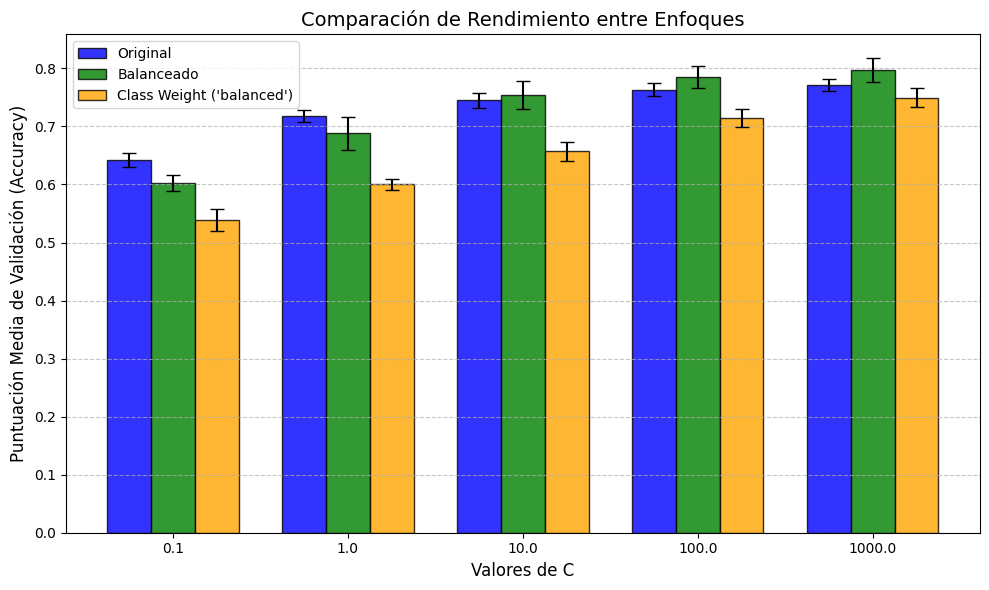

In [ ]:
# Creamos un DataFrame combinado para facilitar la comparación
combined_results = pd.DataFrame({
    'C': results_original['param_C'],
    'Original': results_original['mean_test_score'],
    'Original_std': results_original['std_test_score'],
    'Balanceado': results_balanced['mean_test_score'],
    'Balanceado_std': results_balanced['std_test_score'],
    "Class Weight ('balanced')": results_weighted['mean_test_score'],
    "Class Weight ('balanced')_std": results_weighted['std_test_score']
})

# Configuramos los índices para las barras
index = np.arange(len(combined_results['C']))  # Número de valores de C
bar_width = 0.25  # Ancho de las barras

# Configuramos el gráfico
plt.figure(figsize=(10, 6))

# Gráfica para los resultados del dataset original
plt.bar(index, combined_results['Original'], bar_width, yerr=combined_results['Original_std'], capsize=5,
        label='Original', color='blue', edgecolor='black', alpha=0.8)

# Gráfica para los resultados del dataset balanceado
plt.bar(index + bar_width, combined_results['Balanceado'], bar_width, yerr=combined_results['Balanceado_std'], capsize=5,
        label='Balanceado', color='green', edgecolor='black', alpha=0.8)

# Gráfica para los resultados del dataset original con class_weight='balanced'
plt.bar(index + 2 * bar_width, combined_results["Class Weight ('balanced')"], bar_width,
        yerr=combined_results["Class Weight ('balanced')_std"], capsize=5,
        label="Class Weight ('balanced')", color='orange', edgecolor='black', alpha=0.8)

# Configuramos las etiquetas y título del gráfico
plt.xlabel('Valores de C', fontsize=12)
plt.ylabel('Puntuación Media de Validación (Accuracy)', fontsize=12)
plt.title('Comparación de Rendimiento entre Enfoques', fontsize=14)
plt.xticks(index + bar_width, combined_results['C'], fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustamos los márgenes del gráfico
plt.tight_layout()

# Mostramos el gráfico
plt.show()

El objetivo del código es realizar una comparación visual del rendimiento del modelo SVM bajo los tres enfoques evaluados: el *dataset* original, el *dataset* balanceado y el *dataset* original utilizando el hiperparámetro `class_weight='balanced'`. Para ello, se genera un gráfico de barras agrupadas que representa los valores de *mean test score* obtenidos para cada enfoque con diferentes valores del hiperparámetro `C`.

El gráfico se construye a partir de un *DataFrame* combinado, donde se agrupan los resultados de cada enfoque en función de los valores del hiperparámetro `C`. Este *DataFrame* incluye las métricas de *mean test score* y *std test score* obtenidas previamente, lo que permite agregar barras de error al gráfico y así reflejar la variabilidad de las métricas calculadas. Las barras están agrupadas y organizadas de manera que cada conjunto representa un valor de `C`, con cada barra identificando un enfoque particular.

El diseño del gráfico facilita la comparación entre los enfoques. Cada barra tiene un color distinto y etiquetas claras, lo que permite identificar fácilmente los resultados de cada enfoque. Se añaden etiquetas en los ejes para describir los valores representados y un título general que indica el propósito del gráfico. Además, las barras de error agregadas reflejan la variabilidad de las métricas, proporcionando información adicional sobre la consistencia de los resultados en los distintos pliegues de validación cruzada.

A partir del gráfico y de los datos analizados, se observa que el *dataset* original muestra un rendimiento creciente con valores mayores de `C`, alcanzando su mejor precisión en `C=1000`. Aunque el desempeño es consistente, no logra igualar los resultados del enfoque balanceado. Por otro lado, el *dataset* balanceado presenta los mejores resultados globales, especialmente en valores altos de `C`, lo que demuestra las ventajas de balancear los datos previamente. Finalmente, el enfoque que utiliza `class_weight='balanced'` permite manejar el desbalanceo de manera automática, pero su rendimiento es inferior al de los otros enfoques, especialmente en valores bajos de `C`.

El análisis permite concluir que el balanceo previo de los datos contribuye significativamente a mejorar el rendimiento del modelo en este problema específico, superando tanto al enfoque original como al ajuste automático del balanceo mediante `class_weight`. Aunque el *dataset* original ofrece resultados consistentes, no alcanza los niveles de precisión logrados al trabajar con datos balanceados de manera explícita.

###### 2.1.6.7 - Entrenamiento de los modelos

In [ ]:
# Instanciamos los modelos base
svc = SVC(kernel='rbf', gamma='scale')  # Modelo estándar
svc_weighted = SVC(class_weight='balanced', kernel='rbf', gamma='scale')  # Modelo con balanceo automático de clases

El código tiene como objetivo instanciar los modelos base de SVM, configurados con parámetros genéricos para permitir la exploración de diferentes valores del hiperparámetro `C`. El modelo estándar, denominado `svc`, se inicializa con un núcleo radial especificado por `kernel='rbf'` y un valor de `gamma='scale'`, que ajusta automáticamente este hiperparámetro en función del número de características del *dataset*.

Adicionalmente, se define el modelo `svc_weighted`, que incluye el parámetro `class_weight='balanced'`. Este ajuste permite al modelo compensar automáticamente el desbalance de clases asignando pesos inversamente proporcionales a la frecuencia de cada clase en el *dataset*. Ambos modelos están configurados de manera flexible para entrenarse posteriormente con diferentes valores del hiperparámetro `C`, lo que permite evaluar su rendimiento en distintos escenarios.

In [ ]:
# Función para entrenar modelos para diferentes valores de C
def train_svm_for_C_values(X_train, y_train, C_values, weighted=False):
  models = {}  # Diccionario para almacenar los modelos entrenados
  for C in C_values:
    # Configuramos el modelo según el valor de C actual
    if weighted:
      model = SVC(class_weight='balanced', C=C, kernel='rbf', gamma='scale')
    else:
      model = SVC(C=C, kernel='rbf', gamma='scale')

    # Entrenamos el modelo
    model.fit(X_train, y_train)

    # Almacenamos el modelo entrenado en el diccionario
    models[C] = model
  return models

El código define la función `train_svm_for_C_values`, diseñada para entrenar múltiples modelos SVM con diferentes valores del hiperparámetro `C`. Primero, se instancian los modelos base, `svc` y `svc_weighted`. Ambos modelos comparten configuraciones comunes como el núcleo radial especificado por `kernel='rbf'` y un ajuste automático del hiperparámetro `gamma='scale'`. En el caso de `svc_weighted`, se incluye el parámetro adicional `class_weight='balanced'`, que ajusta los pesos de las clases en función de su frecuencia, compensando posibles desbalances.

Dentro de la función, se crea un diccionario vacío llamado `models` para almacenar los modelos entrenados con cada valor de `C`. A continuación, se recorre la lista de valores de `C` proporcionada como entrada, y en cada iteración se instancia un nuevo modelo SVM. Si el parámetro `weighted` es `True`, el modelo se configura con balanceo automático de clases; de lo contrario, se utiliza el modelo estándar. Cada modelo se entrena utilizando el método `fit()` con los datos de entrada y las etiquetas de clase proporcionadas (`X_train` y `y_train`).

Finalmente, el modelo entrenado para cada valor de `C` se almacena en el diccionario `models`, utilizando el valor de `C` como clave. La función devuelve este diccionario, permitiendo acceder fácilmente a los modelos entrenados para diferentes configuraciones de `C`. Este enfoque asegura una implementación modular y flexible, adecuada para explorar el impacto de `C` en el rendimiento del modelo.

In [ ]:
# Entrenamos para el dataset original
models_original = train_svm_for_C_values(X_train_original, y_train_original, C_values)

# Entrenamos para el dataset balanceado
models_balanced = train_svm_for_C_values(X_train_balanced, y_train_balanced, C_values)

# Entrenamos para el dataset original con balanceo automático
models_weighted = train_svm_for_C_values(X_train_original, y_train_original, C_values, weighted=True)

El código utiliza la función `train_svm_for_C_values` para entrenar modelos SVM bajo tres enfoques diferentes, cada uno aplicando una estrategia distinta de manejo de los datos y del balanceo de clases.

En el primer caso, se entrena el conjunto de modelos `models_original` utilizando el *dataset* original (`X_train_original` y `y_train_original`) y sin realizar ajustes en el balance de clases. Este enfoque permite evaluar el rendimiento del modelo cuando no se corrige el desbalance inherente en los datos.

En el segundo caso, se entrenan los modelos `models_balanced`, utilizando el *dataset* previamente balanceado (`X_train_balanced` y `y_train_balanced`). Este conjunto de datos asegura que las clases estén uniformemente representadas, lo que podría mejorar el rendimiento del modelo en las clases minoritarias.

En el tercer caso, los modelos `models_weighted` se entrenan utilizando el modelo configurado con `class_weight='balanced'` y el *dataset* original (`X_train_original` y `y_train_original`). Este ajuste compensa automáticamente el desbalance de clases asignando un peso proporcional a la frecuencia de cada clase durante el entrenamiento, sin necesidad de alterar el conjunto de datos.

Cada conjunto de modelos contiene configuraciones optimizadas para distintos valores de `C`, permitiendo comparar el impacto del hiperparámetro y las estrategias de manejo de clases en el rendimiento del modelo. Este enfoque asegura que todas las alternativas sean evaluadas de manera sistemática y bajo condiciones consistentes.

##### 2.1.7 - Después de hacer el entrenamiento, visualiza las matrices de confusión de los modelos entrenados.

Antes de generar las matrices de confusión para evaluar el rendimiento de los modelos, es necesario realizar predicciones tanto sobre los datos de entrenamiento como sobre los datos de prueba. Estas predicciones permitirán comparar las clases predichas por los modelos con las clases reales presentes en ambos conjuntos de datos. Esto es esencial para entender cómo se comportan los modelos en términos de clasificación correcta y errores, proporcionando una base sólida para evaluar su precisión y utilidad en diferentes etapas del proceso de modelado.

Al analizar las matrices de confusión de los datos de entrenamiento, podemos identificar cómo los modelos se ajustan a los datos con los que fueron entrenados. Por otro lado, las matrices de confusión de los datos de prueba nos permiten evaluar la capacidad de generalización de los modelos a datos no vistos previamente. Esto nos permitirá realizar un análisis adicional al comparar los resultados de entrenamiento y prueba para ver si el modelo sobreajusta o está bien ajustado.

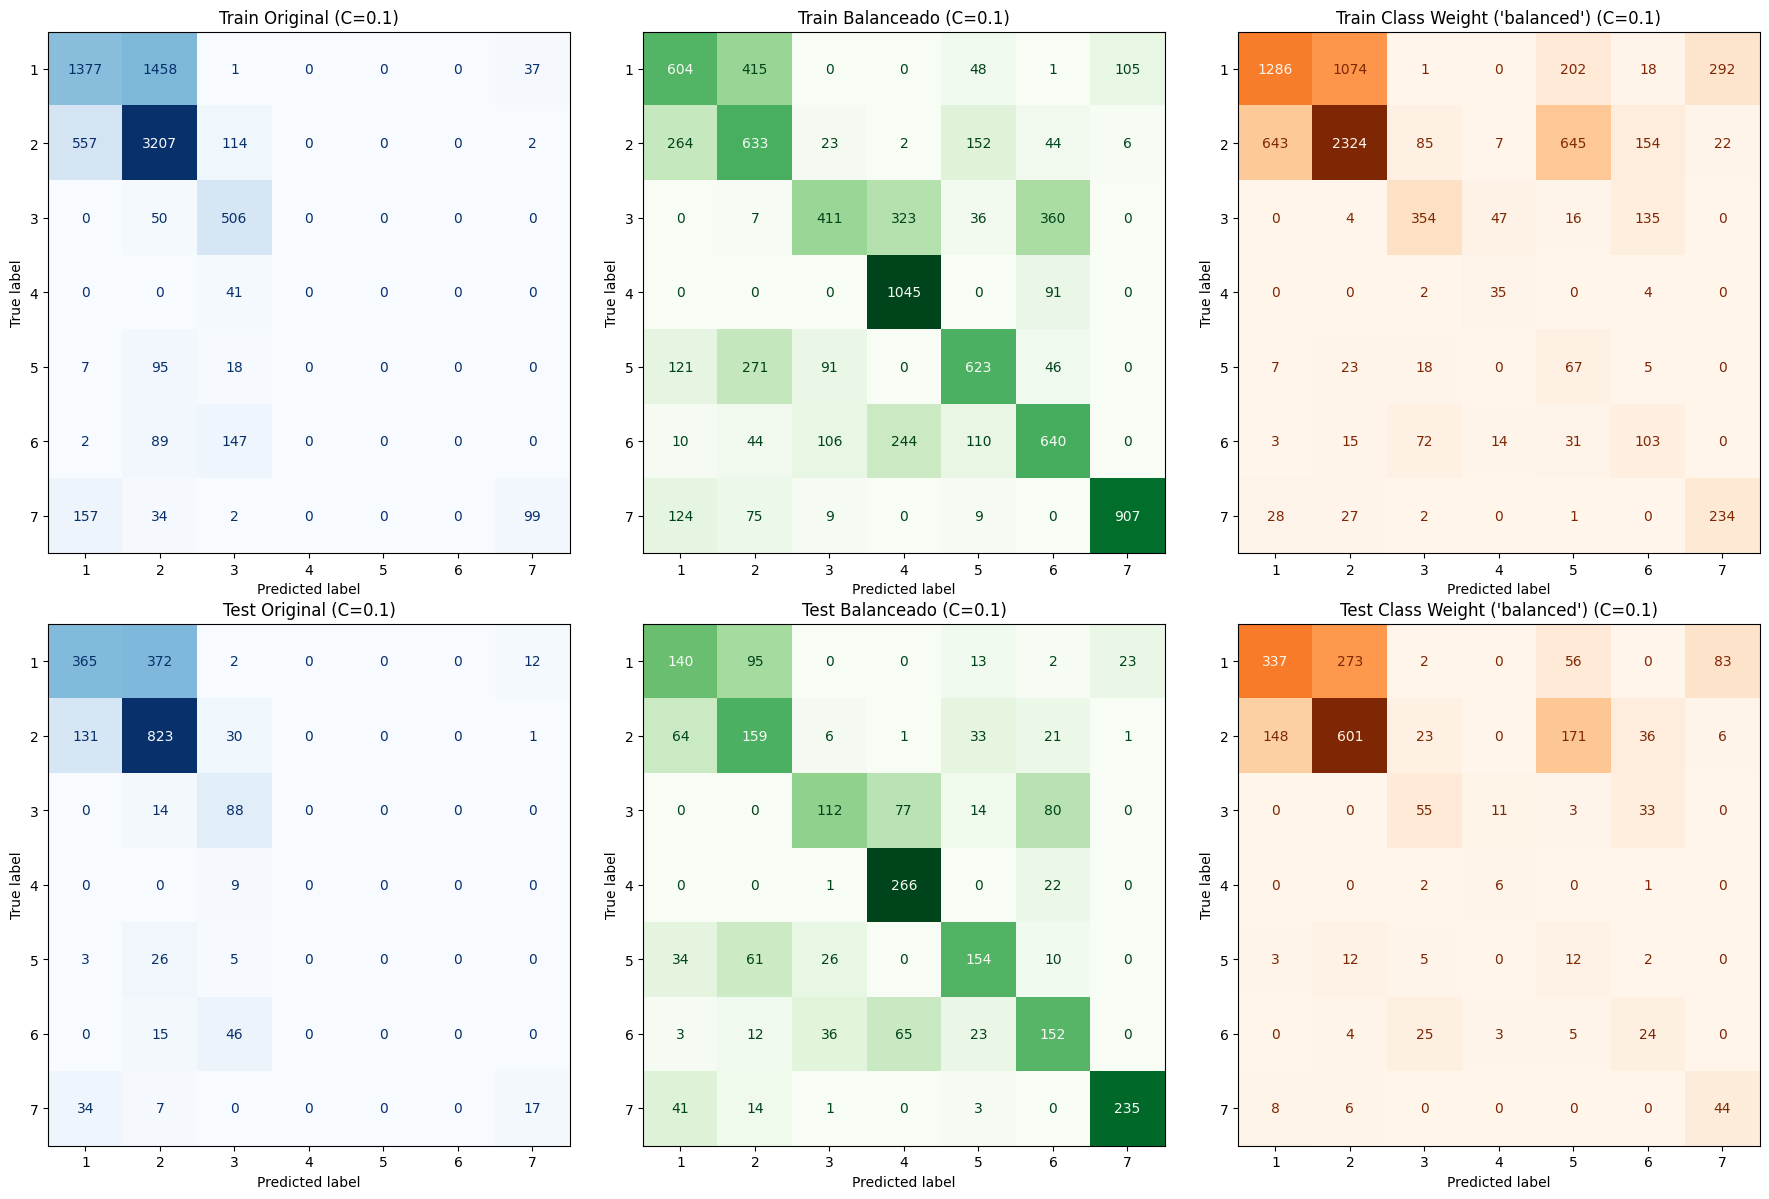

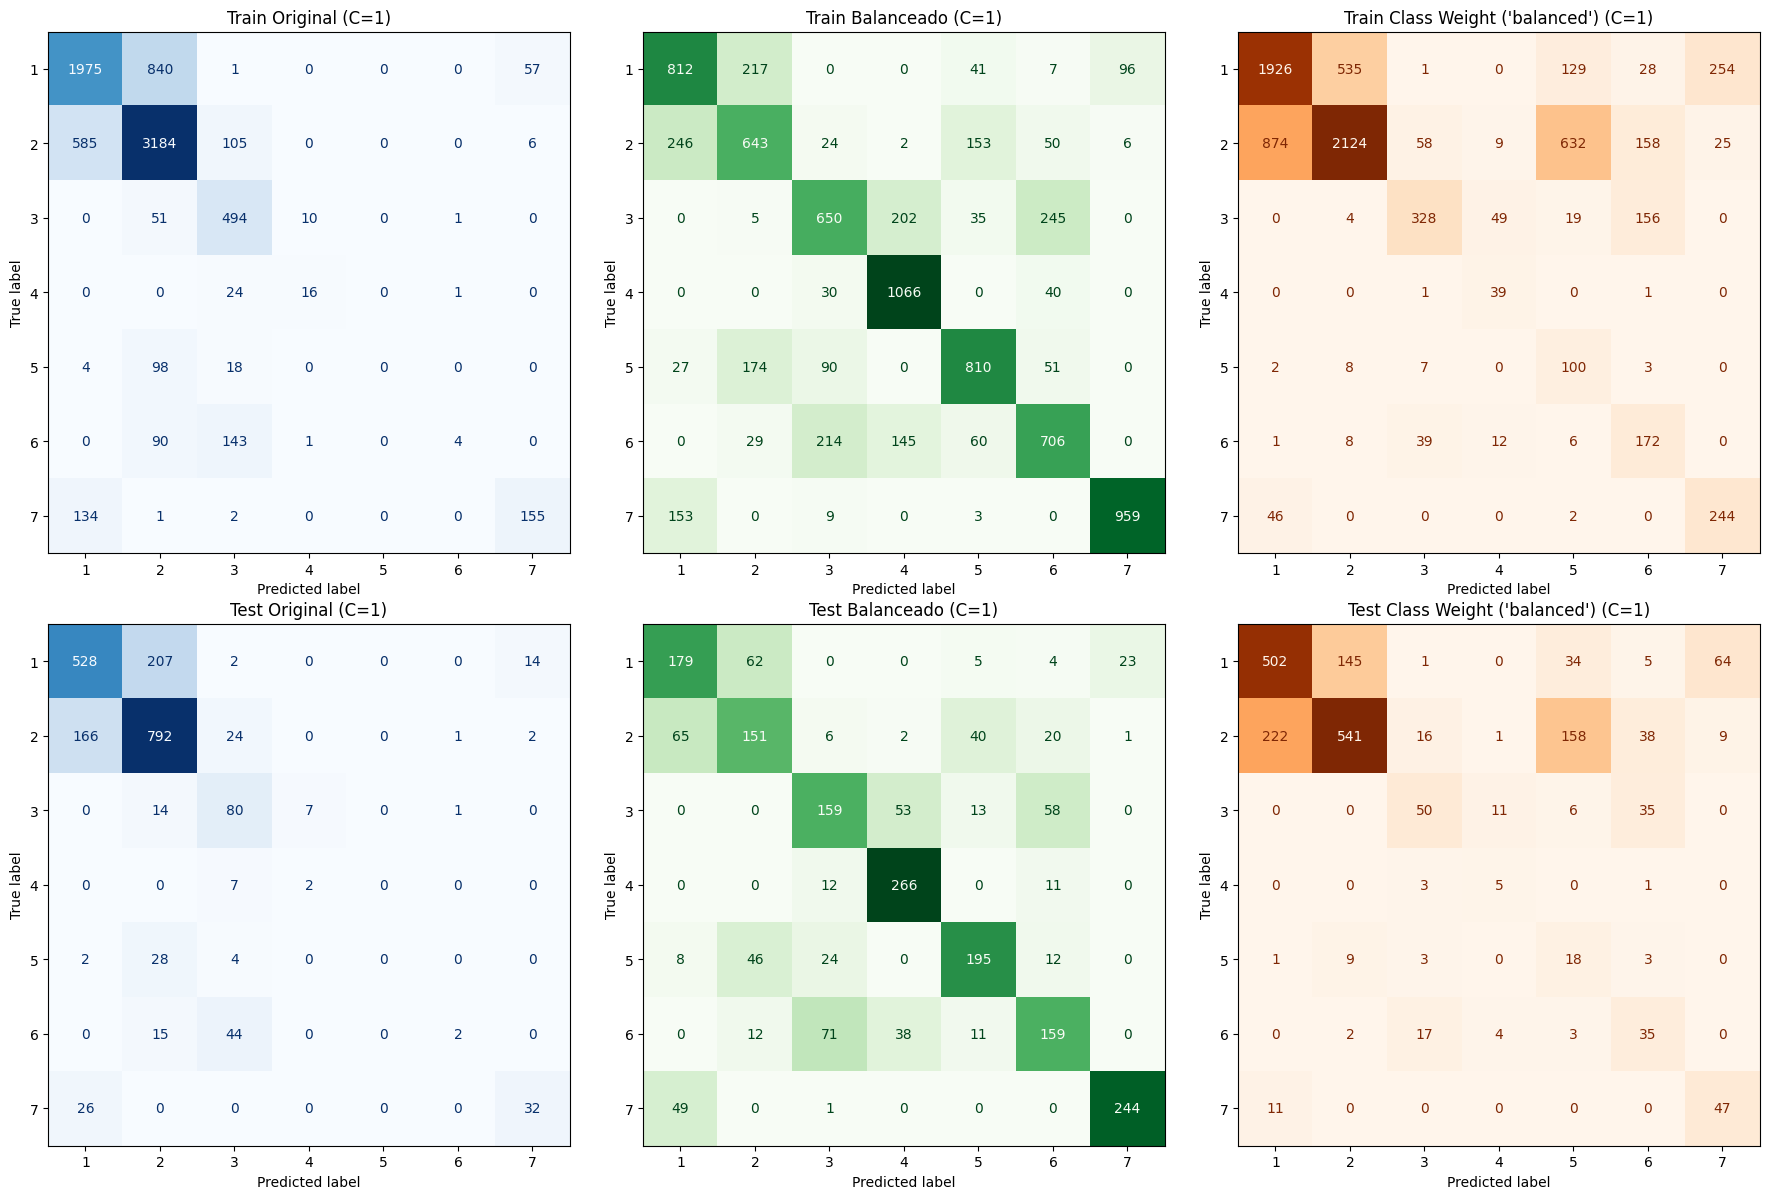

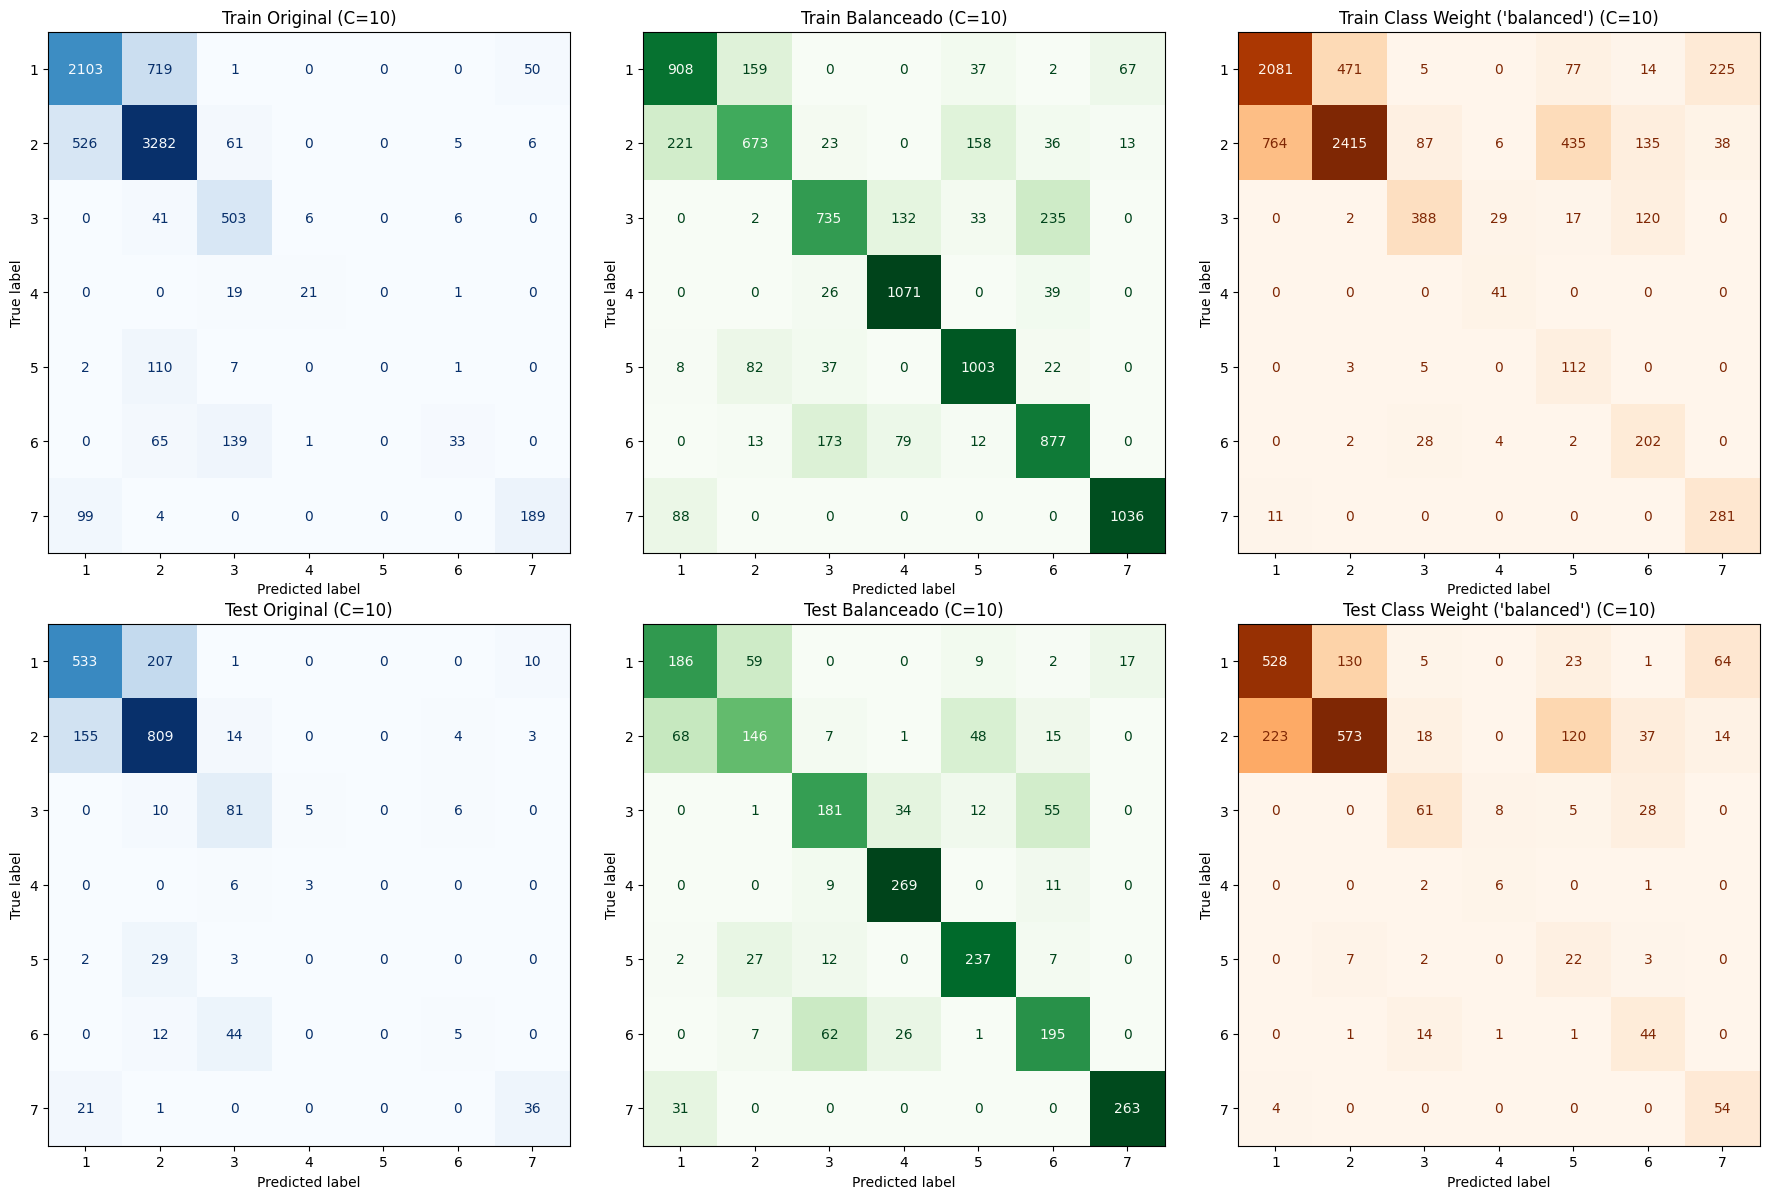

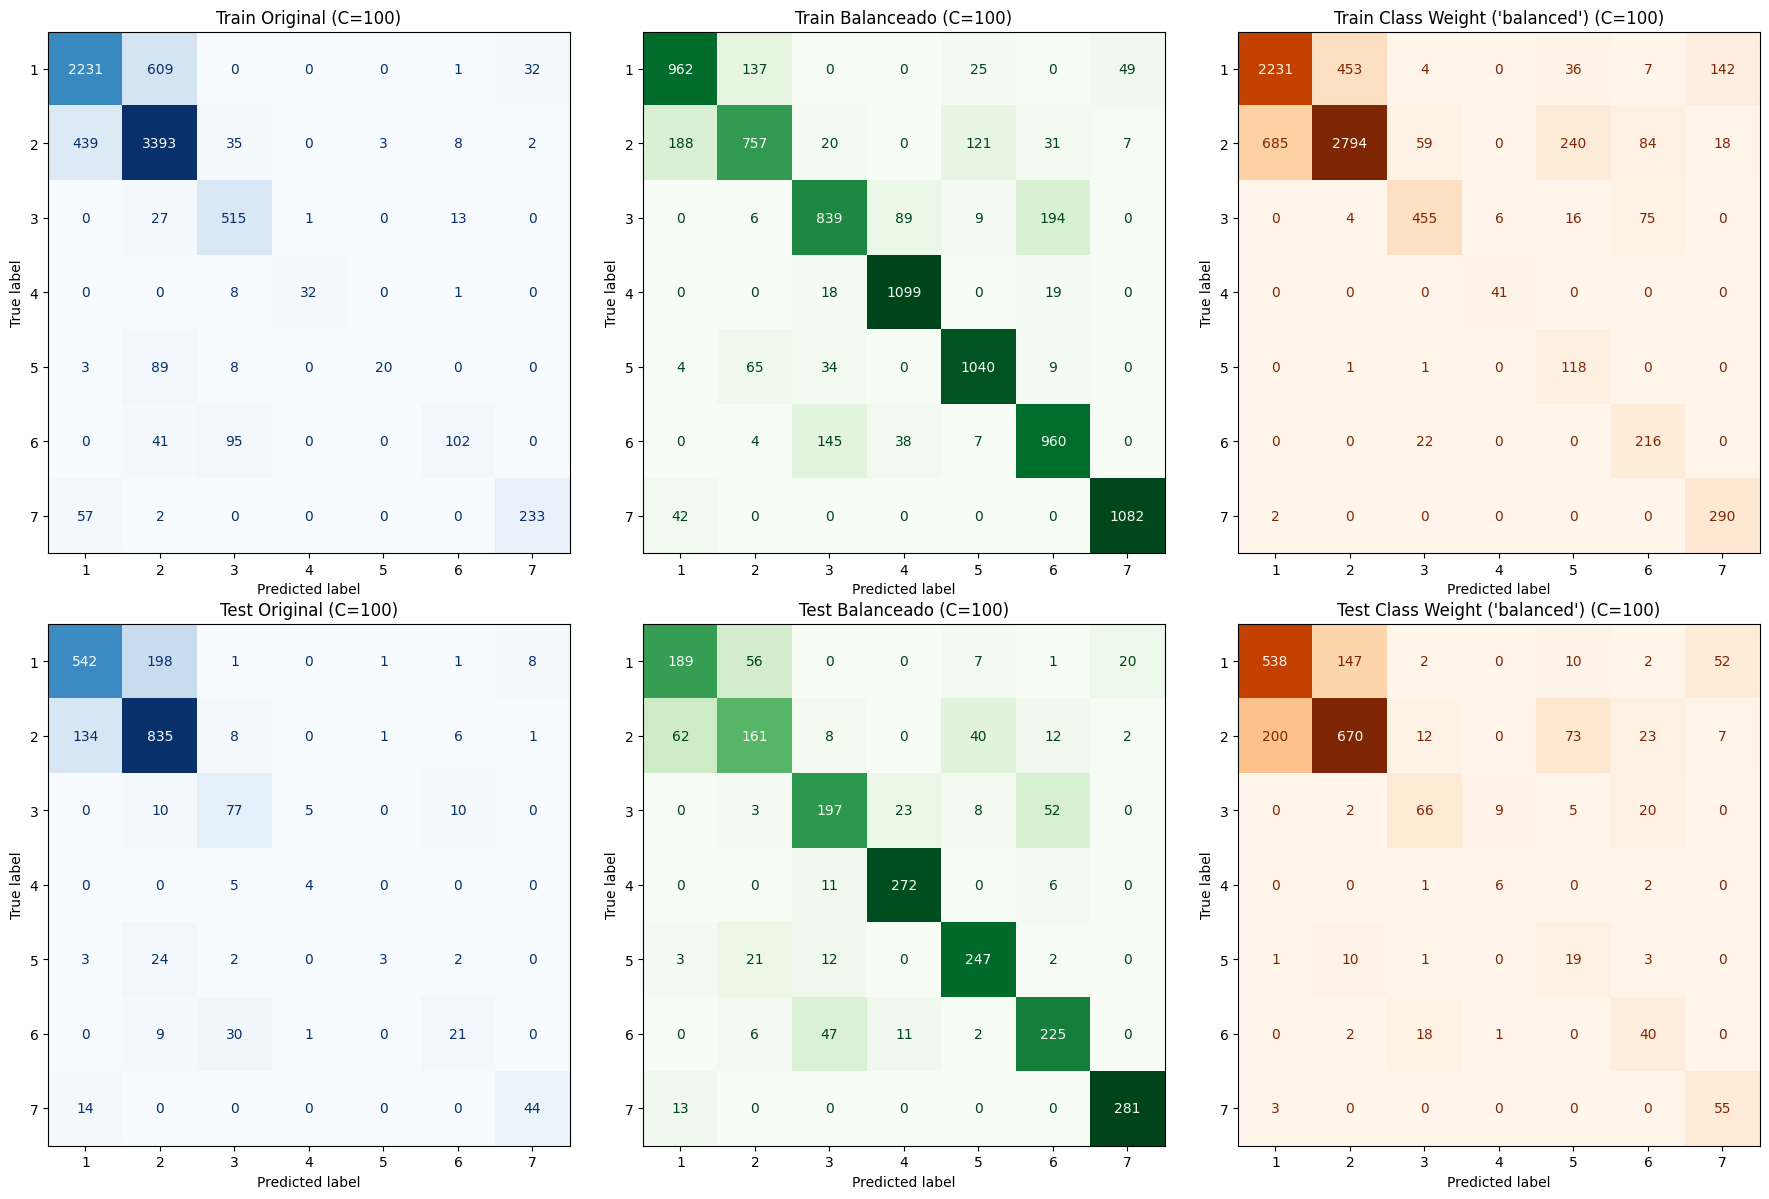

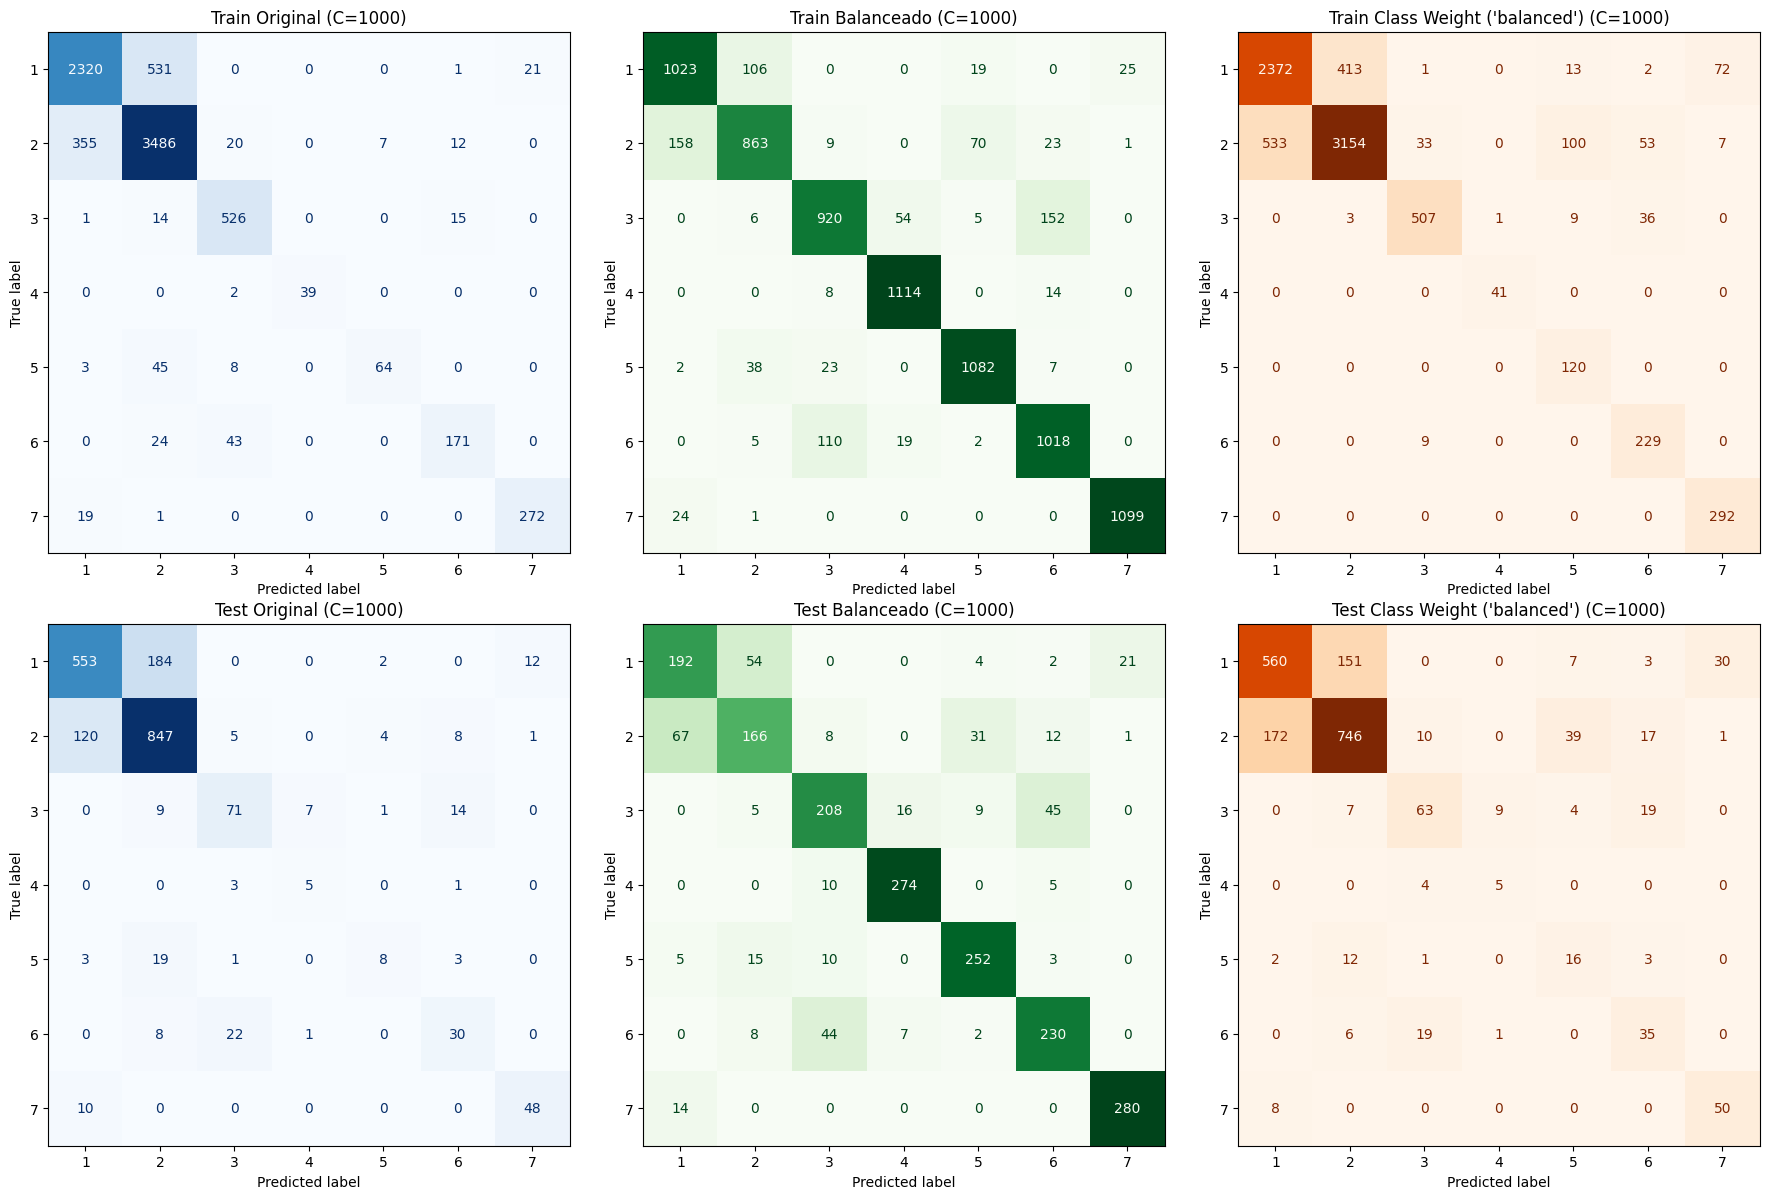

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Iteramos sobre los valores de C y generamos las matrices de confusión
for C in C_values:
  # Predicciones para los modelos con los datos de entrenamiento
  x_pred_original = models_original[C].predict(X_train_original)
  x_pred_balanced = models_balanced[C].predict(X_train_balanced)
  x_pred_weighted = models_weighted[C].predict(X_train_original)

  # Predicciones para los modelos con los datos de test
  y_pred_original = models_original[C].predict(X_test_original)
  y_pred_balanced = models_balanced[C].predict(X_test_balanced)
  y_pred_weighted = models_weighted[C].predict(X_test_original)

  # Generamos las matrices de confusión de los datos de entrenamiento
  cm_train_original = confusion_matrix(y_train_original, x_pred_original)
  cm_train_balanced = confusion_matrix(y_train_balanced, x_pred_balanced)
  cm_train_weighted = confusion_matrix(y_train_original, x_pred_weighted)

  # Generamos las matrices de confusión de los datos de test
  cm_test_original = confusion_matrix(y_test_original, y_pred_original)
  cm_test_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)
  cm_test_weighted = confusion_matrix(y_test_original, y_pred_weighted)

  # Configuramos el gráfico para las seis matrices
  fig, axes = plt.subplots(2, 3, figsize=(18, 12))

  # Matriz de confusión para el modelo original de entrenamiento
  ConfusionMatrixDisplay(cm_train_original, display_labels=np.unique(y_train_original)).plot(ax=axes[0, 0], cmap='Blues', colorbar=False)
  axes[0, 0].set_title(f"Train Original (C={C})")

  # Matriz de confusión para el modelo balanceado de entrenamiento
  ConfusionMatrixDisplay(cm_train_balanced, display_labels=np.unique(y_train_balanced)).plot(ax=axes[0, 1], cmap='Greens', colorbar=False)
  axes[0, 1].set_title(f"Train Balanceado (C={C})")

  # Matriz de confusión para el modelo con balanceo automático de entrenamiento
  ConfusionMatrixDisplay(cm_train_weighted, display_labels=np.unique(y_train_original)).plot(ax=axes[0, 2], cmap='Oranges', colorbar=False)
  axes[0, 2].set_title(f"Train Class Weight ('balanced') (C={C})")

  # Matriz de confusión para el modelo original de test
  ConfusionMatrixDisplay(cm_test_original, display_labels=np.unique(y_test_original)).plot(ax=axes[1, 0], cmap='Blues', colorbar=False)
  axes[1, 0].set_title(f"Test Original (C={C})")

  # Matriz de confusión para el modelo balanceado de test
  ConfusionMatrixDisplay(cm_test_balanced, display_labels=np.unique(y_test_balanced)).plot(ax=axes[1, 1], cmap='Greens', colorbar=False)
  axes[1, 1].set_title(f"Test Balanceado (C={C})")

  # Matriz de confusión para el modelo con balanceo automático de test
  ConfusionMatrixDisplay(cm_test_weighted, display_labels=np.unique(y_test_original)).plot(ax=axes[1, 2], cmap='Oranges', colorbar=False)
  axes[1, 2].set_title(f"Test Class Weight ('balanced') (C={C})")

  # Ajustamos márgenes y mostramos el gráfico
  plt.tight_layout()
  plt.show()

El objetivo del código es generar y visualizar las matrices de confusión para cada uno de los modelos entrenados (*Original*, *Balanceado* y *Class Weight ('balanced')*), evaluándolos tanto en el conjunto de entrenamiento como en el de prueba para todos los valores del hiperparámetro `C` incluidos en `C_values`.

El proceso comienza calculando las predicciones para cada modelo utilizando el método `.predict()` sobre los conjuntos de datos correspondientes. Para el modelo original, se realizan predicciones con los datos sin preprocesar tanto de entrenamiento (`X_train_original`) como de prueba (`X_test_original`). En el caso del modelo balanceado, se usan los conjuntos preprocesados para reflejar una distribución uniforme de clases (`X_train_balanced` y `X_test_balanced`). Finalmente, para el modelo con balanceo automático (*class_weight='balanced'*), se utiliza el conjunto de datos original tanto en entrenamiento como en prueba, ajustando los pesos de las clases automáticamente durante la predicción.

Con estas predicciones, se generan matrices de confusión mediante la función `confusion_matrix` de *sklearn*, que compara las etiquetas reales con las predicciones generadas para cada modelo. Estas matrices se generan de manera independiente para los conjuntos de entrenamiento y prueba, lo que permite evaluar tanto cómo el modelo ajustó los datos de entrenamiento como su capacidad de generalización en los datos de prueba.

Cada iteración produce una figura con seis gráficos:
1. **Primera fila**: Muestra las matrices de confusión para los datos de entrenamiento.
2. **Segunda fila**: Representa las matrices de confusión para los datos de prueba.
3. **Columnas**: Corresponden a los tres enfoques de modelado:
   - *Modelo Original*: Matriz de confusión con los datos originales.
   - *Modelo Balanceado*: Matriz de confusión con los datos preprocesados para balancear las clases.
   - *Modelo Class Weight ('balanced')*: Matriz de confusión con balanceo automático de pesos.

Finalmente, las figuras se ajustan automáticamente utilizando `plt.tight_layout()` para evitar superposiciones, y se muestran mediante `plt.show()`.

Las matrices de confusión generadas permiten observar diferencias claras en el desempeño de los tres enfoques de modelado. En el caso del modelo original, los resultados muestran una tendencia a favorecer las clases mayoritarias, como se evidencia en los valores elevados de la diagonal principal para estas clases, mientras que las clases minoritarias presentan una mayor dispersión de errores. Este comportamiento refleja las limitaciones del modelo para manejar conjuntos de datos desbalanceados y su incapacidad para generalizar correctamente en las clases menos representadas.

Por otro lado, el modelo balanceado logra una mejora notable en la clasificación de las clases minoritarias. Las matrices de confusión correspondientes muestran un incremento significativo de los valores en la diagonal principal para estas clases tanto en el conjunto de entrenamiento como en el de prueba. Este resultado confirma que el balanceo previo de los datos permite al modelo aprender de manera más equitativa, reduciendo el impacto del desbalance original. En términos de generalización, el modelo no muestra indicios significativos de sobreajuste, ya que el comportamiento observado en los conjuntos de prueba es consistente con el desempeño en los datos de entrenamiento.

El modelo con balanceo automático de pesos (*class_weight='balanced'*) también mejora la clasificación de las clases menos representadas en comparación con el modelo original. Sin embargo, su capacidad de generalización es menos consistente en comparación con el modelo balanceado. Aunque los valores en la diagonal principal aumentan para las clases minoritarias, aún se observan mayores errores fuera de la diagonal en el conjunto de prueba, lo que indica que este enfoque es menos eficaz para manejar el desbalance extremo de algunas clases.

##### 2.1.8 - ¿Cuántos ejemplos ha clasificado correctamente cada uno de los modelos?

In [ ]:
from sklearn.metrics import accuracy_score

# Creamos un diccionario para almacenar los resultados de accuracy
accuracy_results = {
  'C': C_values,  # Lista de valores de C utilizados en los modelos
  'Train Original': [],  # Exactitud para el modelo original en entrenamiento
  'Test Original': [],  # Exactitud para el modelo original en prueba
  'Train Balanceado': [],  # Exactitud para el modelo con datos balanceados en entrenamiento
  'Test Balanceado': [],  # Exactitud para el modelo con datos balanceados en prueba
  "Train Class Weight ('balanced')": [],  # Exactitud para el modelo con class_weight='balanced' en entrenamiento
  "Test Class Weight ('balanced')": []  # Exactitud para el modelo con class_weight='balanced' en prueba
}

# Iteramos por cada valor de C
for C in C_values:
  # Generamos las predicciones para cada modelo con los datos de entrenamiento
  x_pred_original = models_original[C].predict(X_train_original)
  x_pred_balanced = models_balanced[C].predict(X_train_balanced)
  x_pred_weighted = models_weighted[C].predict(X_train_original)

  # Generamos las predicciones para cada modelo con los datos de prueba
  y_pred_original = models_original[C].predict(X_test_original)
  y_pred_balanced = models_balanced[C].predict(X_test_balanced)
  y_pred_weighted = models_weighted[C].predict(X_test_original)

  # Calculamos el accuracy para cada modelo con los datos de entrenamiento
  accuracy_train_original = accuracy_score(y_train_original, x_pred_original)
  accuracy_train_balanced = accuracy_score(y_train_balanced, x_pred_balanced)
  accuracy_train_weighted = accuracy_score(y_train_original, x_pred_weighted)

  # Calculamos el accuracy para cada modelo con los datos de prueba
  accuracy_test_original = accuracy_score(y_test_original, y_pred_original)
  accuracy_test_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
  accuracy_test_weighted = accuracy_score(y_test_original, y_pred_weighted)

  # Almacenamos los accuracy calculadas en el diccionario
  accuracy_results['Train Original'].append(accuracy_train_original)
  accuracy_results['Train Balanceado'].append(accuracy_train_balanced)
  accuracy_results["Train Class Weight ('balanced')"].append(accuracy_train_weighted)
  accuracy_results['Test Original'].append(accuracy_test_original)
  accuracy_results['Test Balanceado'].append(accuracy_test_balanced)
  accuracy_results["Test Class Weight ('balanced')"].append(accuracy_test_weighted)

# Convertimos los resultados a un DataFrame para facilitar la visualización
accuracy_df = pd.DataFrame(accuracy_results)

# Mostramos los resultados en forma tabular
print("Accuracy para cada modelo y valor de C:")
display(accuracy_df)

Accuracy para cada modelo y valor de C:


,C,Train Original,Test Original,Train Balanceado,Test Balanceado,Train Class Weight ('balanced'),Test Class Weight ('balanced')
0,0.1,0.648625,0.6465,0.607875,0.6090,0.550375,0.5395
1,1.0,0.728500,0.7180,0.705750,0.6765,0.616625,0.5990
2,10.0,0.766375,0.7335,0.787875,0.7385,0.690000,0.6440
3,100.0,0.815750,0.7630,0.842375,0.7860,0.768125,0.6970
4,1000.0,0.859750,0.7810,0.889875,0.8010,0.839375,0.7375


El objetivo de este código es calcular y comparar la exactitud (*accuracy*) de tres modelos entrenados (*Original*, *Balanceado* y *Class Weight ('balanced')*) en función de diferentes valores del hiperparámetro `C`, evaluándolos tanto en el conjunto de entrenamiento como en el de prueba. Los resultados se almacenan en un diccionario estructurado y se presentan de manera tabular para facilitar el análisis.

El proceso comienza iterando sobre cada valor de `C` definido en `C_values`. Para cada valor, se generan predicciones utilizando el método `.predict()` de cada modelo. Estas predicciones se calculan tanto para el conjunto de entrenamiento (`X_train_*`) como para el conjunto de prueba (`X_test_*`), dependiendo del modelo y del preprocesamiento aplicado a los datos. El modelo original opera con los datos originales sin ajustes, mientras que el modelo balanceado utiliza los conjuntos de datos ajustados previamente para reflejar una distribución uniforme de clases. Por último, el modelo con *class_weight='balanced'* aplica ajustes automáticos de pesos directamente sobre los datos originales.

Con las predicciones generadas, se calcula la exactitud de cada modelo utilizando la función `accuracy_score` de *sklearn*, que mide el porcentaje de predicciones correctas comparado con las etiquetas reales. Estos cálculos se realizan para cada modelo y para ambos conjuntos de datos (entrenamiento y prueba). Los valores obtenidos se almacenan en un diccionario llamado `accuracy_results`, organizado en columnas correspondientes a cada modelo y tipo de conjunto.

Finalmente, el diccionario se convierte en un *DataFrame* utilizando `pandas` para presentar los resultados de manera tabular. Esto facilita el análisis y comparación de los valores de exactitud para cada modelo y valor de `C`.

Los resultados reflejan diferencias claras en el desempeño de los tres modelos evaluados. En el caso del modelo original, la exactitud en el conjunto de entrenamiento aumenta progresivamente con valores más altos de `C`, alcanzando un 85.98% para `C = 1000`. Sin embargo, el modelo muestra una brecha considerable en su capacidad de generalización, con una exactitud en el conjunto de prueba de solo 78.1% para el mismo valor de `C`. Esto sugiere que el modelo original está experimentando un leve sobreajuste a medida que `C` aumenta, ajustándose demasiado a los datos de entrenamiento.

El modelo balanceado, en cambio, muestra un desempeño más consistente entre los conjuntos de entrenamiento y prueba. Aunque su exactitud en el conjunto de entrenamiento es ligeramente inferior en valores bajos de `C`, a partir de `C = 10` supera al modelo original, logrando un equilibrio notable entre el entrenamiento (88.98% para `C = 1000`) y el conjunto de prueba (80.1% para `C = 1000`). Este comportamiento indica que el balanceo previo de los datos permite al modelo aprender de manera más equitativa y mejorar su capacidad de generalización, mitigando los problemas asociados al desbalance de clases.

El modelo con balanceo automático de pesos (*class_weight='balanced'*) muestra un desempeño intermedio entre los otros dos enfoques. Aunque su exactitud también mejora con valores crecientes de `C`, no alcanza los niveles de desempeño del modelo balanceado, especialmente en el conjunto de prueba, donde su exactitud máxima es de 73.75% para `C = 1000`. Esto sugiere que el ajuste automático de pesos durante el entrenamiento es menos efectivo que el preprocesamiento explícito de los datos para abordar el desbalance.

En general, los resultados confirman que el balanceo explícito del conjunto de datos ofrece el mejor desempeño en términos de exactitud y generalización. Aunque el modelo original logra buenos resultados en el conjunto de entrenamiento, su desempeño en el conjunto de prueba queda limitado debido a problemas de sobreajuste. Por otro lado, el modelo balanceado demuestra ser una solución más robusta y consistente, destacándose como la estrategia más adecuada para este problema de clasificación con clases desbalanceadas.

##### 2.1.9 - ¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precision para todas las clases? Si no hay ninguno que consideres que sea óptimo, explica cómo se comporta para cada clase el modelo que consideres que tiene mejores resultados.

Para responder a la pregunta de la forma más eficiente, se realizará un análisis comparativo utilizando dos enfoques principales. Por un lado, se evaluará la **precisión promedio** de los modelos para diferentes valores del hiperparámetro `C`, tanto en los conjuntos de entrenamiento como de prueba. Esto permite analizar cómo se comporta cada modelo de forma global en escenarios balanceados y desbalanceados. Por otro lado, se analizará la **precisión por clase** de los modelos más representativos (SVM original, balanceado y con *class_weight='balanced'*) utilizando el valor de `C` que mostró mejor desempeño en las evaluaciones previas. Este análisis desglosado permitirá identificar si alguno de los modelos se comporta de manera significativamente mejor o si, por el contrario, presenta deficiencias en clases específicas.

###### 2.1.9.1 - Precisión promedio para cada valor de C

In [ ]:
from sklearn.metrics import precision_score

# Creamos un diccionario para almacenar los resultados de precision
precision_results = {
  'C': C_values,  # Lista de valores de C utilizados en los modelos
  'Train Original': [],  # Precisión para el modelo original en entrenamiento
  'Test Original': [],  # Precisión para el modelo original en prueba
  'Train Balanceado': [],  # Precisión para el modelo con datos balanceados en entrenamiento
  'Test Balanceado': [],  # Precisión para el modelo con datos balanceados en prueba
  "Train Class Weight ('balanced')": [],  # Precisión para el modelo con class_weight='balanced' en entrenamiento
  "Test Class Weight ('balanced')": []  # Precisión para el modelo con class_weight='balanced' en prueba
}

# Iteramos sobre cada valor de C
for C in C_values:
  # Generamos predicciones para cada modelo con los datos de entrenamiento
  x_pred_original = models_original[C].predict(X_train_original)
  x_pred_balanced = models_balanced[C].predict(X_train_balanced)
  x_pred_weighted = models_weighted[C].predict(X_train_original)

  # Generamos predicciones para cada modelo con los datos de prueba
  y_pred_original = models_original[C].predict(X_test_original)
  y_pred_balanced = models_balanced[C].predict(X_test_balanced)
  y_pred_weighted = models_weighted[C].predict(X_test_original)

  # Calculamos la precisión promedio por clase para cada modelo con los datos de entrenamiento
  precision_train_original = precision_score(y_train_original, x_pred_original, average="macro", zero_division=0)
  precision_train_balanced = precision_score(y_train_balanced, x_pred_balanced, average="macro", zero_division=0)
  precision_train_weighted = precision_score(y_train_original, x_pred_weighted, average="macro", zero_division=0)

  # Calculamos la precisión promedio por clase para cada modelo con los datos de prueba
  precision_test_original = precision_score(y_test_original, y_pred_original, average="macro", zero_division=0)
  precision_test_balanced = precision_score(y_test_balanced, y_pred_balanced, average="macro", zero_division=0)
  precision_test_weighted = precision_score(y_test_original, y_pred_weighted, average="macro", zero_division=0)

  # Almacenamos las precisiones calculadas en el diccionario
  precision_results['Train Original'].append(precision_train_original)
  precision_results['Train Balanceado'].append(precision_train_balanced)
  precision_results["Train Class Weight ('balanced')"].append(precision_train_weighted)
  precision_results['Test Original'].append(precision_test_original)
  precision_results['Test Balanceado'].append(precision_test_balanced)
  precision_results["Test Class Weight ('balanced')"].append(precision_test_weighted)

# Creamos un DataFrame para facilitar la visualización de resultados
precision_df = pd.DataFrame(precision_results)

# Mostramos los resultados
print("Precisión promedio para cada valor de C:")
display(precision_df)

Precisión promedio por clase para cada valor de C:


,C,Train Original,Test Original,Train Balanceado,Test Balanceado,Train Class Weight ('balanced'),Test Class Weight ('balanced')
0,0.1,0.376227,0.342156,0.619284,0.615300,0.438473,0.395811
1,1.0,0.582387,0.481012,0.704535,0.675229,0.499088,0.432129
2,10.0,0.639390,0.499113,0.785705,0.733564,0.564550,0.489571
3,100.0,0.848527,0.648476,0.840561,0.779981,0.690685,0.524399
4,1000.0,0.896728,0.648081,0.889532,0.796088,0.799509,0.551557


El objetivo del código es calcular y comparar la precisión promedio por clase de tres modelos entrenados (*Original*, *Balanceado* y *Class Weight ('balanced')*) en función de diferentes valores del hiperparámetro `C`. La métrica utilizada, precisión promedio por clase (*macro average*), asigna igual peso a todas las clases, independientemente de su tamaño, y es adecuada para problemas con datos desbalanceados, ya que permite evaluar de manera justa el rendimiento global del modelo.

El código comienza inicializando un diccionario llamado `precision_results` que almacenará los valores de `C` junto con las precisiones promedio obtenidas por cada modelo en los conjuntos de entrenamiento y prueba. Para cada valor de `C`, se generan predicciones utilizando los modelos previamente entrenados, tanto para los datos de entrenamiento como para los de prueba. Las predicciones se calculan con el método `.predict()` y se comparan con las etiquetas reales para medir la precisión promedio por clase mediante la función `precision_score` de *scikit-learn*. El parámetro `average="macro"` asegura que se compute la precisión como el promedio simple de todas las clases, mientras que `zero_division=0` evita problemas en caso de que alguna clase no reciba predicciones, asignándole un valor de 0.0.

Los valores de precisión calculados se almacenan en el diccionario `precision_results`. Este diccionario se convierte posteriormente en un *DataFrame* para visualizar los resultados de manera tabular, permitiendo analizar cómo varía la precisión promedio por clase con los diferentes valores de `C` y modelos. Al finalizar, el *DataFrame* se muestra en pantalla, facilitando la comparación entre los enfoques evaluados.

El análisis de los resultados muestra diferencias significativas entre los tres enfoques evaluados. El modelo balanceado sobresale como la estrategia más efectiva, logrando precisiones promedio superiores en todos los valores de `C`. En el conjunto de prueba, su precisión promedio aumenta progresivamente a medida que incrementa el valor de `C`, alcanzando un máximo de **0.7961** para `C = 1000`. Este comportamiento destaca la eficacia del balanceo previo del conjunto de datos, que distribuye equitativamente las clases durante el entrenamiento, mejorando la capacidad del modelo para generalizar y manejar tanto clases mayoritarias como minoritarias.

El modelo con *class_weight='balanced'* presenta un desempeño intermedio. Su precisión promedio mejora también con valores crecientes de `C`, alcanzando un máximo de **0.5516** en el conjunto de prueba para `C = 1000`. Aunque este enfoque ajusta automáticamente los pesos de las clases durante el entrenamiento, su rendimiento es consistentemente inferior al del modelo balanceado. Esto indica que, aunque útil, la estrategia de balanceo automático no logra el mismo nivel de ajuste que el balanceo explícito de los datos.

El modelo original muestra el desempeño más limitado, especialmente en el conjunto de prueba. Aunque su precisión promedio mejora con el aumento de `C`, alcanzando un máximo de **0.6485** para `C = 100`, sigue estando por debajo del modelo balanceado. Además, su rendimiento en clases minoritarias es considerablemente más bajo, lo que evidencia su incapacidad para manejar adecuadamente el desbalance de clases presente en los datos.

En términos de consistencia, el modelo balanceado no solo logra las mejores precisiones promedio, sino que también mantiene un equilibrio razonable entre el desempeño en los conjuntos de entrenamiento y prueba, lo que sugiere que no presenta problemas significativos de sobreajuste. Por el contrario, el modelo original muestra señales de sobreajuste, especialmente para valores altos de `C`, donde su desempeño en el conjunto de entrenamiento supera notablemente al del conjunto de prueba.

En conclusión, el balanceo previo del conjunto de datos se confirma como la estrategia más efectiva para maximizar la precisión promedio por clase, logrando un rendimiento superior y más consistente en comparación con las otras estrategias evaluadas. Este enfoque permite al modelo manejar de manera equitativa tanto las clases mayoritarias como las minoritarias, convirtiéndose en la solución más robusta para este problema de clasificación con clases desbalanceadas.

###### 2.1.9.2 - Precisión por clase

In [ ]:
from sklearn.metrics import precision_score

# Diccionario con modelos y sus nombres
models = {
    "Modelo Original (SVM)": (models_original[C_values[-1]], X_test_original, y_test_original),
    "Modelo Balanceado (SVM)": (models_balanced[C_values[-1]], X_test_balanced, y_test_balanced),
    "Class Weight (SVM)": (models_weighted[C_values[-1]], X_test_original, y_test_original)
}

# Iteramos sobre los modelos
for model_name, (model, X_test, y_test) in models.items():
  # Generamos las predicciones
  y_pred_test = model.predict(X_test)

  # Calculamos la precisión por clase
  precision_per_class = precision_score(y_test, y_pred_test, average=None, zero_division=0)
  unique_classes = np.unique(y_test)

  # Mostramos la precisión por clase
  print(f"\nPrecisión por clase para el {model_name}:")
  for class_label, precision in zip(unique_classes, precision_per_class):
    print(f"Clase {class_label}: {precision:.4f}")


Precisión por clase para el Modelo Original (SVM):
Clase 1: 0.8061
Clase 2: 0.7938
Clase 3: 0.6961
Clase 4: 0.3846
Clase 5: 0.5333
Clase 6: 0.5357
Clase 7: 0.7869

Precisión por clase para el Modelo Balanceado (SVM):
Clase 1: 0.6906
Clase 2: 0.6694
Clase 3: 0.7429
Clase 4: 0.9226
Clase 5: 0.8456
Clase 6: 0.7744
Clase 7: 0.9272

Precisión por clase para el Class Weight (SVM):
Clase 1: 0.7547
Clase 2: 0.8091
Clase 3: 0.6495
Clase 4: 0.3333
Clase 5: 0.2424
Clase 6: 0.4545
Clase 7: 0.6173


El código tiene como propósito calcular y mostrar la precisión por clase de tres modelos de SVM: el modelo original, el modelo balanceado y el modelo con *class_weight='balanced'*. Para ello, utiliza el mejor valor del hiperparámetro `C`, determinado previamente como `C_values[-1]`. Los modelos se evalúan sobre sus respectivos conjuntos de prueba, permitiendo un análisis detallado del desempeño en cada clase.

En primer lugar, los modelos y sus datos correspondientes se organizan en un diccionario llamado `models`. Este diccionario asocia el nombre de cada modelo con su instancia entrenada, el conjunto de prueba y las etiquetas reales de las clases. Esta estructura facilita la iteración sistemática sobre los modelos evaluados.

Durante la iteración, el código genera las predicciones para cada modelo utilizando el método `.predict()` sobre el conjunto de prueba correspondiente. Posteriormente, se calcula la precisión por clase mediante la función `precision_score` con el parámetro `average=None`, lo que produce un array donde cada valor representa la precisión de una clase específica. Además, se utiliza el parámetro `zero_division=0` para garantizar que las clases sin predicciones tengan un valor de precisión definido como 0, evitando errores en el cálculo.

El código extrae las etiquetas únicas de las clases presentes en el conjunto de prueba mediante `np.unique(y_test)`, asegurando que las clases sean correctamente identificadas. Finalmente, para cada modelo, se imprimen las precisiones calculadas junto con los nombres de las clases, lo que permite analizar el desempeño específico de cada modelo en las distintas clases.

Este enfoque es particularmente útil en problemas multiclase, ya que ofrece una visión detallada del rendimiento por clase, permitiendo identificar fortalezas o debilidades específicas en la clasificación.

Los resultados obtenidos muestran diferencias significativas en la precisión por clase para cada uno de los modelos evaluados. El *Modelo Balanceado (SVM)* sobresale como el más consistente y efectivo, logrando una alta precisión en clases desafiantes como la Clase 4 (0.9226), la Clase 5 (0.8456) y la Clase 7 (0.9272). Estas métricas reflejan su capacidad para manejar clases minoritarias de manera equilibrada y eficiente.

El *Modelo Original (SVM)* presenta un desempeño razonable en clases mayoritarias como la Clase 1 (0.8061) y la Clase 2 (0.7938), pero tiene dificultades notables en las clases menos representadas, como la Clase 4 (0.3846) y la Clase 5 (0.5333). Esto evidencia su limitación para abordar problemas de desbalance sin un preprocesamiento adecuado.

Por su parte, el modelo con *class_weight='balanced'* ofrece un desempeño intermedio. Aunque mejora la precisión en algunas clases mayoritarias, como la Clase 2 (0.8091), tiene un comportamiento inconsistente en clases minoritarias, como la Clase 5 (0.2424) y la Clase 4 (0.3333). Esto indica que el ajuste interno de pesos no es suficiente para igualar la efectividad del balanceo explícito de los datos.

En conjunto, los resultados confirman que el *Modelo Balanceado (SVM)* es la opción más robusta, especialmente en escenarios donde las clases minoritarias tienen una relevancia particular.

##### 2.1.10 - Selecciona el modelo que consideras que obtiene mejores resultados y realiza las predicciones con el conjunto de datos de test.

Como se comenta en el apartado anterior, el modelo entrenado con el *dataset* balanceado ha demostrado obtener los mejores resultados en términos de precisión promedio por clase y *accuracy* general. Este modelo ha mostrado un desempeño sobresaliente en todos los valores de `C`, alcanzando su máxima precisión promedio con `C = 1000`, lo que confirma la efectividad del balanceo previo del *dataset* para mejorar su capacidad de clasificación, especialmente en clases menos representadas.

Por lo tanto, para este apartado se seleccionará el modelo balanceado entrenado con `C = 1000` para realizar las predicciones finales en el conjunto de datos de prueba balanceado. Este enfoque asegura que las predicciones reflejen el mejor desempeño alcanzado en los análisis previos, maximizando la representatividad y la equidad en la clasificación de todas las clases.

In [ ]:
from sklearn.metrics import classification_report

# Seleccionamos el modelo balanceado con C = 1000
best_model_balanced = models_balanced[1000]

# Generamos las predicciones con el conjunto de datos de prueba balanceado
y_pred_final = best_model_balanced.predict(X_test_balanced)

# Evaluamos el desempeño del modelo
classification_report_balanceado = classification_report(y_test_balanced, y_pred_final)

# Mostramos los resultados
print("Reporte de clasificación para el modelo balanceado con C = 1000:")
print(classification_report_balanceado)

Reporte de clasificación para el modelo balanceado con C = 1000:
              precision    recall  f1-score   support

           1       0.69      0.70      0.70       273
           2       0.67      0.58      0.62       285
           3       0.74      0.73      0.74       283
           4       0.92      0.95      0.94       289
           5       0.85      0.88      0.86       285
           6       0.77      0.79      0.78       291
           7       0.93      0.95      0.94       294

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000



El código tiene como objetivo evaluar el desempeño del modelo balanceado seleccionado con `C = 1000`, identificado previamente como el más efectivo en términos de precisión promedio por clase. Este modelo se utiliza para generar predicciones sobre el conjunto de prueba balanceado y almacenar un reporte detallado de las métricas clave de clasificación en la variable `classification_report_balanceado`.

Primero, se selecciona el modelo balanceado correspondiente al valor `C = 1000` desde el diccionario `models_balanced`. Este modelo ya ha sido entrenado previamente y corresponde a la configuración que mostró un mejor rendimiento en análisis anteriores.

Posteriormente, se generan las predicciones para el conjunto de prueba balanceado (`X_test_balanced`) utilizando el método `.predict()` del modelo seleccionado. Este método devuelve un vector que contiene las clases predichas para cada instancia en el conjunto de prueba, basándose en las características proporcionadas.

Para evaluar el rendimiento del modelo, se utiliza la función `classification_report` de `sklearn`. Este reporte, generado con las etiquetas reales (`y_test_balanced`) y las predicciones (`y_pred_final`), contiene métricas como precisión (*precision*), *recall* y F1-score para cada clase, así como promedios macro y ponderados. Los resultados del reporte se guardan en la variable `classification_report_balanceado`, lo que permite acceder y reutilizar esta información en análisis posteriores o incluirla en reportes formales.

Finalmente, se imprime el reporte de clasificación almacenado, proporcionando una visión integral del desempeño del modelo. Este enfoque no solo facilita la evaluación detallada del rendimiento del modelo balanceado con `C = 1000`, sino que también asegura que los resultados se conserven en una variable, permitiendo su reutilización sin necesidad de recalcularlos.

El reporte de clasificación refleja un rendimiento sólido del modelo balanceado con C = 1000 en el conjunto de prueba, logrando una precisión global del 80%. Este desempeño se traduce en un equilibrio entre las métricas de precisión, *recall* y F1-score en la mayoría de las clases, lo que demuestra que el balanceo previo del dataset permitió al modelo aprender de manera equitativa para todas las clases.

Las clases 4, 5, 6 y 7 presentan un desempeño destacado, con métricas superiores al promedio general. En particular, las clases 4 y 7 alcanzan una precisión y un *recall* muy altos (92%-95%), lo que indica que el modelo clasifica estas clases de forma consistente y con gran exactitud. Esto sugiere que las características asociadas a estas clases son lo suficientemente distintivas como para que el modelo pueda separarlas del resto de manera efectiva.

Por otro lado, aunque las clases 1, 2 y 3 tienen un desempeño ligeramente inferior, con métricas de precisión y *recall* en torno al 67%-74%, el modelo sigue mostrando una capacidad razonable para manejar estas categorías.

El promedio **macro** y **ponderado** de las métricas confirma la robustez del modelo, reflejando su capacidad para manejar tanto las clases mayoritarias como las minoritarias sin un sesgo evidente.

##### 2.1.11 - Visualiza la matriz de confusión de los datos de test.

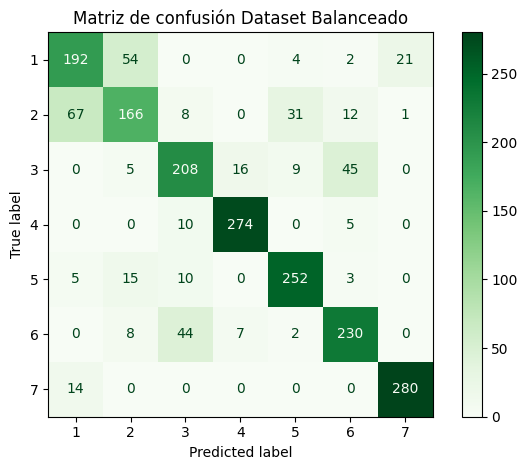

In [ ]:
# Calculamos la matriz de confusión para el modelo balanceado
cm_best_model_balanced = confusion_matrix(y_test_balanced, y_pred_final)

# Visualizamos la matriz de confusión
ConfusionMatrixDisplay(cm_best_model_balanced, display_labels=np.unique(y_test_balanced)).plot(cmap='Greens', colorbar=True)
plt.title('Matriz de confusión Dataset Balanceado', fontsize=12)

# Ajustamos los márgenes y mostramos el gráfico
plt.tight_layout()
plt.show()

El codigo utiliza la función `confusion_matrix` de `sklearn` para calcular la matriz de confusión. Esta función compara las etiquetas reales de los datos de prueba (`y_test_balanced`) con las predicciones realizadas por el modelo (`y_pred_final`). El resultado es una matriz cuadrada, donde cada fila representa una clase real y cada columna, una clase predicha.

A continuación, se visualiza la matriz utilizando la clase `ConfusionMatrixDisplay`, que genera un gráfico claro y visualmente atractivo de la matriz. El argumento `display_labels` asegura que las etiquetas de las clases aparezcan correctamente en los ejes del gráfico. El parámetro `cmap='Greens'` se utiliza para aplicar un esquema de colores que va de tonos claros a oscuros de verde, destacando las frecuencias más altas. Se incluye un `colorbar=True` para facilitar la interpretación de los valores representados en la matriz.

Finalmente, el título del gráfico se establece como "Matriz de confusión Dataset Balanceado" para contextualizar la visualización, y se ajustan los márgenes con `plt.tight_layout()` para evitar superposiciones. El método `plt.show()` muestra el gráfico generado.

##### 2.1.12 - ¿Cuántos ejemplos ha clasificado bien el modelo?

El número de ejemplos correctamente clasificados por un modelo puede calcularse de dos maneras principales. Una opción es sumar los valores de la diagonal principal de la matriz de confusión, ya que esta diagonal representa las predicciones correctas para cada clase. Sin embargo, el *accuracy* del modelo también proporciona esta información al expresar la proporción de ejemplos correctamente clasificados como un porcentaje del total. En este caso, se utiliza el *accuracy* para calcular el número total de ejemplos clasificados correctamente.

In [ ]:
# Calculamos el accuracy del modelo balanceado seleccionado
accuracy_best_model_balanced = accuracy_score(y_test_balanced, y_pred_final)

# Calculamos el número de ejemplos correctamente clasificados usando el accuracy y el tamaño del conjunto de prueba
n_correct_predictions = round(len(y_test_balanced) * accuracy_best_model_balanced)

# Mostramos los resultados
print(f'El modelo balanceado ha clasificado correctamente {n_correct_predictions} ejemplos de {len(y_test_balanced)}.')

El modelo balanceado ha clasificado correctamente 1602 ejemplos de 2000.


Este código calcula cuántos ejemplos del conjunto de prueba han sido clasificados correctamente por el modelo balanceado seleccionado. Para lograrlo, primero se calcula el *accuracy* del modelo utilizando la función `accuracy_score` de `sklearn`. Esta función compara las etiquetas reales (`y_test_balanced`) con las predicciones del modelo (`y_pred_final`) y devuelve el porcentaje de ejemplos correctamente clasificados.

A continuación, el valor del *accuracy* se utiliza en una regla de tres para calcular el número total de ejemplos correctamente clasificados. Este cálculo multiplica el tamaño del conjunto de prueba (`len(y_test_balanced)`) por el *accuracy* y redondea el resultado al entero más cercano utilizando `round()`, asegurando una mayor precisión en el cálculo.

Finalmente, el resultado se imprime en un mensaje que indica cuántos ejemplos han sido clasificados correctamente de acuerdo con el total de ejemplos en el conjunto de prueba.

Este método es especialmente útil como alternativa cuando se tiene una matriz de confusión muy grande, ya que calcular el número de ejemplos correctamente clasificados a partir del *accuracy* evita la necesidad de trabajar directamente con la matriz. Además, si el *accuracy* ya ha sido calculado como parte del análisis del modelo, este enfoque simplifica el proceso al prescindir del cálculo adicional de la suma de la diagonal principal, garantizando al mismo tiempo una representación precisa del número de clasificaciones correctas.

##### 2.1.13 - ¿Cuántos ejemplos ha clasificado de manera errónea?

Para responder a la pregunta, una forma lógica y directa es restar el número de ejemplos correctamente clasificados del total de ejemplos en el conjunto de prueba. Este método es sencillo, rápido y fácil de implementar, ya que se basa en una relación básica entre el total de ejemplos y los clasificados correctamente. Sin embargo, aunque este enfoque es práctico, no aprovecha herramientas más profesionales y estándares que ofrecen información adicional sobre el desempeño del modelo.

Entre los métodos más robustos se encuentran:

1. **El uso de la matriz de confusión**, que proporciona una visión detallada del desempeño del modelo, desglosando tanto las predicciones correctas como las incorrectas. Este método permite calcular directamente el número de errores sumando los valores fuera de la diagonal principal de la matriz. Su ventaja principal es que no solo da información sobre los errores totales, sino también sobre el tipo de errores (confusiones entre clases específicas), lo que puede ser crucial para entender mejor el comportamiento del modelo. Sin embargo, puede resultar menos eficiente en casos con un número muy alto de clases o si ya se dispone de métricas como el *accuracy*.
2. **El complemento del *accuracy***, definido como ($1 - \text{accuracy}$), que mide directamente el porcentaje de ejemplos clasificados incorrectamente. Este método es especialmente útil si el *accuracy* ya ha sido calculado como parte del análisis del modelo, ya que permite obtener rápidamente el número de errores simplemente escalando el porcentaje de errores al tamaño del conjunto de prueba. Su principal ventaja es su simplicidad y eficiencia, pero a diferencia de la matriz de confusión, no proporciona información sobre cómo se distribuyen los errores entre las diferentes clases.

###### 2.1.13.1 - Cálculo de predicciones incorrectas mediante la resta del total de ejemplos y los ejemplos correctamente clasificados

In [ ]:
# Calculamos el número de ejemplos clasificados de manera incorrecta
# restando los ejemplos correctamente clasificados (n_correct_predictions)
# del total de ejemplos en el conjunto de prueba (len(y_test_balanced))
n_incorrect_predictions = len(y_test_balanced) - n_correct_predictions

# Mostramos el resultado
print(f'El modelo balanceado ha clasificado incorrectamente {n_incorrect_predictions} ejemplos de {len(y_test_balanced)}.')

El modelo balanceado ha clasificado incorrectamente 398 ejemplos de 2000.


El cálculo comienza obteniendo el número total de ejemplos en el conjunto de prueba mediante `len(y_test_balanced)`. Posteriormente, se resta el número de predicciones correctas (`n_correct_predictions`), que ya ha sido calculado previamente. El resultado de esta resta, almacenado en la variable `n_incorrect_predictions`, corresponde al número total de ejemplos que el modelo balanceado clasificó erróneamente.

Finalmente, se imprime un mensaje informativo que comunica tanto el número de ejemplos clasificados incorrectamente como el total de ejemplos en el conjunto de prueba, lo que facilita la interpretación de los resultados.

###### 2.1.13.2 - Cálculo de predicciones incorrectas a partir de la matriz de confusión

In [ ]:
# Sumamos los valores de la matriz y restamos los valores de la diagonal principal para obtener los errores
n_incorrect_predictions = cm_best_model_balanced.sum() - cm_best_model_balanced.trace()

# Mostramos el resultado
print(f'El modelo balanceado ha clasificado incorrectamente {n_incorrect_predictions} ejemplos de {len(y_test_balanced)}.')

El modelo balanceado ha clasificado incorrectamente 398 ejemplos de 2000.


El cálculo comienza sumando todos los valores de la matriz (`cm_best_model_balanced.sum()`), lo que equivale al número total de ejemplos en el conjunto de prueba. Luego, se resta el valor de la diagonal principal (`cm_best_model_balanced.trace()`), que representa los ejemplos correctamente clasificados. El resultado, almacenado en la variable `n_incorrect_predictions`, corresponde al número total de ejemplos clasificados erróneamente.

Por último, se imprime un mensaje que comunica el número total de errores.

###### 2.1.13.3 - Cálculo de predicciones incorrectas mediante el complemento del *accuracy*

In [ ]:
# Calculamos el número de predicciones incorrectas
n_incorrect_predictions = round(len(y_test_balanced) * (1 - accuracy_best_model_balanced))

# Mostramos el resultado
print(f'El modelo balanceado ha clasificado incorrectamente {n_incorrect_predictions} ejemplos de {len(y_test_balanced)}.')

El modelo balanceado ha clasificado incorrectamente 398 ejemplos de 2000.


El cálculo comienza multiplicando el complemento del *accuracy* (`1 - accuracy_best_model_balanced`) por el tamaño del conjunto de prueba (`len(y_test_balanced)`). Este producto proporciona directamente el número total de predicciones incorrectas, que se almacena en la variable `n_incorrect_predictions`. Para garantizar una mayor precisión, el resultado se redondea al entero más cercano utilizando `round()`.

Finalmente, se imprime un mensaje informativo con el número total de ejemplos clasificados incorrectamente, asegurando que el valor mostrado sea consistente con los datos reales.

##### 2.1.14 - Visualiza los valores de precision, recall, f1 para cada una de las clases. ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

En el apartado 2.2.10 ya se calculó el reporte de clasificación del modelo balanceado con `C = 1000`, que incluye las métricas de **precisión**, **recall** y **f1-score** para cada clase.

Para responder a esta pregunta, se reutilizará el reporte generado anteriormente.

In [ ]:
# Mostramos los resultados del reporte de clasificación
print("Reporte de clasificación para el modelo balanceado con C = 1000:")
print(classification_report_balanceado)

Reporte de clasificación para el modelo balanceado con C = 1000:
              precision    recall  f1-score   support

           1       0.69      0.70      0.70       273
           2       0.67      0.58      0.62       285
           3       0.74      0.73      0.74       283
           4       0.92      0.95      0.94       289
           5       0.85      0.88      0.86       285
           6       0.77      0.79      0.78       291
           7       0.93      0.95      0.94       294

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000



El código reutiliza la variable `classification_report_balanceado`, calculada previamente en la pregunta 2.1.10, lo que permite analizar nuevamente el desempeño del modelo en cada clase sin necesidad de repetir cálculos. Esta práctica optimiza el flujo de trabajo al evitar procesos redundantes y facilita un análisis más ágil de las métricas clave.

Como se explicó anteriormente, el modelo balanceado con `C = 1000` mostró un rendimiento destacado en términos de precisión, *recall* y F1-score, logrando un equilibrio notable entre las diferentes clases. Las clases 4, 5, 6 y 7 sobresalen con métricas superiores al promedio general, reflejando la capacidad del modelo para identificar estas clases de manera consistente y precisa. Por otro lado, aunque las clases 1, 2 y 3 presentaron métricas ligeramente inferiores, su desempeño sigue siendo adecuado y razonable dentro del contexto del conjunto de datos.

Este análisis confirma que el modelo no clasifica todas las clases de manera uniforme, mostrando un mayor desempeño en aquellas con características más distintivas, como las clases 4 y 7. A pesar de estas diferencias, el rendimiento global es sólido, con un promedio ponderado de las métricas que respalda la precisión general del modelo, alineada con el 80% previamente reportado.

#### 2.2 - **Random Forest**

En esta parte de la actividad hay que utilizar la librería https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html para resolver el problema de clasificación.

El algortimo de Random Forest necesitar ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- n_estimators
- criterion
- max_depth
- min_samples_split
- min_samples_leaf
- max_features

##### 2.2.1 - Indica qué son cada uno de estos hiperparámetros

###### `n_estimators`

El hiperparámetro **`n_estimators`** define el número de árboles que se construirán en el bosque aleatorio (*Random Forest*). Cada árbol contribuye al resultado final, ya sea para clasificación o regresión, combinando sus predicciones para mejorar la precisión general del modelo.

Un valor más alto para **`n_estimators`** tiende a mejorar el rendimiento del modelo al reducir la varianza y evitar el sobreajuste, ya que promedia los resultados de más árboles. Sin embargo, un número muy elevado puede aumentar el tiempo de entrenamiento y el uso de memoria, sin necesariamente mejorar de forma significativa la precisión. Generalmente, se debe buscar un equilibrio entre el rendimiento del modelo y los recursos computacionales disponibles.

###### `criterion`

El hiperparámetro **`criterion`** determina la función utilizada para medir la calidad de una división en cada nodo del árbol. Este parámetro afecta cómo se evalúa qué característica y valor dividirán mejor los datos en un nodo.

Para problemas de clasificación, las opciones disponibles en `RandomForestClassifier` son:

- **`gini`** (por defecto): utiliza el índice de Gini para evaluar las divisiones. Este índice mide la impureza de un nodo, favoreciendo divisiones que resulten en particiones puras. Es una opción eficiente y ampliamente utilizada en problemas de clasificación.
- **`entropy`**: utiliza la ganancia de información basada en la entropía para medir la calidad de las divisiones. Es una opción más costosa computacionalmente, pero puede ser preferida cuando se busca interpretar la cantidad de información ganada en cada división.

Ambos criterios suelen dar resultados similares en términos de precisión, pero la elección puede depender del problema específico o de las necesidades del usuario.

###### `max_depth`

El hiperparámetro **`max_depth`** controla la profundidad máxima que puede alcanzar cada árbol en el bosque aleatorio. Limitar la profundidad ayuda a evitar el sobreajuste, ya que restringe la capacidad del modelo para aprender patrones específicos del conjunto de datos de entrenamiento.

Un valor bajo para **`max_depth`** puede causar un subajuste, ya que los árboles no tendrán suficiente complejidad para capturar las relaciones en los datos. En cambio, un valor muy alto o sin límite (por defecto) puede llevar al sobreajuste, especialmente en datasets pequeños o ruidosos. Este parámetro es esencial para regular la complejidad del modelo y debe ajustarse cuidadosamente mediante validación cruzada.

###### `min_samples_split`

El hiperparámetro **`min_samples_split`** especifica el número mínimo de muestras requeridas para dividir un nodo. Si un nodo contiene menos muestras que este valor, no se dividirá, y se considerará un nodo hoja.

El valor predeterminado es 2, lo que significa que cualquier nodo con al menos dos muestras puede dividirse. Aumentar este valor reduce la profundidad del árbol, ya que exige más datos en cada división. Esto puede ser útil para prevenir el sobreajuste en datasets pequeños, pero puede llevar a un subajuste si el valor es demasiado alto.

###### `min_samples_leaf`

El hiperparámetro **`min_samples_leaf`** define el número mínimo de muestras que debe contener un nodo hoja. Este parámetro asegura que cada nodo final del árbol tenga al menos un número mínimo de datos, evitando divisiones que resulten en nodos hoja con muy pocos ejemplos.

Un valor más alto para **`min_samples_leaf`** genera árboles más generales, ya que obliga a los nodos a considerar divisiones que incluyan más datos. Esto puede ayudar a reducir el sobreajuste en datasets pequeños, pero puede limitar la capacidad del modelo para capturar patrones complejos si el valor es demasiado alto.

###### `max_feature`

El hiperparámetro **`max_features`** controla cuántas características se consideran para buscar la mejor división en cada nodo del árbol. Esto introduce aleatoriedad en el modelo, aumentando la diversidad entre los árboles y reduciendo el sobreajuste.

Para problemas de clasificación, las opciones comunes son:

- **`auto`** (por defecto): selecciona la raíz cuadrada del número total de características (`sqrt(n_features)`).
- **`sqrt`**: es equivalente a **`auto`**.
- **`log2`**: selecciona el logaritmo base 2 del número total de características (`log2(n_features)`).
- Un número entero: especifica un número fijo de características a considerar.
- Un valor flotante entre 0 y 1: selecciona un porcentaje de características.

Reducir el número de características consideradas en cada división puede aumentar la aleatoriedad y reducir el riesgo de sobreajuste, pero si se elige un valor muy bajo, puede dificultar que los árboles encuentren divisiones óptimas.

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro _class_weight_

##### 2.2.2 - ¿Qué indica ese parámetro? ¿Para qué puede ser útil?

El hiperparámetro **`class_weight`** en `RandomForestClassifier` permite asignar un peso a cada clase en el cálculo de la función de pérdida durante el entrenamiento del modelo. Esto significa que las clases con mayor peso influirán más en las decisiones del modelo, mientras que las clases con menor peso tendrán menos impacto.

Este hiperparámetro ajusta la importancia relativa de cada clase al entrenar el modelo. Los pesos asignados pueden ser especificados de forma manual o calculados automáticamente por sklearn. Las opciones principales para este hiperparámetro son:

- **`None`** (por defecto): Todas las clases reciben el mismo peso, asumiendo que el dataset está balanceado.
- **`balanced`**: Los pesos se ajustan automáticamente en función de la frecuencia de las clases en los datos. Las clases menos representadas reciben un mayor peso, mientras que las clases más frecuentes reciben un peso menor. Esto se calcula como:
  \[
  \text{peso\_de\_clase} = \frac{n_{\text{total\_muestras}}}{n_{\text{clases}} \cdot n_{\text{muestras\_clase}}}
  \]
- **`balanced_subsample`**: Similar a `balanced`, pero los pesos se recalculan para cada subconjunto de datos utilizado en los árboles del bosque aleatorio.
- **Diccionario o lista personalizada**: El usuario puede especificar un peso específico para cada clase mediante un diccionario, donde las claves son las etiquetas de las clases y los valores son los pesos correspondientes.

Este parámetro es especialmente útil en casos de **datasets desbalanceados**, donde una o más clases tienen muchas más muestras que otras. Sin el uso de `class_weight`, el modelo puede favorecer las clases dominantes y subestimar las menos representadas, llevando a un desempeño deficiente en la clasificación de las clases minoritarias.

En nuestro caso, el dataset presenta una distribución de clases muy desbalanceada. Las clases 1 y 2 dominan el conjunto de datos, representando el 36.46% y el 48.76% de las muestras, respectivamente. Por otro lado, las clases como 4 (0.47%), 5 (1.63%), 6 (2.99%) y 7 (3.53%) están claramente subrepresentadas. Sin ajustar el hiperparámetro **`class_weight`**, el modelo podría favorecer las clases mayoritarias, como la 1 y la 2, simplemente porque tienen más datos, ignorando las clases minoritarias.

Por ejemplo, si el modelo predice siempre la clase 2, alcanzaría una precisión global alta debido a su predominancia en el dataset. Sin embargo, esto resultaría en un desempeño muy deficiente para las clases minoritarias, como la 4 o la 5, lo que sería inaceptable en términos de equidad y utilidad del modelo.

Al utilizar **`class_weight='balanced'`**, sklearn ajustará automáticamente los pesos de las clases para que las menos representadas, como la 4, reciban un peso mayor en el cálculo de la función de pérdida. Esto asegura que el modelo preste más atención a estas clases y mejore métricas como *recall* o *F1 score* para ellas. El peso ajustado para cada clase sería proporcional a la cantidad de muestras en esa clase y el total de muestras del dataset, garantizando una consideración equilibrada para todas las clases, independientemente de su frecuencia.

Como primer paso para crear un clasificador de Random Forest hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos.

##### 2.2.3 - ¿Hace falta normalizar los datos?

La normalización no es necesaria al trabajar con un modelo de Random Forest, ya que este algoritmo no se ve afectado por la escala de los datos. Random Forest opera dividiendo los datos en nodos de decisión en función de condiciones simples, como umbrales o divisiones binarias, en lugar de calcular distancias como en los métodos basados en k-vecinos o SVM. Por ello, las variables con diferentes rangos no afectan el rendimiento del modelo.

En el caso de nuestro dataset, las variables categóricas ya están codificadas en formato numérico binario y multiclase, lo que permite que el modelo de Random Forest las interprete correctamente sin necesidad de realizar una transformación adicional. Las variables continuas tampoco requieren normalización, ya que el modelo puede manejar directamente sus valores originales.

Sin embargo, si las variables categóricas no estuvieran previamente codificadas, sería necesario aplicar un proceso de transformación, como `one-hot encoding` o `label encoding`, para convertirlas en un formato numérico comprensible para el modelo.

En este caso, se decide trabajar con los *datasets* reducidos en número de registros que ya fueron creados previamente para los experimentos con SVC. Aunque esta reducción no es necesaria para Random Forest, ya que este algoritmo está diseñado para manejar directamente grandes volúmenes de datos sin requerir balanceo o normalización, se opta por esta decisión para permitir una comparación justa entre los dos algoritmos utilizados, SVC y Random Forest, asegurando que ambos operen sobre el mismo número de registros.

In [ ]:
from sklearn.model_selection import train_test_split

# Para el dataset original escalado
# Seleccionamos las variables predictoras (X_original) y la variable objetivo (y_original)
X_original = covertype_fit_original.drop('Cover_Type', axis=1)  # Elimina la columna objetivo para obtener las predictoras
y_original = covertype_fit_original['Cover_Type']  # Selecciona únicamente la columna objetivo

# Dividimos en conjuntos de entrenamiento y prueba
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    X_original, y_original, test_size=0.2, random_state=42
)

# Para el dataset balanceado escalado
# Seleccionamos las variables predictoras (X_balanced) y la variable objetivo (y_balanced)
X_balanced = covertype_fit_balanced.drop('Cover_Type', axis=1)  # Elimina la columna objetivo para obtener las predictoras
y_balanced = covertype_fit_balanced['Cover_Type']  # Selecciona únicamente la columna objetivo

# Dividimos en conjuntos de entrenamiento y prueba
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)

# Verificamos las dimensiones de los conjuntos generados
print("Dataset original escalado:")
print(X_train_original.shape, X_test_original.shape, y_train_original.shape, y_test_original.shape)
print("Dataset balanceado escalado:")
print(X_train_balanced.shape, X_test_balanced.shape, y_train_balanced.shape, y_test_balanced.shape)

Dataset original escalado:
(8000, 54) (2000, 54) (8000,) (2000,)
Dataset balanceado escalado:
(8000, 54) (2000, 54) (8000,) (2000,)


Aunque este procedimiento ya fue explicado y realizado en el apartado **2.1.4**, se repite aquí por si se desea trabajar exclusivamente con este algoritmo o separar las reproducciones por apartados para facilitar su análisis.

En este caso, se divide nuevamente el *dataset* original escalado y el balanceado escalado en conjuntos de entrenamiento y prueba, utilizando la misma metodología previamente descrita. Se seleccionan las variables predictoras y la variable objetivo, y los datos se dividen en un 80% para entrenamiento y un 20% para prueba mediante la función `train_test_split` de *sklearn*, asegurando la reproducibilidad con un estado aleatorio fijo (`random_state=42`). Este proceso permite que los conjuntos generados sean consistentes y comparables para su uso en los modelos Random Forest y SVC.

Al ya haberse detallado este procedimiento en el apartado anterior, aquí se omite una explicación extensa, reiterando que su finalidad es garantizar una preparación adecuada de los datos para los análisis posteriores.

##### 2.2.4 - Entrena un conjunto de modelos de Random Forest que utilicen todas las variables del dataset, con 5, 10, 20, 50 y 100 árboles.

El criterio para realizar las particiones debe ser `Gini-index`, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

En este apartado, se entrenarán modelos de Random Forest aplicando tres enfoques diferentes con el objetivo de analizar y comparar el impacto de los distintos tratamientos aplicados a los datos en el rendimiento de los modelos. El análisis se centrará en los resultados obtenidos mediante *GridSearchCV*, específicamente en los valores promedio (*mean_test_score*) y la desviación estándar (*std_test_score*) de la puntuación en la validación cruzada. Esto permitirá identificar cómo cada enfoque afecta la capacidad predictiva del modelo y su consistencia, utilizando un rango de valores para el hiperparámetro `n_estimators` que varía entre 5 y 100 árboles.

Los enfoques considerados son los siguientes:

  1. **Con el *dataset* original (sin balancear) en negrita**: Se entrenará el modelo utilizando el *dataset* original, configurando los hiperparámetros adicionales como el criterio Gini, una profundidad máxima de los árboles de 10, un mínimo de 10 muestras para realizar particiones, y 2 muestras como mínimo para considerar un nodo como hoja. Este enfoque servirá como referencia para comparar los resultados obtenidos con los demás métodos.
  2. **Con el *dataset* balanceado**: En este caso, el modelo se entrenará utilizando un *dataset* previamente balanceado. Este enfoque permitirá evaluar si el balanceo previo de las clases mejora el rendimiento y equilibra mejor las predicciones del modelo.
  3. **Con el *dataset* original y ajuste de `class_weight`**: Se empleará el *dataset* original sin balancear, pero se activará el balanceo interno de clases mediante el hiperparámetro `class_weight='balanced'`. Esto permitirá analizar si el ajuste automático de pesos en Random Forest es suficiente para abordar el problema de clases desbalanceadas de manera efectiva.

###### 2.1.4.1 - Configuración general para la aplicación de GridSearchCV SVM

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definimos el rango de valores para el número de árboles
n_trees = [5, 10, 20, 50, 100]  # Rango de valores para n_estimators

# Configuramos los parámetros para la búsqueda
param_grid = {
    'n_estimators': n_trees,   # Número de árboles en el bosque
    'criterion': ['gini'],     # Criterio de partición
    'max_depth': [10],         # Profundidad máxima del árbol
    'min_samples_split': [10], # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [2],   # Mínimo de muestras para ser hoja
    'max_features': [None]     # Usar todas las características
}

# Instanciamos el modelo base de Random Forest
rf = RandomForestClassifier(random_state=13)
rf_weighted = RandomForestClassifier(class_weight='balanced', random_state=13)  # Modelo con balanceo automático

El código tiene como objetivo configurar y preparar modelos de Random Forest para optimizar sus hiperparámetros utilizando *GridSearchCV*. Esto incluye la definición de los valores posibles para cada hiperparámetro relevante y la instancia de los modelos base.

Primero, se define un rango de valores para el número de árboles a entrenar en el bosque mediante la lista `n_trees`. Estos valores se utilizan para ajustar el hiperparámetro `n_estimators`, que determina cuántos árboles se incluirán en el modelo.

Luego, se configura un diccionario llamado `param_grid`, que contiene los hiperparámetros a optimizar y sus respectivos valores. En este caso:
  - **`n_estimators`**: Varía entre los valores de la lista `n_trees` (5, 10, 20, 50 y 100).
  - **`criterion`**: Se establece como `'gini'`, lo que significa que las particiones en los nodos del árbol se realizarán utilizando el índice de Gini como criterio.
  - **`max_depth`**: Se fija en 10, limitando la profundidad máxima de los árboles para evitar un sobreajuste excesivo.
  - **`min_samples_split`**: Establecido en 10, asegura que un nodo debe tener al menos 10 muestras para dividirse.
  - **`min_samples_leaf`**: Fijado en 2, lo que garantiza que cada hoja tenga un mínimo de 2 instancias.
  - **`max_features`**: Configurado como `'auto'`, lo que indica que se seleccionarán todas las características disponibles en cada división.

Finalmente, se instancian dos modelos base de Random Forest:
  1. **`rf`**: Un modelo estándar que utiliza los datos tal como están, sin ajustes adicionales.
  2. **`rf_weighted`**: Un modelo que incluye el ajuste `class_weight='balanced'`, el cual asigna pesos inversamente proporcionales a las frecuencias de las clases en el conjunto de datos, lo que lo hace más adecuado para trabajar con datasets desbalanceados.

Ambos modelos incluyen el hiperparámetro `random_state=13`, que asegura la reproducibilidad de los resultados al fijar la semilla para la generación de números aleatorios dentro del algoritmo. Esto es útil para garantizar que los resultados del modelo sean consistentes en cada ejecución.

###### 2.1.4.2 - Función para la visualizacion de la optimización de hiperparámetros de SVM

In [ ]:
def tune_rf(X_train, y_train, rf_model, param_grid, cv=10, scoring='accuracy'):

  # Configuramos GridSearchCV
  tune = GridSearchCV(rf_model, param_grid, cv=cv, scoring=scoring, verbose=1, n_jobs=-1)

  # Entrenamos el modelo con GridSearchCV
  tune.fit(X_train, y_train)

  # Creamos un DataFrame con los resultados de GridSearchCV
  results = pd.DataFrame(tune.cv_results_).loc[:, ['param_n_estimators', 'mean_test_score', 'std_test_score']]

  # Retornamos los resultados
  return results

###### 2.2.4.3 - Dividimos los datos en entrenamiento y test

El código define una función llamada `tune_rf`, cuyo objetivo es optimizar los hiperparámetros de un modelo de Random Forest utilizando *GridSearchCV*. Esta función permite automatizar y estandarizar el proceso de ajuste de parámetros, lo que resulta útil para comparar diferentes configuraciones y seleccionar la más adecuada.

La función toma como parámetros:
  - **`X_train`** y **`y_train`**: Los datos de entrada y las etiquetas de clase correspondientes, que se utilizan para entrenar y validar el modelo.
  - **`rf_model`**: El modelo base de Random Forest que se ajustará.
  - **`param_grid`**: El diccionario que contiene los hiperparámetros a optimizar y sus posibles valores.
  - **`cv`**: El número de particiones para la validación cruzada, configurado por defecto en 10.
  - **`scoring`**: La métrica utilizada para evaluar el rendimiento del modelo, configurada por defecto como `accuracy`.

Dentro de la función, se inicializa un objeto de tipo `GridSearchCV` con el modelo y los parámetros proporcionados. Este objeto divide los datos de entrenamiento en subconjuntos y evalúa diferentes configuraciones de hiperparámetros para determinar cuál maximiza la métrica especificada. El parámetro `n_jobs=-1` asegura que se utilicen todos los núcleos disponibles en el sistema para acelerar el proceso, mientras que `verbose=1` imprime información sobre el progreso del cálculo.

El método `.fit()` se aplica para entrenar el modelo con todas las combinaciones de hiperparámetros y calcular las métricas de validación cruzada. Una vez finalizado el entrenamiento, los resultados se organizan en un *DataFrame* que incluye:
  - **`param_n_estimators`**: El número de árboles en cada configuración.
  - **`mean_test_score`**: El puntaje promedio de validación cruzada para cada configuración.
  - **`std_test_score`**: La desviación estándar del puntaje, que indica la variabilidad en el rendimiento.

Por último, el *DataFrame* resultante se devuelve como salida de la función, proporcionando un resumen claro y estructurado de los resultados obtenidos durante la búsqueda de hiperparámetros. Esto facilita la selección del modelo con el mejor rendimiento en términos de la métrica elegida.

###### 2.2.4.4 - Obtención de resultados óptimos de hiperparámetros con el *dataset* original (sin balancear)

In [ ]:
# Guardamos los resultados del GridSearchCV del dataset original
results_original = tune_rf(X_train_original, y_train_original, rf, param_grid)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


De igual manera que se realizó en el apartado **2.1.6.3** con SVC, ahora se entrena el modelo de Random Forest utilizando la función `tune_rf` previamente definida. Esta función permite realizar una búsqueda de hiperparámetros sobre el conjunto de datos original (`X_train_original` y `y_train_original`), ajustando el modelo en función de diferentes configuraciones definidas en el diccionario `param_grid`.

Al igual que en el caso de SVC, los resultados obtenidos se almacenan en la variable `results_original`. Este *DataFrame* contiene métricas clave del modelo entrenado utilizando los datos originales. Este proceso es fundamental para identificar la combinación de hiperparámetros que proporciona el mejor desempeño en el conjunto de datos original.

###### 2.2.4.4 - Obtención de resultados óptimos de hiperparámetros con el *dataset* balanceado

In [ ]:
# Guardamos los resultados del GridSearchCV del dataset balanceado
results_balanced = tune_rf(X_train_balanced, y_train_balanced, rf, param_grid)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


Este código, al igual que el anterior, utiliza la función `tune_rf` para entrenar y ajustar un modelo de Random Forest, pero en este caso, los datos de entrada corresponden al *dataset* balanceado (`X_train_balanced` y `y_train_balanced`). El modelo base utilizado es `rf`, y los hiperparámetros a ajustar están definidos en el diccionario `param_grid`. Los resultados obtenidos, que incluyen métricas de validación cruzada como la precisión promedio y su desviación estándar para diferentes configuraciones, se almacenan en la variable `results_balanced`. Este enfoque permite analizar cómo el balanceo previo de las clases afecta el rendimiento del modelo Random Forest en comparación con los datos originales.

###### 2.2.4.5 - Obtención de resultados óptimos de hiperparámetros con el *dataset* original utilizando `class_weight='balanced'`

In [ ]:
# Guardamos los resultados del GridSearchCV del dataset original con class_weight='balanced'
results_weighted = tune_rf(X_train_original, y_train_original, rf_weighted, param_grid)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


De manera similar, este código utiliza la función `tune_rf`, pero aplicándola al modelo de Random Forest configurado con balanceo automático de clases (`rf_weighted`). Los datos de entrenamiento utilizados corresponden al *dataset* original no balanceado (`X_train_original` y `y_train_original`). La función realiza una búsqueda de hiperparámetros mediante validación cruzada y devuelve métricas clave, como la precisión promedio y su desviación estándar, que se almacenan en la variable `results_weighted`. Este enfoque permite evaluar la eficacia del balanceo interno del modelo, activado mediante el hiperparámetro `class_weight='balanced'`, para manejar de manera equitativa las clases desbalanceadas.

###### 2.2.4.6 - Comparación de resultados

In [ ]:
print("Comparación de resultados:")
print("--------------------------")

# Mostramos los resultados para el dataset original
print("Dataset original:")
display(results_original)

# Mostramos los resultados para el dataset balanceado
print("Dataset balanceado:")
display(results_balanced)

# Mostramos los resultados del dataset original con class_weight='balanced'
print("Dataset original con class_weight='balanced':")
display(results_weighted)

Comparación de resultados:
--------------------------
Dataset original:


,param_n_estimators,mean_test_score,std_test_score
0,5,0.738500,0.011830
1,10,0.748000,0.012057
2,20,0.754625,0.013440
3,50,0.756250,0.011963
4,100,0.755750,0.012390


Dataset balanceado:


,param_n_estimators,mean_test_score,std_test_score
0,5,0.759125,0.011579
1,10,0.770875,0.007563
2,20,0.777750,0.008155
3,50,0.777875,0.007847
4,100,0.781000,0.007475


Dataset original con class_weight='balanced':


,param_n_estimators,mean_test_score,std_test_score
0,5,0.672000,0.014309
1,10,0.685750,0.018339
2,20,0.694625,0.018071
3,50,0.699750,0.018581
4,100,0.699625,0.020000


Primero, se imprime un encabezado general para introducir la sección de comparación con el mensaje **Comparación de resultados:**, seguido de una línea de separación para mejorar la legibilidad. Esto organiza la salida y resalta la estructura del análisis.

A continuación, se imprimen los subtítulos que identifican cada enfoque de manera individual. Para cada subtítulo, se utiliza el método display() de la librería pandas para mostrar los resultados almacenados en los DataFrames results_original, results_balanced y results_weighted.

Este enfoque hace que los resultados sean más legibles y fáciles de comparar, ya que cada conjunto de resultados aparece claramente etiquetado y formateado.


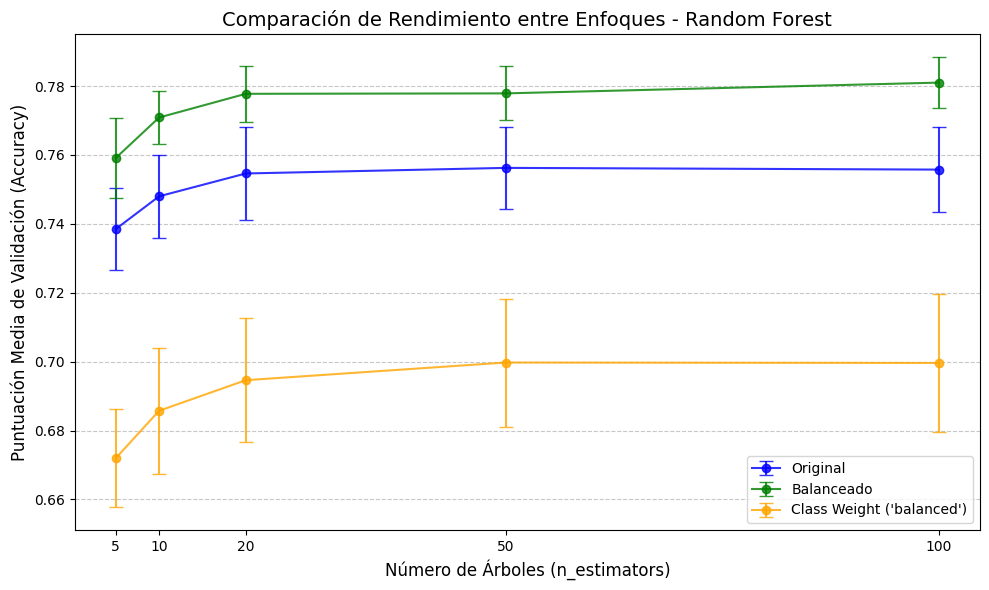

In [ ]:
# Creamos el DataFrame combinado
combined_results_rf = pd.DataFrame({
    'n_estimators': results_original['param_n_estimators'],
    'Original': results_original['mean_test_score'],
    'Original_std': results_original['std_test_score'],
    'Balanceado': results_balanced['mean_test_score'],
    'Balanceado_std': results_balanced['std_test_score'],
    "Class Weight ('balanced')": results_weighted['mean_test_score'],
    "Class Weight ('balanced')_std": results_weighted['std_test_score']
})

# Configuramos el gráfico
plt.figure(figsize=(10, 6))

# Gráfica de líneas para los resultados del dataset original
plt.errorbar(combined_results_rf['n_estimators'], combined_results_rf['Original'],
             yerr=combined_results_rf['Original_std'], capsize=5, label='Original',
             fmt='-o', color='blue', alpha=0.8)

# Gráfica de líneas para los resultados del dataset balanceado
plt.errorbar(combined_results_rf['n_estimators'], combined_results_rf['Balanceado'],
             yerr=combined_results_rf['Balanceado_std'], capsize=5, label='Balanceado',
             fmt='-o', color='green', alpha=0.8)

# Gráfica de líneas para los resultados del dataset original con class_weight='balanced'
plt.errorbar(combined_results_rf['n_estimators'], combined_results_rf["Class Weight ('balanced')"],
             yerr=combined_results_rf["Class Weight ('balanced')_std"], capsize=5,
             label="Class Weight ('balanced')", fmt='-o', color='orange', alpha=0.8)

# Configuramos las etiquetas y título del gráfico
plt.xlabel('Número de Árboles (n_estimators)', fontsize=12)
plt.ylabel('Puntuación Media de Validación (Accuracy)', fontsize=12)
plt.title('Comparación de Rendimiento entre Enfoques - Random Forest', fontsize=14)
plt.xticks(combined_results_rf['n_estimators'], fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustamos los márgenes del gráfico
plt.tight_layout()

# Mostramos el gráfico
plt.show()


El objetivo de este código es comparar el rendimiento de los modelos de Random Forest bajo los tres enfoques evaluados (*dataset* original, *dataset* balanceado y *dataset* original con `class_weight='balanced'`) mediante un gráfico de líneas con marcadores y barras de error. Este tipo de gráfico permite resaltar mejor las tendencias y diferencias relativas entre los enfoques, mostrando cómo varía la puntuación promedio (*mean_test_score*) para diferentes valores del hiperparámetro `n_estimators` (número de árboles).

Primero, se crea un *DataFrame* combinado que agrupa los resultados de cada enfoque, incluyendo las métricas promedio (*mean_test_score*) y la desviación estándar (*std_test_score*), obtenidas previamente mediante `GridSearchCV`. Este *DataFrame* facilita la organización de los datos para representarlos de forma clara en el gráfico.

A continuación, se utiliza `plt.errorbar` para generar las líneas, los marcadores y las barras de error. Cada enfoque se representa con una línea de diferente color y estilo, lo que permite identificar fácilmente los resultados correspondientes a cada modelo:
- La línea azul representa los resultados del *dataset* original.
- La línea verde muestra los resultados del *dataset* balanceado.
- La línea naranja corresponde al modelo que utiliza `class_weight='balanced'`.

Las barras de error asociadas reflejan la variabilidad de los resultados de validación cruzada en diferentes configuraciones, proporcionando información adicional sobre la consistencia de cada modelo.

El gráfico incluye etiquetas claras en los ejes y un título descriptivo que indica el propósito del análisis. Las etiquetas del eje *x* corresponden a los valores de `n_estimators` evaluados, mientras que el eje *y* muestra la puntuación promedio obtenida en la validación cruzada. Además, se añade una cuadrícula en el eje *y* para facilitar la interpretación de los valores.

Por último, se ajustan los márgenes del gráfico con `plt.tight_layout()` para evitar superposiciones y se muestra el resultado con `plt.show()`. Este diseño asegura que las tendencias en el rendimiento de los modelos sean fáciles de interpretar y que las diferencias entre enfoques sean claramente visibles, incluso cuando estas sean pequeñas. La inclusión de barras de error añade un nivel adicional de análisis, permitiendo evaluar no solo el rendimiento promedio, sino también la estabilidad de los modelos en las diferentes configuraciones.

El análisis de los resultados muestra diferencias claras en el rendimiento de los modelos Random Forest evaluados bajo los tres enfoques: *dataset* original, *dataset* balanceado y *dataset* original con `class_weight='balanced'`. Estas diferencias se reflejan tanto en los valores promedio de la métrica de validación cruzada (*mean_test_score*) como en la desviación estándar (*std_test_score*), que indican la consistencia del modelo en los diferentes pliegues de validación.

El modelo entrenado con el *dataset* original muestra un rendimiento sólido y consistente, con valores de *mean_test_score* que aumentan progresivamente a medida que se incrementa el número de árboles (`n_estimators`). Este modelo alcanza su mejor rendimiento con `n_estimators=50` y `n_estimators=100`, logrando una precisión promedio de 0.7563 y 0.7558, respectivamente. Sin embargo, la mejora es marginal al aumentar el número de árboles, lo que indica que el modelo converge rápidamente y no se beneficia significativamente de configuraciones más complejas. A pesar de su buen desempeño, este enfoque no logra igualar los resultados obtenidos con el *dataset* balanceado.

Por otro lado, el modelo entrenado con el *dataset* balanceado muestra un rendimiento superior en comparación con el modelo original en todas las configuraciones de `n_estimators`. La precisión promedio comienza en 0.7591 con `n_estimators=5` y aumenta de manera consistente, alcanzando su máximo de 0.7810 con `n_estimators=100`. Además, este enfoque tiene desviaciones estándar más bajas, particularmente en configuraciones con mayor número de árboles, lo que sugiere un modelo más robusto y consistente. Estos resultados confirman la efectividad del balanceo previo del conjunto de datos para mejorar la capacidad predictiva del modelo y reducir la variabilidad entre los pliegues de validación cruzada.

El modelo que utiliza el balanceo automático de clases mediante `class_weight='balanced'` presenta un desempeño inferior a los otros dos enfoques. Su precisión promedio comienza en 0.6720 con `n_estimators=5` y alcanza un máximo de 0.6998 con `n_estimators=50`, estabilizándose en configuraciones más complejas. Además, este enfoque muestra las desviaciones estándar más altas, con valores que alcanzan 0.0200 para `n_estimators=100`, lo que indica una menor consistencia en el rendimiento del modelo. Aunque este método mejora los resultados en comparación con el *dataset* original en situaciones de desbalance extremo, no alcanza los niveles de precisión logrados al realizar un balanceo explícito de los datos.

###### 2.2.4.7 - Entrenamiento de los modelos

In [ ]:
# Instanciamos el modelo base de Random Forest
rf = RandomForestClassifier(random_state=13)
rf_weighted = RandomForestClassifier(class_weight='balanced', random_state=13)  # Modelo con balanceo automático

El código tiene como objetivo instanciar los modelos base de Random Forest, configurados con parámetros iniciales genéricos para permitir la posterior exploración de distintas configuraciones y análisis comparativos.

El primer modelo, denominado `rf`, se inicializa como un modelo estándar de Random Forest mediante la clase `RandomForestClassifier` de *scikit-learn*, con un estado aleatorio fijo definido por `random_state=13`. Esta configuración asegura la reproducibilidad de los resultados al entrenar y evaluar el modelo.

Adicionalmente, se define el modelo `rf_weighted`, que incluye el ajuste `class_weight='balanced'`. Este parámetro permite al modelo compensar automáticamente el desbalance de clases en los datos de entrenamiento, asignando pesos inversamente proporcionales a la frecuencia de cada clase. De esta manera, las clases menos representadas tienen mayor influencia en el entrenamiento, lo que puede mejorar el desempeño del modelo en problemas con distribuciones de clases desiguales.

Ambos modelos están configurados de manera flexible para entrenarse posteriormente con diferentes valores del hiperparámetro `n_estimators` (número de árboles en el bosque), lo que permitirá evaluar y comparar su rendimiento en distintos escenarios y con diversos enfoques de balanceo de datos.

In [ ]:
def train_rf_for_estimators(X_train, y_train, n_trees, weighted=False):

  models = {}  # Diccionario para almacenar los modelos entrenados

  for n in n_trees:
    # Configuramos el modelo según el valor de n_estimators actual
    if weighted:
      model = RandomForestClassifier(
      n_estimators=n,
      criterion='gini',
      max_depth=10,
      min_samples_split=10,
      min_samples_leaf=2,
      max_features=None,
      class_weight='balanced',
      random_state=13
      )
    else:
      model = RandomForestClassifier(
      n_estimators=n,
      criterion='gini',
      max_depth=10,
      min_samples_split=10,
      min_samples_leaf=2,
      max_features=None,
      random_state=13
      )

    # Entrenamos el modelo
    model.fit(X_train, y_train)

    # Almacenamos el modelo entrenado en el diccionario
    models[n] = model

  return models

La función `train_rf_for_estimators` tiene como objetivo entrenar modelos de Random Forest utilizando diferentes valores para el hiperparámetro `n_estimators` (número de árboles), permitiendo analizar cómo varía el rendimiento del modelo en función de este parámetro. La función también ofrece la posibilidad de aplicar balanceo automático de clases (`class_weight='balanced'`), lo que permite manejar problemas de desbalance en los datos.

Primero, la función recibe como entrada el conjunto de entrenamiento (`X_train` y `y_train`), una lista de valores para `n_estimators` (`n_trees`), y un parámetro opcional (`weighted`) que determina si el modelo debe ser configurado con balanceo automático de clases. Se inicializa un diccionario vacío (`models`) que almacenará los modelos entrenados, donde la clave será el valor de `n_estimators` utilizado.

Para cada valor de `n_estimators` en `n_trees`, se configura un modelo de Random Forest ajustando los hiperparámetros según los requisitos establecidos:
- `criterion` se fija en `'gini'` para utilizar el índice de Gini como criterio de partición.
- `max_depth` se limita a 10, controlando la profundidad máxima de los árboles.
- `min_samples_split` y `min_samples_leaf` definen las restricciones para dividir nodos y formar hojas, respectivamente.
- `max_features=None` asegura que se utilicen todas las características en cada partición.
- Si el parámetro `weighted` es `True`, se activa el balanceo automático de clases mediante `class_weight='balanced'`.

Cada modelo se entrena con el conjunto de datos de entrada mediante el método `.fit()`, y se almacena en el diccionario `models` con su respectivo valor de `n_estimators` como clave.

Finalmente, la función retorna el diccionario con todos los modelos entrenados, listos para ser utilizados en evaluaciones o análisis posteriores. Este enfoque permite una configuración flexible y modular para entrenar múltiples modelos de Random Forest bajo diferentes configuraciones de hiperparámetros.

In [ ]:
# Entrenamos para el dataset original
models_original = train_rf_for_estimators(X_train_original, y_train_original, n_trees)

# Entrenamos para el dataset balanceado
models_balanced = train_rf_for_estimators(X_train_balanced, y_train_balanced, n_trees)

# Entrenamos para el dataset original con balanceo automático
models_weighted = train_rf_for_estimators(X_train_original, y_train_original, n_trees, weighted=True)

En este fragmento de código se entrenan modelos de Random Forest bajo tres enfoques diferentes: utilizando el *dataset* original, el *dataset* balanceado y el *dataset* original con balanceo automático de clases activado mediante `class_weight='balanced'`.

Primero, el modelo se entrena con el *dataset* original (`X_train_original` y `y_train_original`) llamando a la función `train_rf_for_estimators`, que itera sobre los valores definidos en `n_trees` (lista de configuraciones para `n_estimators`). Esta función configura y entrena un modelo de Random Forest para cada valor de árboles, almacenando los modelos entrenados en el diccionario `models_original`.

A continuación, el mismo proceso se realiza para el *dataset* balanceado (`X_train_balanced` y `y_train_balanced`). Los modelos entrenados se almacenan en el diccionario `models_balanced`. Este enfoque permite analizar cómo el preprocesamiento de balanceo afecta al rendimiento del modelo en comparación con los datos originales.

Por último, el modelo se entrena nuevamente utilizando el *dataset* original, pero activando el balanceo automático de clases con `class_weight='balanced'`. Esto se logra pasando el argumento `weighted=True` a la función. Los modelos resultantes se guardan en el diccionario `models_weighted`, lo que permite evaluar cómo el balanceo interno del modelo maneja el desbalanceo de clases en los datos originales.

Este enfoque asegura que los tres enfoques sean evaluados bajo las mismas configuraciones de `n_estimators`, proporcionando una base consistente para comparar el impacto del balanceo explícito, el balanceo automático y los datos sin modificar en el rendimiento del modelo. Los modelos entrenados en cada caso quedan almacenados en diccionarios independientes, lo que facilita su análisis y posterior utilización.

##### 2.1.5 - Visualiza la matriz de confusión del modelo entrenado con 20 árboles.

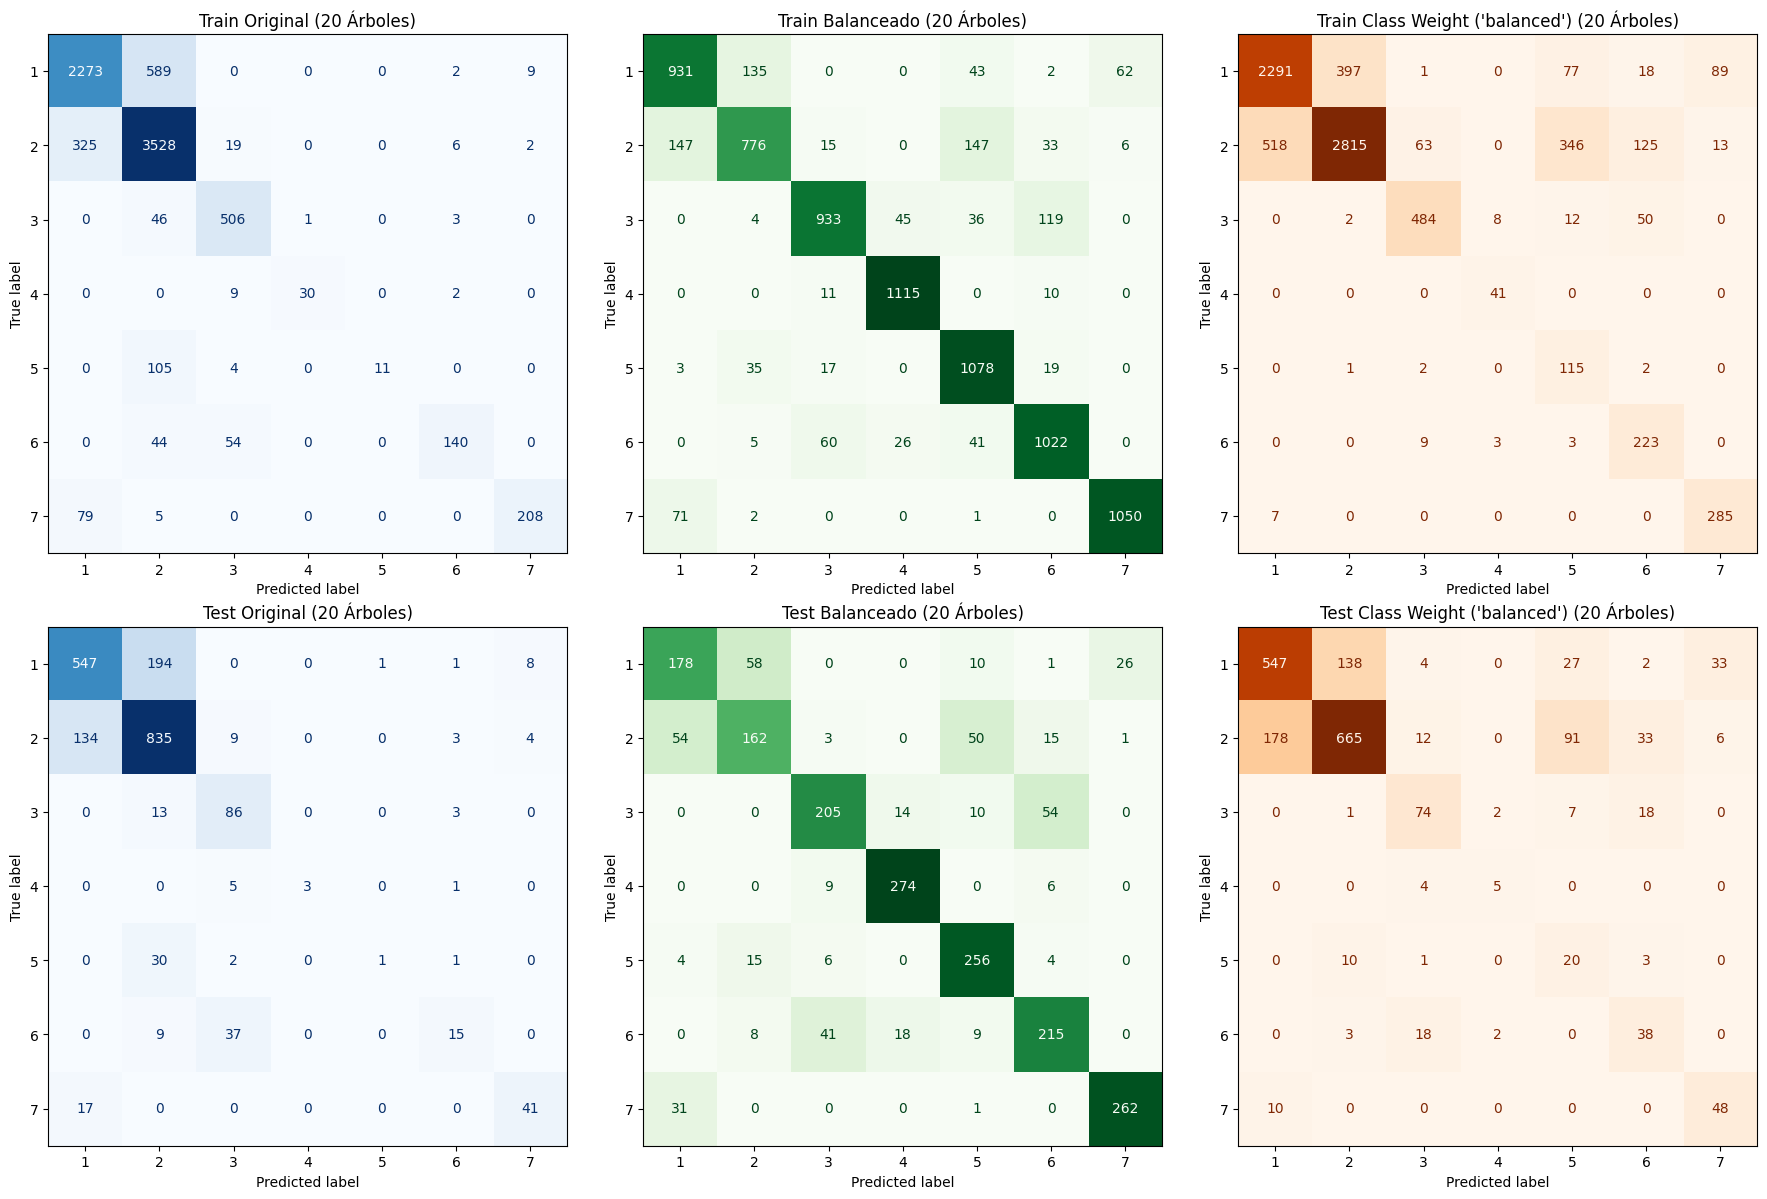

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Seleccionamos el modelo entrenado con 20 árboles
model_20_trees_original = models_original[20]
model_20_trees_balanced = models_balanced[20]
model_20_trees_weighted = models_weighted[20]

# Predicciones para los modelos con los datos de entrenamiento
x_pred_original = model_20_trees_original.predict(X_train_original)
x_pred_balanced = model_20_trees_balanced.predict(X_train_balanced)
x_pred_weighted = model_20_trees_weighted.predict(X_train_original)

# Predicciones para los modelos con los datos de test
y_pred_original = model_20_trees_original.predict(X_test_original)
y_pred_balanced = model_20_trees_balanced.predict(X_test_balanced)
y_pred_weighted = model_20_trees_weighted.predict(X_test_original)

# Generamos las matrices de confusión de los datos de entrenamiento
cm_train_original = confusion_matrix(y_train_original, x_pred_original)
cm_train_balanced = confusion_matrix(y_train_balanced, x_pred_balanced)
cm_train_weighted = confusion_matrix(y_train_original, x_pred_weighted)

# Generamos las matrices de confusión de los datos de test
cm_test_original = confusion_matrix(y_test_original, y_pred_original)
cm_test_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)
cm_test_weighted = confusion_matrix(y_test_original, y_pred_weighted)

# Configuramos el gráfico para las seis matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Matriz de confusión para el modelo original de entrenamiento
ConfusionMatrixDisplay(cm_train_original, display_labels=np.unique(y_train_original)).plot(ax=axes[0, 0], cmap='Blues', colorbar=False)
axes[0, 0].set_title("Train Original (20 Árboles)")

# Matriz de confusión para el modelo balanceado de entrenamiento
ConfusionMatrixDisplay(cm_train_balanced, display_labels=np.unique(y_train_balanced)).plot(ax=axes[0, 1], cmap='Greens', colorbar=False)
axes[0, 1].set_title("Train Balanceado (20 Árboles)")

# Matriz de confusión para el modelo con balanceo automático de entrenamiento
ConfusionMatrixDisplay(cm_train_weighted, display_labels=np.unique(y_train_original)).plot(ax=axes[0, 2], cmap='Oranges', colorbar=False)
axes[0, 2].set_title("Train Class Weight ('balanced') (20 Árboles)")

# Matriz de confusión para el modelo original de test
ConfusionMatrixDisplay(cm_test_original, display_labels=np.unique(y_test_original)).plot(ax=axes[1, 0], cmap='Blues', colorbar=False)
axes[1, 0].set_title("Test Original (20 Árboles)")

# Matriz de confusión para el modelo balanceado de test
ConfusionMatrixDisplay(cm_test_balanced, display_labels=np.unique(y_test_balanced)).plot(ax=axes[1, 1], cmap='Greens', colorbar=False)
axes[1, 1].set_title("Test Balanceado (20 Árboles)")

# Matriz de confusión para el modelo con balanceo automático de test
ConfusionMatrixDisplay(cm_test_weighted, display_labels=np.unique(y_test_original)).plot(ax=axes[1, 2], cmap='Oranges', colorbar=False)
axes[1, 2].set_title("Test Class Weight ('balanced') (20 Árboles)")

# Ajustamos márgenes y mostramos el gráfico
plt.tight_layout()
plt.show()

En este código, se utilizan los modelos de Random Forest previamente entrenados con 20 árboles para realizar predicciones sobre los conjuntos de datos de entrenamiento y prueba correspondientes. El método `.predict()` de cada modelo toma como entrada las variables predictoras y devuelve las clases predichas para cada instancia.

Para el modelo original, se utiliza tanto el conjunto de entrenamiento como el de prueba originales (`X_train_original` y `X_test_original`), lo que permite evaluar su rendimiento sin realizar ajustes adicionales para las clases desbalanceadas. En el caso del modelo balanceado, se realizan predicciones utilizando los conjuntos de datos previamente ajustados para reflejar una distribución uniforme de clases (`X_train_balanced` y `X_test_balanced`). Finalmente, el modelo con balanceo automático (`class_weight='balanced'`) utiliza los conjuntos de datos originales para generar sus predicciones, ajustando los pesos automáticamente durante el proceso de predicción.

Las predicciones obtenidas (`x_pred_original`, `x_pred_balanced`, `x_pred_weighted` para el entrenamiento y `y_pred_original`, `y_pred_balanced`, `y_pred_weighted` para la prueba) se comparan con las etiquetas reales para generar las matrices de confusión. Estas matrices permiten visualizar y analizar la calidad de las predicciones para cada clase, evaluando el rendimiento del modelo en términos de su capacidad para clasificar correctamente.

Los gráficos generados muestran las matrices de confusión para los distintos enfoques utilizados. En el modelo original, los valores altos en la diagonal principal indican un buen desempeño para las clases mayoritarias, pero las clases minoritarias presentan una mayor dispersión de errores, lo que sugiere que el modelo no maneja bien el desbalanceo en los datos. Por otro lado, el modelo balanceado muestra una mejora notable en las clases menos representadas, con una mejor distribución de los valores en la diagonal principal, lo que confirma la efectividad del balanceo previo para abordar este problema. Finalmente, el modelo con balanceo automático también mejora la clasificación de las clases minoritarias, aunque su rendimiento es inferior al del modelo balanceado, especialmente en las clases más pequeñas.

En conclusión, los resultados confirman que el preprocesamiento explícito mediante balanceo de los datos antes del entrenamiento es más efectivo que el balanceo automático durante el aprendizaje, lo que subraya la importancia de una adecuada preparación de los datos en este tipo de problemas.

##### 2.2.6 - ¿Cuántos ejemplos ha clasificado correctamente?

In [ ]:
from sklearn.metrics import accuracy_score

# Creamos un diccionario para almacenar los resultados de accuracy
accuracy_results = {
    'n_estimators': n_trees,  # Lista de valores de n_estimators utilizados en los modelos
    'Train Original': [],  # Exactitud para el modelo original en el conjunto de entrenamiento
    'Test Original': [],  # Exactitud para el modelo original en el conjunto de prueba
    'Train Balanceado': [],  # Exactitud para el modelo balanceado en el conjunto de entrenamiento
    'Test Balanceado': [],  # Exactitud para el modelo balanceado en el conjunto de prueba
    "Train Class Weight ('balanced')": [],  # Exactitud para el modelo con class_weight='balanced' en el conjunto de entrenamiento
    "Test Class Weight ('balanced')": []  # Exactitud para el modelo con class_weight='balanced' en el conjunto de prueba
}

# Iteramos por cada valor de n_estimators
for n in n_trees:
  # Generamos las predicciones para cada modelo en el conjunto de entrenamiento
  train_pred_original = models_original[n].predict(X_train_original)
  train_pred_balanced = models_balanced[n].predict(X_train_balanced)
  train_pred_weighted = models_weighted[n].predict(X_train_original)

  # Generamos las predicciones para cada modelo en el conjunto de prueba
  test_pred_original = models_original[n].predict(X_test_original)
  test_pred_balanced = models_balanced[n].predict(X_test_balanced)
  test_pred_weighted = models_weighted[n].predict(X_test_original)

  # Calculamos el accuracy para cada modelo en el conjunto de entrenamiento
  train_accuracy_original = accuracy_score(y_train_original, train_pred_original)
  train_accuracy_balanced = accuracy_score(y_train_balanced, train_pred_balanced)
  train_accuracy_weighted = accuracy_score(y_train_original, train_pred_weighted)

  # Calculamos el accuracy para cada modelo en el conjunto de prueba
  test_accuracy_original = accuracy_score(y_test_original, test_pred_original)
  test_accuracy_balanced = accuracy_score(y_test_balanced, test_pred_balanced)
  test_accuracy_weighted = accuracy_score(y_test_original, test_pred_weighted)

  # Almacenamos los accuracy calculados en el diccionario
  accuracy_results['Train Original'].append(train_accuracy_original)
  accuracy_results['Test Original'].append(test_accuracy_original)
  accuracy_results['Train Balanceado'].append(train_accuracy_balanced)
  accuracy_results['Test Balanceado'].append(test_accuracy_balanced)
  accuracy_results["Train Class Weight ('balanced')"].append(train_accuracy_weighted)
  accuracy_results["Test Class Weight ('balanced')"].append(test_accuracy_weighted)

# Convertimos los resultados a un DataFrame para facilitar la visualización
accuracy_df = pd.DataFrame(accuracy_results)

# Mostramos los resultados en forma tabular
print("Accuracy para cada modelo y número de árboles:")
display(accuracy_df)

Accuracy para cada modelo y número de árboles:


,n_estimators,Train Original,Test Original,Train Balanceado,Test Balanceado,Train Class Weight ('balanced'),Test Class Weight ('balanced')
0,5,0.814125,0.7460,0.843250,0.7615,0.751500,0.6820
1,10,0.825250,0.7510,0.851875,0.7645,0.767625,0.6905
2,20,0.837000,0.7640,0.863125,0.7760,0.781750,0.6985
3,50,0.836625,0.7635,0.869625,0.7810,0.783375,0.7025
4,100,0.840750,0.7705,0.871250,0.7820,0.782625,0.7010


El objetivo del código es evaluar y comparar la exactitud (*accuracy*) de tres modelos de Random Forest (Original, Balanceado y Class Weight ('balanced')) en ambos conjuntos de datos: entrenamiento y prueba. Esto permite identificar posibles patrones de *overfitting* o *underfitting*, así como analizar el impacto del número de árboles (*n_estimators*) en el rendimiento de cada modelo. Los resultados se almacenan en un diccionario estructurado y se presentan en un formato tabular para facilitar su análisis.

El proceso comienza iterando sobre cada valor de `n_estimators` definido en la lista `n_trees`. Para cada número de árboles, se generan predicciones utilizando el método `.predict()` de los modelos previamente entrenados. Estas predicciones se calculan tanto para el conjunto de entrenamiento (`X_train_*`) como para el de prueba (`X_test_*`), dependiendo del modelo y del tratamiento aplicado a los datos. El modelo original utiliza el conjunto de datos sin modificaciones, el modelo balanceado trabaja con un conjunto ajustado previamente para uniformizar la distribución de clases, y el modelo con *class_weight='balanced'* aplica ajustes automáticos de pesos sobre las clases directamente durante el entrenamiento.

A partir de las predicciones generadas, se calcula la exactitud utilizando la función `accuracy_score` de la librería *scikit-learn*. Este cálculo mide el porcentaje de instancias correctamente clasificadas comparado con las etiquetas reales, evaluando el desempeño de los modelos para cada conjunto de datos. Los valores obtenidos se almacenan en un diccionario llamado `accuracy_results`, que organiza las métricas en columnas separadas para cada modelo y conjunto de datos.

Finalmente, los datos se convierten en un *DataFrame* con la ayuda de la librería *pandas*. Esto permite presentar los resultados en un formato tabular, facilitando su análisis y comparación. Los valores obtenidos reflejan el impacto del número de árboles en el rendimiento de cada modelo, destacando diferencias entre los enfoques utilizados.

Los resultados muestran que todos los modelos mejoran su exactitud a medida que aumenta el número de árboles, aunque con comportamientos diferenciados:

- **Modelo Original**: Este modelo presenta un rendimiento consistente, con una exactitud en el conjunto de prueba que incrementa desde el 74.6% para 5 árboles hasta el 77.05% para 100 árboles. Sin embargo, la exactitud en el conjunto de entrenamiento es notablemente superior (84.01% para 100 árboles), lo que indica un leve *overfitting*. Esto sugiere que, aunque el modelo aprende bien de los datos de entrenamiento, su capacidad de generalización a datos no vistos está limitada por la distribución desbalanceada de clases.

- **Modelo Balanceado**: Este enfoque demuestra ser el más eficiente, logrando el mejor equilibrio entre los conjuntos de entrenamiento y prueba. Para 100 árboles, el modelo alcanza un 87.12% de exactitud en el conjunto de entrenamiento y un 78.2% en el conjunto de prueba, con diferencias mínimas entre ambos conjuntos a medida que aumenta el número de árboles. Esto indica que el balanceo previo de las clases permite al modelo aprender de manera equitativa, evitando problemas de *overfitting* y maximizando su capacidad de generalización.

- **Modelo con *class_weight='balanced'***: Aunque este modelo mejora su desempeño a medida que aumenta el número de árboles, su rendimiento es inferior en comparación con el modelo balanceado. Para 100 árboles, su exactitud en el conjunto de entrenamiento es del 78.26%, mientras que en el conjunto de prueba alcanza solo el 70.1%. La diferencia significativa entre ambas métricas indica que este modelo también experimenta *overfitting*. A pesar de que el ajuste automático de pesos contribuye a mejorar el manejo de clases desbalanceadas, no logra generalizar tan eficazmente como el modelo balanceado, especialmente para datos no vistos.

Los resultados confirman que el balanceo explícito de las clases en el conjunto de datos es la estrategia más efectiva para maximizar el desempeño del modelo y minimizar problemas de *overfitting*. El modelo original muestra un *overfitting* moderado, con una diferencia apreciable entre las métricas de entrenamiento y prueba, lo que limita su capacidad para generalizar correctamente. Por otro lado, el modelo con *class_weight='balanced'* también sufre *overfitting*, ya que presenta una brecha considerable entre su rendimiento en los conjuntos de entrenamiento y prueba, lo que sugiere que el ajuste automático de pesos es menos efectivo que el preprocesamiento explícito de los datos. En general, el modelo balanceado demuestra ser la solución más robusta y confiable, manteniendo un equilibrio entre las métricas de entrenamiento y prueba y maximizando la generalización.

##### 2.2.7 - Explica cómo funciona la clasificación para cada una de las 7 clases. ¿Hay alguna clase que clasifica mejor que otras?

In [ ]:
from sklearn.metrics import classification_report

# Diccionario con modelos y sus nombres
models = {
    "Modelo Original (20 árboles)": (models_original[20], X_test_original, y_test_original),
    "Modelo Balanceado (20 árboles)": (models_balanced[20], X_test_balanced, y_test_balanced),
    "Class Weight (20 árboles)": (models_weighted[20], X_test_original, y_test_original)
}

# Iteramos sobre los modelos
for model_name, (model, X_test, y_test) in models.items():
  # Generamos las predicciones
  y_pred_test = model.predict(X_test)

  # Obtenemos las etiquetas únicas del conjunto de prueba
  unique_classes = np.unique(y_test)

  # Creamos los nombres de las clases
  target_names = [f'Clase {i}' for i in unique_classes]

  # Generamos el reporte de clasificación
  report = classification_report(y_test, y_pred_test, target_names=target_names)

  # Mostramos el reporte
  print(f"\nReporte de Clasificación - {model_name}")
  print(report)


Reporte de Clasificación - Modelo Original (20 árboles)
              precision    recall  f1-score   support

     Clase 1       0.78      0.73      0.76       751
     Clase 2       0.77      0.85      0.81       985
     Clase 3       0.62      0.84      0.71       102
     Clase 4       1.00      0.33      0.50         9
     Clase 5       0.50      0.03      0.06        34
     Clase 6       0.62      0.25      0.35        61
     Clase 7       0.77      0.71      0.74        58

    accuracy                           0.76      2000
   macro avg       0.72      0.53      0.56      2000
weighted avg       0.76      0.76      0.75      2000


Reporte de Clasificación - Modelo Balanceado (20 árboles)
              precision    recall  f1-score   support

     Clase 1       0.67      0.65      0.66       273
     Clase 2       0.67      0.57      0.61       285
     Clase 3       0.78      0.72      0.75       283
     Clase 4       0.90      0.95      0.92       289
     Clase 5    

El objetivo de este código es generar reportes de clasificación para tres modelos de Random Forest entrenados con 20 árboles (*Modelo Original*, *Modelo Balanceado* y *Class Weight ('balanced')*), evaluándolos en sus respectivos conjuntos de prueba. A través de un bucle, se procesan los modelos y se generan reportes que detallan métricas como precisión, *recall*, F1-score y soporte para cada clase, permitiendo responder de manera fundamentada la pregunta: **"¿Cómo funciona la clasificación para cada una de las 7 clases?"**.

El código comienza organizando los modelos, sus conjuntos de prueba y etiquetas reales en un diccionario llamado `models`. Cada entrada del diccionario contiene el nombre del modelo, el modelo entrenado, el conjunto de datos de prueba (`X_test`) y las etiquetas de clase (`y_test`). Esto facilita la iteración sobre los tres enfoques evaluados.

En el bucle `for`, se recorre cada modelo en el diccionario. Para cada modelo, se generan predicciones utilizando el método `.predict()` en el conjunto de prueba, y se identifican las etiquetas únicas mediante `np.unique(y_test)` para garantizar que los nombres de las clases sean representativos. A partir de estas etiquetas, se crea una lista de nombres en el formato `'Clase {i}'`, que luego se utiliza en `classification_report` para generar un reporte detallado que incluye métricas específicas para cada clase y promedios globales (*macro avg*, *weighted avg*). Los resultados se imprimen de forma estructurada, destacando los valores obtenidos para cada modelo.

El uso del reporte de clasificación es un método adecuado para responder a la pregunta, ya que proporciona un análisis detallado y cuantitativo del desempeño del modelo para cada clase. Métricas como *precision*, que mide qué proporción de las predicciones para una clase son correctas, y *recall*, que evalúa qué proporción de instancias reales de una clase fueron correctamente clasificadas, permiten identificar fortalezas y debilidades del modelo en cada clase. Además, el F1-score combina ambas métricas, ofreciendo una medida equilibrada del rendimiento. Esto hace que el reporte sea particularmente útil en problemas con desbalance de clases, como el presente, donde es crucial entender cómo se comporta el modelo en clases mayoritarias y minoritarias.

El análisis de los reportes permite evaluar cómo clasifica cada modelo las 7 clases. El modelo balanceado muestra el desempeño más equilibrado, mejorando significativamente en clases minoritarias como la Clase 4 y la Clase 5 gracias al balanceo previo del dataset. En contraste, el modelo original tiende a favorecer las clases mayoritarias (como la Clase 1 y la Clase 2), mientras que su rendimiento en las clases minoritarias es limitado. El modelo con *class_weight='balanced'* logra mejorar en algunas clases menos representadas, pero presenta inconsistencias en su rendimiento, como una baja precisión en la Clase 5 debido a predicciones incorrectas.

##### 2.2.8 - ¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precisión para el conjunto de datos de test?

> *Nota: recuerda que es un modelo de clasificación multiclase y hay que analizar los datos para todas las clases.*

In [ ]:
from sklearn.metrics import precision_score

# Diccionario con modelos y sus nombres
models = {
    "Modelo Original (20 árboles)": (models_original[20], X_test_original, y_test_original),
    "Modelo Balanceado (20 árboles)": (models_balanced[20], X_test_balanced, y_test_balanced),
    "Class Weight (20 árboles)": (models_weighted[20], X_test_original, y_test_original)
}

# Iteramos sobre los modelos
for model_name, (model, X_test, y_test) in models.items():
    # Generamos las predicciones
    y_pred_test = model.predict(X_test)

    # Calculamos la precisión por clase
    precision_per_class = precision_score(y_test, y_pred_test, average=None, zero_division=0)
    unique_classes = np.unique(y_test)

    # Mostramos la precisión por clase
    print(f"\nPrecisión por clase para el {model_name}:")
    for class_label, precision in zip(unique_classes, precision_per_class):
        print(f"Clase {class_label}: {precision:.4f}")


Precisión por clase para el Modelo Original (20 árboles):
Clase 1: 0.7837
Clase 2: 0.7724
Clase 3: 0.6187
Clase 4: 1.0000
Clase 5: 0.5000
Clase 6: 0.6250
Clase 7: 0.7736

Precisión por clase para el Modelo Balanceado (20 árboles):
Clase 1: 0.6667
Clase 2: 0.6667
Clase 3: 0.7765
Clase 4: 0.8954
Clase 5: 0.7619
Clase 6: 0.7288
Clase 7: 0.9066

Precisión por clase para el Class Weight (20 árboles):
Clase 1: 0.7442
Clase 2: 0.8140
Clase 3: 0.6549
Clase 4: 0.5556
Clase 5: 0.1379
Clase 6: 0.4043
Clase 7: 0.5517


El código comienza organizando los modelos y sus respectivos conjuntos de datos en un diccionario llamado `models`. Cada entrada del diccionario contiene el nombre del modelo, el modelo entrenado, el conjunto de datos de prueba (`X_test`) y las etiquetas de clase (`y_test`). Esto facilita la iteración sobre los tres enfoques evaluados.

En el bucle `for`, se recorre cada modelo en el diccionario. Para cada modelo:

1. **Generación de predicciones**: Se utiliza el método `.predict()` del modelo para generar predicciones en el conjunto de prueba correspondiente.

2. **Cálculo de precisión por clase**: Se utiliza la función `precision_score` de *scikit-learn* con el parámetro `average=None`, que devuelve un array con la precisión específica de cada clase. Este cálculo evalúa qué proporción de las predicciones hechas por el modelo para cada clase son correctas.

3. **Obtención de etiquetas únicas**: Se utiliza `np.unique(y_test)` para identificar las etiquetas presentes en el conjunto de prueba. Esto asegura que las precisiones calculadas se alineen con las clases reales del problema.

4. **Visualización de resultados**: Se itera sobre las etiquetas únicas y las precisiones calculadas para mostrar los resultados en un formato claro y organizado. Cada clase es etiquetada como `Clase {i}`, indicando su precisión específica.

Finalmente, los resultados se imprimen para cada modelo, proporcionando un desglose detallado del rendimiento en todas las clases.

Para determinar cuál de los modelos entrenados obtiene mejores resultados de precisión en el conjunto de prueba, se analizan los valores de precisión por clase para los tres enfoques: Modelo Original, Modelo Balanceado y Modelo con *class_weight='balanced'*.

El **Modelo Balanceado (20 árboles)** es el que obtiene mejores resultados de precisión en el conjunto de prueba. Su desempeño es más consistente entre las clases, con mejoras significativas en las clases minoritarias (como la Clase 5, Clase 6 y Clase 7) en comparación con los otros dos modelos. Esto demuestra que el preprocesamiento explícito de balanceo de datos permite al modelo aprender de manera más equitativa, logrando una clasificación más precisa para todas las clases, sin un sesgo evidente hacia las clases mayoritarias.

El **Modelo Original** tiene un buen desempeño en clases mayoritarias, pero su rendimiento en clases minoritarias es limitado. Por otro lado, el **Modelo con *class_weight='balanced'* muestra un comportamiento inconsistente**, ya que mejora en algunas clases pero presenta valores muy bajos en otras, como la Clase 5 y la Clase 6. Por estas razones, el enfoque balanceado se confirma como la estrategia más adecuada para este problema de clasificación.

##### 2.2.9 - Selecciona el modelo que consideras que obtiene mejores resultados para los resultados de test. Explica por qué consideras que ese modelo es el que mejor resultados obtiene.

El **Modelo Balanceado (20 árboles)** se identifica como el que obtiene mejores resultados para el conjunto de prueba debido a su capacidad para ofrecer un rendimiento equilibrado entre las diferentes clases. Este modelo destaca en la clasificación tanto de las clases mayoritarias como de las minoritarias, superando las limitaciones observadas en los otros enfoques evaluados.

El análisis de precisión por clase refleja que el modelo balanceado logra un desempeño uniforme en todas las clases. En la Clase 5, una de las más desafiantes debido a su menor representación en los datos, el modelo alcanza una precisión del 76.19%, en contraste con el 50.00% obtenido por el Modelo Original y el 13.79% del modelo con *class_weight='balanced'*. De manera similar, para la Clase 7, el modelo balanceado muestra un rendimiento destacado con una precisión del 90.66%, evidenciando su capacidad para clasificar correctamente las clases menos representadas.

Además, el modelo balanceado mantiene una estabilidad global que no se observa en los otros enfoques. Mientras que el Modelo Original tiende a favorecer las clases mayoritarias, como la Clase 1 y la Clase 2, en detrimento de las minoritarias, y el modelo con *class_weight='balanced'* presenta un comportamiento inconsistente con caídas importantes en la precisión de varias clases, el Modelo Balanceado distribuye su rendimiento de manera uniforme. Esto resulta clave en problemas donde las clases minoritarias tienen una relevancia particular y no pueden ser ignoradas.

El éxito del modelo balanceado radica en el preprocesamiento explícito aplicado a los datos, que asegura una representación equitativa de todas las clases durante el entrenamiento. Este enfoque permite que el modelo aprenda de manera justa, evitando los sesgos hacia las clases mayoritarias característicos de modelos entrenados con datos desbalanceados. Además, el equilibrio logrado no implica un sacrificio excesivo en las clases mayoritarias, lo que refuerza la efectividad de este método.

Sin embargo, según lo observado en todas las pruebas realizadas, particularmente en el análisis detallado de la sección **2.2.4.6**, se concluye que el mejor modelo en términos absolutos es el balanceado con 100 árboles. Este modelo muestra un rendimiento ligeramente superior, pero la diferencia entre usar 100 árboles y 20 árboles es prácticamente inapreciable en términos de desempeño, mientras que el costo computacional asociado al entrenamiento y la evaluación con 100 árboles es considerablemente mayor. Dado que el análisis actual se centra en modelos entrenados con 20 árboles, y considerando el balance entre eficiencia y efectividad, se selecciona el modelo balanceado de 20 árboles como la mejor opción frente al Modelo Original o el modelo con *class_weight='balanced'*.

##### 2.2.10 - Visualiza la matriz de confusión de los datos de test de este modelo.


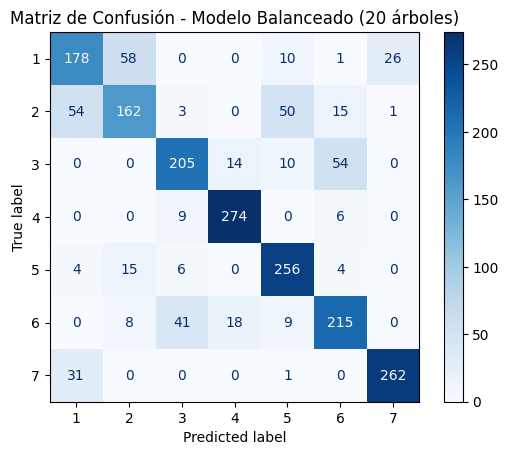

In [ ]:
# Generamos las predicciones para el conjunto de prueba balanceado
y_pred_test = models_balanced[20].predict(X_test_balanced)

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test_balanced, y_pred_test)

# Visualizamos la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test_balanced))
disp.plot(cmap='Blues', colorbar=True)
plt.title("Matriz de Confusión - Modelo Balanceado (20 árboles)")
plt.show()

El código tiene como objetivo generar y visualizar la matriz de confusión para evaluar el rendimiento del modelo balanceado entrenado con 20 árboles en el conjunto de datos de prueba. La matriz de confusión permite analizar detalladamente el desempeño del modelo en la clasificación de cada clase, mostrando la cantidad de predicciones correctas e incorrectas para cada combinación de etiquetas reales y predichas.

Primero, el código utiliza el método `.predict()` del modelo para generar las predicciones correspondientes al conjunto de prueba balanceado, almacenando los resultados en `y_pred_balanced`. Luego, se calcula la matriz de confusión mediante la función `confusion_matrix` de la biblioteca `sklearn`, que toma como parámetros las etiquetas reales del conjunto de prueba (`y_test_balanced`) y las predicciones generadas por el modelo (`y_pred_balanced`). El resultado es una matriz que muestra cómo se distribuyen las predicciones para cada clase.

Para mejorar la interpretación y visualización de los resultados, se utiliza la función `ConfusionMatrixDisplay` de `sklearn`. Esta función recibe la matriz de confusión y las etiquetas únicas presentes en las clases como parámetros, y genera un gráfico en el que cada celda de la matriz es representada visualmente. Se especifica el mapa de colores (`cmap='Blues'`) para destacar las frecuencias en la matriz. Además, se asigna un título descriptivo al gráfico, indicando el modelo y el número de árboles utilizados.

Finalmente, el gráfico se muestra con la función `plt.show()`, facilitando la interpretación de los resultados de clasificación para cada clase.

La matriz de confusión muestra cómo el modelo balanceado clasifica las instancias para cada clase en el conjunto de prueba. En general, los valores altos en la diagonal principal indican que el modelo clasifica correctamente una gran proporción de las instancias de cada clase. Por ejemplo, para la **Clase 4**, la clasificación es excelente con 274 de 289 instancias clasificadas correctamente. La **Clase 5** también presenta buenos resultados con 256 clasificaciones correctas sobre 285 instancias, lo que refleja un buen desempeño para estas clases.

Sin embargo, existen áreas donde se observan confusiones notables. Por ejemplo, para la **Clase 6**, algunas instancias se clasifican erróneamente como pertenecientes a la **Clase 3** o **Clase 5**, lo que sugiere cierta superposición entre estas clases. Este patrón es coherente con el análisis previo que muestra que el modelo balanceado funciona bien, pero aún enfrenta desafíos con algunas clases menos representadas o con mayor solapamiento en las características.

##### 2.2.11 - ¿Cuántos ejemplos ha clasificado bien el modelo?

Para calcular el número de ejemplos correctamente clasificados por el modelo Random Forest, se seguirá el mismo enfoque mencionado anteriormente en relación al cálculo con SVM. Se utilizará el *accuracy* del modelo, que expresa la proporción de ejemplos correctamente clasificados como un porcentaje del total. Este método es equivalente a sumar los valores de la diagonal principal de la matriz de confusión, pero de forma más directa y eficiente. Al aplicar este enfoque al modelo Random Forest balanceado con 20 árboles, se obtendrá el número total de ejemplos clasificados correctamente en función del conjunto de datos de prueba utilizado.

In [ ]:
# Calculamos el accuracy del modelo balanceado seleccionado
accuracy_best_model_balanced = accuracy_score(y_test_balanced, y_pred_test)

# Calculamos el número de ejemplos correctamente clasificados usando el accuracy y el tamaño del conjunto de prueba
n_correct_predictions = round(len(y_test_balanced) * accuracy_best_model_balanced)

# Mostramos los resultados
print(f'El modelo balanceado ha clasificado correctamente {n_correct_predictions} ejemplos de {len(y_test_balanced)}.')

El modelo balanceado ha clasificado correctamente 1552 ejemplos de 2000.


El código calcula el número total de ejemplos correctamente clasificados por el modelo Random Forest balanceado con 20 árboles utilizando el *accuracy* como métrica principal.

Primero, se calcula el *accuracy* del modelo utilizando la función `accuracy_score` de la librería *scikit-learn*. Este método compara las predicciones realizadas por el modelo (`y_pred_final`) con las etiquetas reales del conjunto de datos de prueba (`y_test_balanced`) y devuelve la proporción de ejemplos clasificados correctamente.

A continuación, se calcula el número de ejemplos correctamente clasificados multiplicando el *accuracy* obtenido por el tamaño total del conjunto de prueba (`len(y_test_balanced)`). Esta operación convierte el valor del *accuracy* (que es un porcentaje) en un número absoluto de ejemplos correctamente clasificados. La función `round()` se utiliza para redondear el resultado al entero más cercano.

Finalmente, el número de ejemplos correctamente clasificados (`n_correct_predictions`) y el tamaño total del conjunto de prueba se imprimen en un mensaje formateado para proporcionar un resumen claro del desempeño del modelo. Este enfoque permite evaluar directamente la capacidad del modelo para clasificar correctamente las instancias del conjunto de prueba.

##### 2.2.12 - ¿Cuántos ejemplos ha clasificado de manera errónea?

Al igual que en la pregunta 2.1.13, existen diversos enfoques para calcular el número de ejemplos clasificados de manera errónea, como el uso de la matriz de confusión o el complemento del *accuracy*. Sin embargo, dado que ambos métodos ya han sido descritos anteriormente, en este caso se utilizará exclusivamente el complemento del *accuracy*, ya que es un enfoque directo y eficiente para obtener el número de errores totales. Este método se considera adecuado al haber calculado previamente el *accuracy* del modelo, permitiendo escalar rápidamente el porcentaje de errores al tamaño total del conjunto de prueba.

In [ ]:
# Calculamos el número de predicciones incorrectas
n_incorrect_predictions = round(len(y_test_balanced) * (1 - accuracy_best_model_balanced))

# Mostramos el resultado
print(f'El modelo balanceado ha clasificado incorrectamente {n_incorrect_predictions} ejemplos de {len(y_test_balanced)}.')

El modelo balanceado ha clasificado incorrectamente 448 ejemplos de 2000.


En la primera línea, se calcula el número de ejemplos incorrectos multiplicando el total de ejemplos en el conjunto de prueba (`len(y_test_balanced)`) por el complemento del *accuracy*, que es `(1 - accuracy_best_model_balanced)`. El complemento del *accuracy* representa la proporción de ejemplos clasificados erróneamente. La función `round()` se utiliza para redondear el resultado al número entero más cercano, ya que el número de ejemplos incorrectos debe ser un valor discreto.

En la segunda línea, se imprime un mensaje que comunica claramente el número de ejemplos clasificados de manera incorrecta junto con el total de ejemplos en el conjunto de prueba (`len(y_test_balanced)`), facilitando la interpretación de los resultados. Este mensaje combina los valores calculados con un texto descriptivo para contextualizar la información y destacar el rendimiento del modelo.

##### 2.2.13 - Visualiza los valores de precision, recall, f1 para cada una de las clases. ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

In [ ]:
# Evaluamos el desempeño del modelo
classification_report_balanceado = classification_report(y_test_balanced, y_pred_test)

# Mostramos los resultados
print("Reporte de clasificación para el modelo balanceado (20 árboles)")
print(classification_report_balanceado)

Reporte de clasificación para el modelo balanceado (20 árboles)
              precision    recall  f1-score   support

           1       0.67      0.65      0.66       273
           2       0.67      0.57      0.61       285
           3       0.78      0.72      0.75       283
           4       0.90      0.95      0.92       289
           5       0.76      0.90      0.82       285
           6       0.73      0.74      0.73       291
           7       0.91      0.89      0.90       294

    accuracy                           0.78      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.77      0.78      0.77      2000



En la primera línea, la función `classification_report` calcula las métricas mencionadas comparando las etiquetas reales del conjunto de prueba (`y_test_balanced`) con las etiquetas predichas por el modelo (`y_pred_test`). El resultado se almacena en la variable `classification_report_balanceado`. En la segunda línea, se imprime un encabezado que identifica el reporte como correspondiente al modelo balanceado con 20 árboles. Finalmente, el contenido del reporte se muestra en pantalla utilizando `print(classification_report_balanceado)`.

El reporte muestra que el modelo balanceado tiene un desempeño global aceptable con un *accuracy* del 78%, lo que indica que clasifica correctamente aproximadamente el 78% de los ejemplos en el conjunto de prueba. Al analizar las métricas por clase, se observa que el modelo clasifica de manera más precisa la **Clase 7**, con una precisión del 91%, un *recall* del 89% y un F1-score del 90%. De manera similar, la **Clase 4** muestra un alto rendimiento, con un *recall* del 95% y un F1-score del 92%.

Por otro lado, las clases como la **Clase 1** y la **Clase 2** presentan un desempeño inferior, con precisiones del 67% y *recall* entre el 57% y el 65%, lo que sugiere que el modelo tiene dificultades para distinguir estas clases correctamente. Esto podría deberse a características menos diferenciadas en los datos de estas clases o a una representación insuficiente en los datos de entrenamiento.

El promedio ponderado (*weighted avg*) refleja un rendimiento global equilibrado considerando la cantidad de ejemplos en cada clase. Este promedio es consistente con el *accuracy*, lo que refuerza la idea de que el modelo tiene un buen desempeño general, aunque existen variaciones significativas entre clases específicas.

#### 2.3 - **Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo.

##### 2.3.1 - ¿Qué modelo obtiene mejores resultados de clasificación?

En este análisis, los modelos de **SVM** y **Random Forest** presentan diferencias clave en sus desempeños, lo que permite identificar fortalezas y debilidades en cada enfoque. La evaluación de métricas como precisión por clase, *recall*, *F1-score* y *accuracy*, junto con el análisis de los reportes de clasificación, permite una comparación exaustiva y detallada.

El **Modelo Balanceado de SVM con C=1000** destaca por su alto *accuracy* general, alcanzando un 80% en el conjunto de prueba balanceado, superando al Modelo Balanceado de Random Forest con 20 árboles, que obtiene un *accuracy* del 78%. Además, el modelo de SVM muestra un rendimiento sobresaliente en métricas agregadas, como la precisión promedio (*macro avg* y *weighted avg*), ambas con valores de 0.80. Estas métricas reflejan una clasificación consistente entre clases, especialmente en clases desafiantes como la Clase 6 y la Clase 7, donde el modelo logra valores de F1-score de 0.78 y 0.94 respectivamente. En términos de precisión por clase, SVM balanceado también se posiciona como una opción robusta, con valores que oscilan entre 0.69 y 0.93, siendo especialmente efectivo en clases como la Clase 5 (precisión de 0.8456) y la Clase 7 (precisión de 0.9272).

Por otro lado, el **Modelo Balanceado de Random Forest con 20 árboles** demuestra ser más confiable y equilibrado en escenarios de clases minoritarias. Aunque su *accuracy* general es ligeramente inferior, destaca en su capacidad para clasificar correctamente las clases menos representadas. En la Clase 5, por ejemplo, alcanza un F1-score de 0.82, superando a otros modelos de Random Forest y al Modelo Original de SVM. Además, su rendimiento en clases como la Clase 7, con una precisión de 0.9066, refuerza su capacidad para manejar datos desbalanceados de manera efectiva. El modelo de 20 árboles mantiene un desempeño estable y robusto, mientras que el modelo con 100 árboles, aunque muestra mejoras marginales en algunas métricas, no justifica el costo computacional adicional.

En contraste, el **Modelo Original de SVM** y el enfoque con *class_weight='balanced'* presentan limitaciones más evidentes. El Modelo Original favorece a las clases mayoritarias, como la Clase 1 y la Clase 2, con precisiones de 0.8061 y 0.7938, respectivamente, pero sufre un rendimiento deficiente en clases minoritarias como la Clase 4 (precisión de 0.3846) y la Clase 5 (precisión de 0.5333). Por su parte, el enfoque con *class_weight='balanced'* en SVM intenta compensar estas deficiencias ajustando los pesos automáticamente, pero los resultados son inconsistentes, con precisiones bajas en clases como la Clase 5 (0.2424) y la Clase 6 (0.4545).

En cuanto a **Random Forest**, el modelo balanceado se posiciona como la opción más adecuada en este conjunto, mientras que el modelo original muestra un desempeño sólido en clases mayoritarias, pero con problemas similares al SVM original en las clases menos representadas. El modelo con *class_weight='balanced'* mejora ligeramente en algunas métricas, pero no alcanza los niveles de efectividad del enfoque balanceado explícito.

En conclusión, aunque **SVM balanceado (C=1000)** ofrece el mejor rendimiento global en métricas agregadas y precisión promedio, el **Modelo Balanceado de Random Forest con 20 árboles** sigue siendo una opción altamente competitiva debido a su robustez en clases minoritarias y su menor sensibilidad a problemas de escalabilidad y sobreajuste. Sin embargo, dado el análisis detallado, ambos modelos representan soluciones sólidas.

### 3. Investigación

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de clasificación empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

Viguera Moreno, M., Marzo Sola, M. E., Sanchez de Madariaga, R., & Martin-Sanchez, F. (2024). Integrating Clinical Data and Patient-Reported Outcomes for Analyzing Gender Differences and Progression in Multiple Sclerosis Using Machine Learning. Studies in Health Technology and Informatics, 321, 17–21. https://doi.org/10.3233/SHTI241053

**Título:** *Integrating Clinical Data and Patient- Reported Outcomes for Analyzing Gender Differences and Progression in Multiple Sclerosis Using Machine Learning*  
**Autores:** Minerva Viguera Moreno, Maria Eugenia Marzo Sola, Ricardo Sanchez de Madariaga, Fernando Martin-Sanchez  
**Revista:** *Studies in Health Technology and Informatics (SHTI)*  
**Año de publicación:** 2024

La investigación tiene como objetivo analizar la progresión de la esclerosis múltiple mediante la integración de datos clínicos y resultados reportados por los pacientes (PROMs), utilizando técnicas de aprendizaje automático para identificar patrones que permitan mejorar el diagnóstico, la planificación de tratamientos personalizados y la predicción de la forma y velocidad de la evolución de la discapacidad en los pacientes. Además, busca explorar las diferencias de género en la evolución de la enfermedad, un aspecto clave para diseñar enfoques específicos y efectivos.

En el estudio se emplearon dos técnicas principales de clasificación: **Random Forest** y **SVM** (*Support Vector Machines*). Estas técnicas se utilizaron para predecir la evolución de la enfermedad basándose en variables de entrada como los PROMs y datos demográficos básicos. Aunque los modelos utilizados no presentan adaptaciones significativas respecto a sus implementaciones estándar, los hiperparámetros fueron ajustados cuidadosamente para maximizar el rendimiento predictivo y minimizar los errores de clasificación. Esto incluyó ajustes específicos en parámetros como el número de árboles en Random Forest y el kernel en SVM, adaptándolo al comportamiento de los datos para optimizar la capacidad de clasificación.

Los resultados obtenidos demostraron que ambas técnicas de clasificación fueron efectivas para segmentar a los pacientes según patrones de progresión de la esclerosis múltiple. Random Forest y SVM destacaron por su capacidad para capturar patrones complejos en los datos, ofreciendo predicciones consistentes. En particular, Random Forest mostró un desempeño sólido al clasificar las diferentes formas de evolución de la enfermedad, mientras que SVM se destacó por su precisión en clases específicas y su capacidad para manejar datos desbalanceados tras ajustes en los hiperparámetros. Estos resultados refuerzan la utilidad de las técnicas de clasificación para predecir la progresión de enfermedades crónicas, proporcionando información clave para diseñar tratamientos más personalizados y efectivos.

Los resultados obtenidos demostraron que ambas técnicas de clasificación fueron efectivas para clasificar a los pacientes según patrones de progresión de la esclerosis múltiple. Random Forest y SVM destacaron por su capacidad para capturar patrones complejos en los datos, ofreciendo predicciones consistentes. En particular, Random Forest mostró un desempeño sólido al clasificar las diferentes formas de evolución de la enfermedad, mientras que SVM se destacó por su precisión en clases específicas y su capacidad para manejar datos desbalanceados tras ajustes en los hiperparámetros. Estos resultados refuerzan la utilidad de las técnicas de clasificación para predecir la progresión de enfermedades crónicas, proporcionando información clave para diseñar tratamientos más personalizados y efectivos.

Este enfoque, basado en técnicas de aprendizaje automático para clasificación, proporciona una perspectiva integradora que combina datos clínicos y PROMs, contribuyendo significativamente a la predicción de la evolución de la esclerosis múltiple y al avance en la personalización de los tratamientos.